# Conversational Data Analysis Using Convokit (Captone Project)(Part 1)

Link for documentation : https://convokit.cornell.edu/documentation/tutorial.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import convokit
from convokit import Corpus, download
from convokit import TextParser
from convokit import Classifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import spacy
from convokit import VectorClassifier
from sklearn.model_selection import train_test_split
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

Import Politeness Strategies Transformer in Convokit

1) For more information and a quick demo refer the following:

https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/politeness-strategies/politeness_demo.ipynb

2) For documentation regarding Politeness Transformer refer following resoures provided by Convokit

https://convokit.cornell.edu/documentation/politenessStrategies.html


In [2]:
from convokit import PolitenessStrategies

In [3]:
wiki_corpus = Corpus(download('wikipedia-politeness-corpus'))

Dataset already exists at C:\Users\pulki\capstone project\march 11th 2021 politeness\wikipedia-politeness-corpus


In [224]:
# Represent Corpus as a dataframe using get_utterances_dataframe()

df_wiki_corpus = wiki_corpus.get_utterances_dataframe()

In [5]:
df_wiki_corpus.head()

timestamp                                               text  \
id                                                                        
629705  NOT_RECORDED  Where did you learn English? How come you're t...   
244336  NOT_RECORDED  Thanks very much for your edit to the <url> ar...   
627353  NOT_RECORDED  Sir i think u hav many friends on wiki who can...   
448565  NOT_RECORDED  I can't find it.  Maybe I didn't manage to gue...   
625810  NOT_RECORDED  I can't spend too much time, and I'm no specia...   

       speaker reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                          
629705    user     None          629705             -1.120049          -1   
244336    user     None          244336              1.313955           1   
627353    user     None          627353             -0.247941           0   
448565    user     None          448565              0.058298           0   
625810    user     None          625810              0.346093           0   

                                         meta.Annotations  \
id                                                          
629705  {'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...   
244336  {'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...   
627353  {'A233ONYNWKDIYF': 17, 'A2UFD1I8ZO1V4G': 17, '...   
448565  {'A233ONYNWKDIYF': 17, 'A1TLLJDX8H4JP1': 9, 'A...   
625810  {'A21753FQKCM5DQ': 17, 'AYG3MF094634L': 14, 'A...   

                                              meta.parsed vectors  
id                                                                 
629705  [{'rt': 3, 'toks': [{'tok': 'Where', 'tag': 'W...      []  
244336  [{'rt': 0, 'toks': [{'tok': 'Thanks', 'tag': '...      []  
627353  [{'rt': 2, 'toks': [{'tok': 'Sir', 'tag': 'NNP...      []  
448565  [{'rt': 3, 'toks': [{'tok': 'I', 'tag': 'PRP',...      []  
625810  [{'rt': 3, 'toks': [{'tok': 'I', 'tag': 'PRP',...      []

# 2. Annotate the corpus with politeness strategies

In [6]:
from convokit import TextParser

parser = TextParser(verbosity = 2000)

## 2a. Obtain dependency parsing for the utterances using PS strategies 

The corpus will be annotated with Politeness strategies and Politeness markers. The Politeness strategies is essentially like a dictionary which stores feature politeness keys(like Please, Please start etc). If suppose the text contains Please, using spacy in the background convokit will tokenize the sentences and if suppose word please is in the text, the feature politeness will assign Please == 1. This will help the classfier to assign the text to the correct class. Text Parser will 
will first obtain dependency parses for the utterances, and then check for strategy use and then PS Strategies will be used


For instance : Politenes_strategies stores politeness strategy usage
and 'politeness_markers'keeps positive occurances of each politeness strategies.It also stores the location where the word occurs

'politeness_strategies': {'feature_politeness_==Please==': 0,
  'feature_politeness_==Please_start==': 0,
  'feature_politeness_==HASHEDGE==': 0,
  'feature_politeness_==Indirect_(btw)==': 0,
  'feature_politeness_==Hedges==': 0,
  'feature_politeness_==Factuality==': 0,....}
  
  
  'politeness_markers': {'politeness_markers_==Please==': [],
  'politeness_markers_==Please_start==': [],
  'politeness_markers_==HASHEDGE==': [],
  'politeness_markers_==Indirect_(btw)==': [],
  'politeness_markers_==Hedges==': [],
  'politeness_markers_==Factuality==': [],
  'politeness_markers_==Deference==': [],
  'politeness_markers_==Gratitude==': [],
  'politeness_markers_==Apologizing==': [],
  'politeness_markers_==1st_person_pl.==': [],
  'politeness_markers_==1st_person==': [[('i', 0, 1)]],
  'politeness_markers_==1st_person_start==': [],
  'politeness_markers_==2nd_person==': [[('you', 0, 25)], [('you', 1, 1)]],
  'politeness_markers_==2nd_person_start==': []}
  
  The above 21 Linguistic markers are presented in [5] and below :
  
  https://www.cs.cornell.edu/~cristian/Politeness_files/politeness.pdf

In [7]:
wiki_corpus = parser.transform(wiki_corpus)

2000/4353 utterances processed
4000/4353 utterances processed
4353/4353 utterances processed


In [8]:
# Update dataframe 
def update_dataframe(df_object,corpus):
    df_object = corpus.get_utterances_dataframe()
    return df_object

update_dataframe(df_wiki_corpus,wiki_corpus).head()

timestamp                                               text  \
id                                                                        
629705  NOT_RECORDED  Where did you learn English? How come you're t...   
244336  NOT_RECORDED  Thanks very much for your edit to the <url> ar...   
627353  NOT_RECORDED  Sir i think u hav many friends on wiki who can...   
448565  NOT_RECORDED  I can't find it.  Maybe I didn't manage to gue...   
625810  NOT_RECORDED  I can't spend too much time, and I'm no specia...   

       speaker reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                          
629705    user     None          629705             -1.120049          -1   
244336    user     None          244336              1.313955           1   
627353    user     None          627353             -0.247941           0   
448565    user     None          448565              0.058298           0   
625810    user     None          625810              0.346093           0   

                                         meta.Annotations  \
id                                                          
629705  {'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...   
244336  {'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...   
627353  {'A233ONYNWKDIYF': 17, 'A2UFD1I8ZO1V4G': 17, '...   
448565  {'A233ONYNWKDIYF': 17, 'A1TLLJDX8H4JP1': 9, 'A...   
625810  {'A21753FQKCM5DQ': 17, 'AYG3MF094634L': 14, 'A...   

                                              meta.parsed vectors  
id                                                                 
629705  [{'rt': 3, 'toks': [{'tok': 'Where', 'tag': 'W...      []  
244336  [{'rt': 0, 'toks': [{'tok': 'Thanks', 'tag': '...      []  
627353  [{'rt': 2, 'toks': [{'tok': 'Sir', 'tag': 'NNP...      []  
448565  [{'rt': 3, 'toks': [{'tok': 'I', 'tag': 'PRP',...      []  
625810  [{'rt': 3, 'toks': [{'tok': 'I', 'tag': 'PRP',...      []

In [9]:
from convokit import PolitenessStrategies

ps = PolitenessStrategies()

# Set markers to true so that markers are visible
wiki_corpus = ps.transform(wiki_corpus, markers = True)

In [10]:
#update corpus

update_dataframe(df_wiki_corpus,wiki_corpus).head()

timestamp                                               text  \
id                                                                        
629705  NOT_RECORDED  Where did you learn English? How come you're t...   
244336  NOT_RECORDED  Thanks very much for your edit to the <url> ar...   
627353  NOT_RECORDED  Sir i think u hav many friends on wiki who can...   
448565  NOT_RECORDED  I can't find it.  Maybe I didn't manage to gue...   
625810  NOT_RECORDED  I can't spend too much time, and I'm no specia...   

       speaker reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                          
629705    user     None          629705             -1.120049          -1   
244336    user     None          244336              1.313955           1   
627353    user     None          627353             -0.247941           0   
448565    user     None          448565              0.058298           0   
625810    user     None          625810              0.346093           0   

                                         meta.Annotations  \
id                                                          
629705  {'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...   
244336  {'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...   
627353  {'A233ONYNWKDIYF': 17, 'A2UFD1I8ZO1V4G': 17, '...   
448565  {'A233ONYNWKDIYF': 17, 'A1TLLJDX8H4JP1': 9, 'A...   
625810  {'A21753FQKCM5DQ': 17, 'AYG3MF094634L': 14, 'A...   

                                              meta.parsed  \
id                                                          
629705  [{'rt': 3, 'toks': [{'tok': 'where', 'tag': 'W...   
244336  [{'rt': 0, 'toks': [{'tok': 'thanks', 'tag': '...   
627353  [{'rt': 2, 'toks': [{'tok': 'sir', 'tag': 'NNP...   
448565  [{'rt': 3, 'toks': [{'tok': 'i', 'tag': 'PRP',...   
625810  [{'rt': 3, 'toks': [{'tok': 'i', 'tag': 'PRP',...   

                               meta.politeness_strategies  \
id                                                          
629705  {'feature_politeness_==Please==': 0, 'feature_...   
244336  {'feature_politeness_==Please==': 0, 'feature_...   
627353  {'feature_politeness_==Please==': 0, 'feature_...   
448565  {'feature_politeness_==Please==': 0, 'feature_...   
625810  {'feature_politeness_==Please==': 0, 'feature_...   

                                  meta.politeness_markers vectors  
id                                                                 
629705  {'politeness_markers_==Please==': [], 'politen...      []  
244336  {'politeness_markers_==Please==': [], 'politen...      []  
627353  {'politeness_markers_==Please==': [], 'politen...      []  
448565  {'politeness_markers_==Please==': [], 'politen...      []  
625810  {'politeness_markers_==Please==': [], 'politen...      []

## 2b. Plot for Politeness Scores Averages

In [11]:
# Calculates strategy prevalence and plot graph if plot == True, with an optional selector that specifies 
# which utterances to include in the analysis.
data = ps.summarize(wiki_corpus)
data

Averages
Please               0.038594
Please_start         0.006662
HASHEDGE             0.497128
Indirect_(btw)       0.004824
Hedges               0.188146
Factuality           0.057202
Deference            0.013784
Gratitude            0.066391
Apologizing          0.019986
1st_person_pl.       0.102458
1st_person           0.607627
1st_person_start     0.291293
2nd_person           1.022743
2nd_person_start     0.053067
Indirect_(greeting)  0.084999
Direct_question      0.217551
Direct_start         0.092120
HASPOSITIVE          0.653113
HASNEGATIVE          0.461980
SUBJUNCTIVE          0.096715
INDICATIVE           0.065932

In [225]:
plot = ps.summarize(wiki_corpus, plot = True)


KeyError: 'politeness_markers'

# 3. Predict Politeness Using Politeness Strategies 

## 3a. Internal Convokit Classifiers

In [13]:
# Train classifier on only those records which have reponse -1 or 1
# iter_utterances() -> Iterates over the utterances in the corpus

list_filtered = []

for utterances in wiki_corpus.iter_utterances():
    if(utterances.meta["Binary"]!= 0):
        list_filtered.append(utterances)


In [14]:
wiki_corpus_binary =  Corpus(utterances = list_filtered)

In [15]:
wiki_corpus_binary.get_utterances_dataframe()[0:3]

timestamp                                               text  \
id                                                                        
629705  NOT_RECORDED  Where did you learn English? How come you're t...   
244336  NOT_RECORDED  Thanks very much for your edit to the <url> ar...   
214411  NOT_RECORDED  |style="vertical-align: middle; padding: 3px;"...   

       speaker reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                          
629705    user     None          629705             -1.120049          -1   
244336    user     None          244336              1.313955           1   
214411    user     None          214411              0.619247           1   

                                         meta.Annotations  \
id                                                          
629705  {'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...   
244336  {'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...   
214411  {'AYG3MF094634L': 14, 'A1F4D2PZ7NNWTL': 16, 'A...   

                                              meta.parsed  \
id                                                          
629705  [{'rt': 3, 'toks': [{'tok': 'where', 'tag': 'W...   
244336  [{'rt': 0, 'toks': [{'tok': 'thanks', 'tag': '...   
214411  [{'rt': 20, 'toks': [{'tok': '|style="vertical...   

                               meta.politeness_strategies  \
id                                                          
629705  {'feature_politeness_==Please==': 0, 'feature_...   
244336  {'feature_politeness_==Please==': 0, 'feature_...   
214411  {'feature_politeness_==Please==': 1, 'feature_...   

                                  meta.politeness_markers vectors  
id                                                                 
629705  {'politeness_markers_==Please==': [], 'politen...      []  
244336  {'politeness_markers_==Please==': [], 'politen...      []  
214411  {'politeness_markers_==Please==': [[('please',...      []

### 3.aa Classifier  Class (Convokit)

In [16]:
convokit_clf = Classifier(obj_type = 'utterance', pred_feats = ["politeness_strategies"],
                       labeller=lambda utt: utt.meta['Binary'] == 1)


Initialized default classification model (standard scaled logistic regression).


#### Cross Validation to evaluate Test Accuracy: 
Cross Validation is performed to check how well our model will perform on unseen data

In [17]:
convokit_clf.evaluate_with_cv(wiki_corpus_binary)

Using corpus objects...
Running a cross-validated evaluation...
Done.


array([0.75229358, 0.76376147, 0.75      , 0.78390805, 0.77241379])

In [18]:
print("Mean Value for cross-validation evaluation Standardized Logistic ",np.mean(convokit_clf.evaluate_with_cv(wiki_corpus_binary)))

Using corpus objects...
Running a cross-validated evaluation...
Done.
Mean Value for cross-validation evaluation Standardized Logistic  0.7681514288727196


In [19]:
wiki_corpus_binary.get_utterances_dataframe()[0:3]

timestamp                                               text  \
id                                                                        
629705  NOT_RECORDED  Where did you learn English? How come you're t...   
244336  NOT_RECORDED  Thanks very much for your edit to the <url> ar...   
214411  NOT_RECORDED  |style="vertical-align: middle; padding: 3px;"...   

       speaker reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                          
629705    user     None          629705             -1.120049          -1   
244336    user     None          244336              1.313955           1   
214411    user     None          214411              0.619247           1   

                                         meta.Annotations  \
id                                                          
629705  {'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...   
244336  {'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...   
214411  {'AYG3MF094634L': 14, 'A1F4D2PZ7NNWTL': 16, 'A...   

                                              meta.parsed  \
id                                                          
629705  [{'rt': 3, 'toks': [{'tok': 'where', 'tag': 'W...   
244336  [{'rt': 0, 'toks': [{'tok': 'thanks', 'tag': '...   
214411  [{'rt': 20, 'toks': [{'tok': '|style="vertical...   

                               meta.politeness_strategies  \
id                                                          
629705  {'feature_politeness_==Please==': 0, 'feature_...   
244336  {'feature_politeness_==Please==': 0, 'feature_...   
214411  {'feature_politeness_==Please==': 1, 'feature_...   

                                  meta.politeness_markers vectors  
id                                                                 
629705  {'politeness_markers_==Please==': [], 'politen...      []  
244336  {'politeness_markers_==Please==': [], 'politen...      []  
214411  {'politeness_markers_==Please==': [[('please',...      []

In [20]:
# size_of_corpus = wiki_corpus_binary.get_utterances_dataframe().shape[0]
# split_percent  = 0.955
# limit          = int((split_percent)*size_of_corpus)
# train_utt_id   = wiki_corpus_binary.get_utterance_ids()[0:limit]
# test_utt_id    = wiki_corpus_binary.get_utterance_ids()[limit:0]

### 3. ab Splitting data into training and test samples 

In [21]:
def split_dataset(filtered_corpus, split_percent, size):
    
    limit          = int((split_percent)*size)
    train_utt_id   = filtered_corpus.get_utterance_ids()[0:limit]
    test_utt_id    = filtered_corpus.get_utterance_ids()[limit:]
    
    train_corpus   = Corpus(utterances = [utt for utt in filtered_corpus.iter_utterances() if utt.id in train_utt_id ])
    test_corpus    = Corpus(utterances = [utt for utt in filtered_corpus.iter_utterances() if utt.id in test_utt_id])
    
    return train_corpus,test_corpus

In [22]:
#Get shape of corpus from the dataframe

shape_of_df = wiki_corpus_binary.get_utterances_dataframe().shape
shape_of_df


(2178, 12)

In [23]:
train_corpus,test_corpus = split_dataset(wiki_corpus_binary, 0.90, shape_of_df[0])

In [24]:
print("Shape of training corpus ", train_corpus.get_utterances_dataframe().shape[0])
print("Shape of training corpus ", test_corpus.get_utterances_dataframe().shape[0])

Shape of training corpus  1960
Shape of training corpus  218


In [25]:
train_corpus.get_utterances_dataframe()[0:3]

timestamp                                               text  \
id                                                                        
629705  NOT_RECORDED  Where did you learn English? How come you're t...   
244336  NOT_RECORDED  Thanks very much for your edit to the <url> ar...   
214411  NOT_RECORDED  |style="vertical-align: middle; padding: 3px;"...   

       speaker reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                          
629705    user     None          629705             -1.120049          -1   
244336    user     None          244336              1.313955           1   
214411    user     None          214411              0.619247           1   

                                         meta.Annotations  \
id                                                          
629705  {'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...   
244336  {'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...   
214411  {'AYG3MF094634L': 14, 'A1F4D2PZ7NNWTL': 16, 'A...   

                                              meta.parsed  \
id                                                          
629705  [{'rt': 3, 'toks': [{'tok': 'where', 'tag': 'W...   
244336  [{'rt': 0, 'toks': [{'tok': 'thanks', 'tag': '...   
214411  [{'rt': 20, 'toks': [{'tok': '|style="vertical...   

                               meta.politeness_strategies  \
id                                                          
629705  {'feature_politeness_==Please==': 0, 'feature_...   
244336  {'feature_politeness_==Please==': 0, 'feature_...   
214411  {'feature_politeness_==Please==': 1, 'feature_...   

                                  meta.politeness_markers vectors  
id                                                                 
629705  {'politeness_markers_==Please==': [], 'politen...      []  
244336  {'politeness_markers_==Please==': [], 'politen...      []  
214411  {'politeness_markers_==Please==': [[('please',...      []

### 3.ac Fit training corpus to the model

In [26]:
convokit_clf.fit(train_corpus)

In [27]:
# Predict on test corpus and get prediction score

predict_convokit = convokit_clf.transform(test_corpus)


In [28]:
convokit_clf.transform(wiki_corpus_binary)

In [29]:
wiki_corpus_binary.get_utterances_dataframe()[0:3]

timestamp                                               text  \
id                                                                        
629705  NOT_RECORDED  Where did you learn English? How come you're t...   
244336  NOT_RECORDED  Thanks very much for your edit to the <url> ar...   
214411  NOT_RECORDED  |style="vertical-align: middle; padding: 3px;"...   

       speaker reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                          
629705    user     None          629705             -1.120049          -1   
244336    user     None          244336              1.313955           1   
214411    user     None          214411              0.619247           1   

                                         meta.Annotations  \
id                                                          
629705  {'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...   
244336  {'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...   
214411  {'AYG3MF094634L': 14, 'A1F4D2PZ7NNWTL': 16, 'A...   

                                              meta.parsed  \
id                                                          
629705  [{'rt': 3, 'toks': [{'tok': 'where', 'tag': 'W...   
244336  [{'rt': 0, 'toks': [{'tok': 'thanks', 'tag': '...   
214411  [{'rt': 20, 'toks': [{'tok': '|style="vertical...   

                               meta.politeness_strategies  \
id                                                          
629705  {'feature_politeness_==Please==': 0, 'feature_...   
244336  {'feature_politeness_==Please==': 0, 'feature_...   
214411  {'feature_politeness_==Please==': 1, 'feature_...   

                                  meta.politeness_markers meta.prediction  \
id                                                                          
629705  {'politeness_markers_==Please==': [], 'politen...               0   
244336  {'politeness_markers_==Please==': [], 'politen...               1   
214411  {'politeness_markers_==Please==': [[('please',...               1   

       meta.pred_score vectors  
id                              
629705        0.153666      []  
244336        0.989169      []  
214411        0.870336      []

### 3.ad Summary report which contains the predicted class and  probability value

In [30]:
prediction_report = convokit_clf.summarize(predict_convokit)
prediction_report

prediction  pred_score
id                            
622173           0    0.032947
357406           0    0.042074
452664           0    0.050474
626728           0    0.054090
621114           0    0.064721
...            ...         ...
628941           1    0.994737
213945           1    0.996444
464868           1    0.996929
179380           1    0.998558
358525           1    0.998575

[218 rows x 2 columns]

### 3.ae Confusion Matrix and Classification Report for Internal Convokit Classifier 

In [31]:
print("--------------------------------------------- Classification Report-------------------------------------------\n")
print(convokit_clf.classification_report(test_corpus))

--------------------------------------------- Classification Report-------------------------------------------

              precision    recall  f1-score   support

       False       0.72      0.78      0.75       106
        True       0.78      0.71      0.74       112

    accuracy                           0.75       218
   macro avg       0.75      0.75      0.75       218
weighted avg       0.75      0.75      0.75       218



In [32]:
print("-------------------------------------------- Confusion Matrix ------------------------------------")
print(convokit_clf.confusion_matrix(test_corpus))

-------------------------------------------- Confusion Matrix ------------------------------------
[[83 23]
 [32 80]]


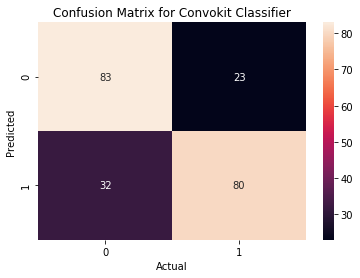

In [33]:
# Print confusion_matrix using heat map
ax = sns.heatmap(convokit_clf.confusion_matrix(test_corpus), annot = True)
ax.set_title("Confusion Matrix for Convokit Classifier")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted ")
plt.show()


In [34]:
utterance_ids = wiki_corpus_binary.get_utterance_ids()
rows = []
for uid in utterance_ids:
    rows.append(wiki_corpus_binary.get_utterance(uid).meta["politeness_strategies"])
politeness_strategies = pd.DataFrame(rows, index=utterance_ids)

In [35]:
politeness_strategies

feature_politeness_==Please==  feature_politeness_==Please_start==  \
629705                              0                                    0   
244336                              0                                    0   
214411                              1                                    0   
177439                              0                                    0   
341534                              0                                    0   
...                               ...                                  ...   
60798                               0                                    0   
156734                              0                                    0   
147665                              0                                    0   
234095                              0                                    0   
563032                              0                                    0   

        feature_politeness_==HASHEDGE==  \
629705                                0   
244336                                0   
214411                                0   
177439                                1   
341534                                0   
...                                 ...   
60798                                 1   
156734                                0   
147665                                0   
234095                                1   
563032                                1   

        feature_politeness_==Indirect_(btw)==  feature_politeness_==Hedges==  \
629705                                      0                              0   
244336                                      0                              0   
214411                                      0                              0   
177439                                      0                              0   
341534                                      0                              0   
...                                       ...                            ...   
60798                                       0                              1   
156734                                      0                              0   
147665                                      0                              0   
234095                                      0                              1   
563032                                      0                              1   

        feature_politeness_==Factuality==  feature_politeness_==Deference==  \
629705                                  0                                 0   
244336                                  0                                 0   
214411                                  0                                 0   
177439                                  1                                 0   
341534                                  0                                 0   
...                                   ...                               ...   
60798                                   0                                 0   
156734                                  0                                 0   
147665                                  0                                 0   
234095                                  0                                 0   
563032                                  0                                 0   

        feature_politeness_==Gratitude==  feature_politeness_==Apologizing==  \
629705                                 0                                   0   
244336                                 1                                   0   
214411                                 0                                   0   
177439                                 0                                   0   
341534                                 0                                   0   
...                                  ...                                 ...   
60798                                  0                                   0   
1567

In [36]:
convokit_clf.get_coefs(politeness_strategies.columns)

coef
feat_name                                           
feature_politeness_==Gratitude==            1.178122
feature_politeness_==Indirect_(greeting)==  0.638553
feature_politeness_==SUBJUNCTIVE==          0.541239
feature_politeness_==Indirect_(btw)==       0.467033
feature_politeness_==1st_person_start==     0.414873
feature_politeness_==Apologizing==          0.362853
feature_politeness_==HASPOSITIVE==          0.347574
feature_politeness_==Deference==            0.309130
feature_politeness_==INDICATIVE==           0.235271
feature_politeness_==1st_person==           0.209016
feature_politeness_==Please==               0.186717
feature_politeness_==HASHEDGE==             0.126751
feature_politeness_==Hedges==               0.125405
feature_politeness_==1st_person_pl.==       0.107767
feature_politeness_==2nd_person==           0.106503
feature_politeness_==Please_start==        -0.026375
feature_politeness_==2nd_person_start==    -0.123303
feature_politeness_==Direct_start==        -0.275117
feature_politeness_==Direct_question==     -0.279500
feature_politeness_==Factuality==          -0.297774
feature_politeness_==HASNEGATIVE==         -0.419083

## 3b. Sklearn ML Classifiers 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

### 3b.a Extract meta.politeness_strategies	as feature variable

In [38]:
df_wiki_binary = wiki_corpus_binary.get_utterances_dataframe()

In [39]:
df_wiki_binary['meta.politeness_strategies']

id
629705    {'feature_politeness_==Please==': 0, 'feature_...
244336    {'feature_politeness_==Please==': 0, 'feature_...
214411    {'feature_politeness_==Please==': 1, 'feature_...
177439    {'feature_politeness_==Please==': 0, 'feature_...
341534    {'feature_politeness_==Please==': 0, 'feature_...
                                ...                        
60798     {'feature_politeness_==Please==': 0, 'feature_...
156734    {'feature_politeness_==Please==': 0, 'feature_...
147665    {'feature_politeness_==Please==': 0, 'feature_...
234095    {'feature_politeness_==Please==': 0, 'feature_...
563032    {'feature_politeness_==Please==': 0, 'feature_...
Name: meta.politeness_strategies, Length: 2178, dtype: object

### 3bb. Convert extracted feature to a matrix representation/dataframe

To extract these dictionary features, used DictVectorizer provided in sklearn. The DictVectorizer transformer turns mappings into Numpy and perform one hot-encoding for each of the values. For more information refer to sklearn documentation 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html


In [40]:
from sklearn.feature_extraction import DictVectorizer

In [41]:
dict_vectorizer = DictVectorizer()

In [42]:
dict_vector = dict_vectorizer.fit_transform(df_wiki_binary['meta.politeness_strategies'])

In [43]:
print(dict_vectorizer.get_feature_names())

['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_pl.==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==', 'feature_politeness_==Apologizing==', 'feature_politeness_==Deference==', 'feature_politeness_==Direct_question==', 'feature_politeness_==Direct_start==', 'feature_politeness_==Factuality==', 'feature_politeness_==Gratitude==', 'feature_politeness_==HASHEDGE==', 'feature_politeness_==HASNEGATIVE==', 'feature_politeness_==HASPOSITIVE==', 'feature_politeness_==Hedges==', 'feature_politeness_==INDICATIVE==', 'feature_politeness_==Indirect_(btw)==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==Please==', 'feature_politeness_==Please_start==', 'feature_politeness_==SUBJUNCTIVE==']


In [226]:
# Corresponding matrix to dict vectorizer

dict_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [45]:
df  = pd.DataFrame(dict_vector.toarray(), 
                           index = [x.id for x in wiki_corpus_binary.iter_utterances()],
                           columns = dict_vectorizer.get_feature_names())


In [46]:
df.columns

Index(['feature_politeness_==1st_person==',
       'feature_politeness_==1st_person_pl.==',
       'feature_politeness_==1st_person_start==',
       'feature_politeness_==2nd_person==',
       'feature_politeness_==2nd_person_start==',
       'feature_politeness_==Apologizing==',
       'feature_politeness_==Deference==',
       'feature_politeness_==Direct_question==',
       'feature_politeness_==Direct_start==',
       'feature_politeness_==Factuality==', 'feature_politeness_==Gratitude==',
       'feature_politeness_==HASHEDGE==', 'feature_politeness_==HASNEGATIVE==',
       'feature_politeness_==HASPOSITIVE==', 'feature_politeness_==Hedges==',
       'feature_politeness_==INDICATIVE==',
       'feature_politeness_==Indirect_(btw)==',
       'feature_politeness_==Indirect_(greeting)==',
       'feature_politeness_==Please==', 'feature_politeness_==Please_start==',
       'feature_politeness_==SUBJUNCTIVE=='],
      dtype='object')

#### Remap Politeness Value ( 0: Impolite , 1: Polite)

In [47]:
binary_ = df_wiki_binary['meta.Binary'].astype("category")
change_dicti = { -1 : 0, 1: 1}
binary_.replace(change_dicti , inplace = True )

In [48]:
df_feature = pd.concat([df , binary_], axis = 1)

In [49]:
df_feature

feature_politeness_==1st_person==  \
629705                                0.0   
244336                                0.0   
214411                                1.0   
177439                                1.0   
341534                                0.0   
...                                   ...   
60798                                 0.0   
156734                                0.0   
147665                                0.0   
234095                                0.0   
563032                                0.0   

        feature_politeness_==1st_person_pl.==  \
629705                                    0.0   
244336                                    0.0   
214411                                    0.0   
177439                                    0.0   
341534                                    0.0   
...                                       ...   
60798                                     0.0   
156734                                    0.0   
147665                                    0.0   
234095                                    1.0   
563032                                    0.0   

        feature_politeness_==1st_person_start==  \
629705                                      0.0   
244336                                      0.0   
214411                                      0.0   
177439                                      1.0   
341534                                      1.0   
...                                         ...   
60798                                       0.0   
156734                                      0.0   
147665                                      0.0   
234095                                      0.0   
563032                                      1.0   

        feature_politeness_==2nd_person==  \
629705                                1.0   
244336                                1.0   
214411                                1.0   
177439                                0.0   
341534                                1.0   
...                                   ...   
60798                                 1.0   
156734                                1.0   
147665                                1.0   
234095                                1.0   
563032                                1.0   

        feature_politeness_==2nd_person_start==  \
629705                                      0.0   
244336                                      0.0   
214411                                      0.0   
177439                                      0.0   
341534                                      0.0   
...                                         ...   
60798                                       0.0   
156734                                      0.0   
147665                                      0.0   
234095                                      0.0   
563032                                      0.0   

        feature_politeness_==Apologizing==  feature_politeness_==Deference==  \
629705                                 0.0                               0.0   
244336                                 0.0                               0.0   
214411                                 0.0                               0.0   
177439                                 0.0                               0.0   
341534                                 0.0                               0.0   
...                                    ...                               ...   
60798                                  0.0                               0.0   
156734                                 0.0                               0.0   
147665                                 0.0                               0.0   
234095                                 0.0                               0.0   
563032                                 0.0                               0.0   

        feature_politeness_==Direct_question==  \
629705                                     1.0   
244336                                     0.0   


In [50]:
df_feature['meta.Binary'].value_counts()

0    1089
1    1089
Name: meta.Binary, dtype: int64

In [51]:
def convertToDictVector(dictionary_feature, convokit_corpus):
    from sklearn.feature_extraction import DictVectorizer
    
    dict_vectorizer = DictVectorizer()
    dict_vector = dict_vectorizer.fit_transform(dictionary_feature)
    df = pd.DataFrame(dict_vector.toarray(), index = [x.id for x in convokit_corpus.iter_utterances()],
                      columns = dict_vectorizer.get_feature_names())
    
    binary_feature = convokit_corpus.get_utterances_dataframe()['meta.Binary'].astype("category")
    
    df_feature = pd.concat([df, binary_feature ], axis = 1)
    return df_feature
    
    

### 3bc. K- Fold Cross Validation ( performed at step 3. bf)

K Cross Validation will be performed to check the performance of our model. For each of the models Kfold will be performed 

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [53]:
k_fold_cv = KFold(n_splits = 5, random_state = 23, shuffle = True)

### 3bd. Spitting the corpus data into Train and Test

To split the data , use train_test_split provided in sklearn.model_selection. Here however, to split the data train_test_split will not be used 

In [54]:
def split_data(df_corpus, train_split_percent, shape):
    
    limit          =  int((train_split_percent)*shape[0])
    X_train        =  df_corpus.iloc[0:limit, 0:(shape[1]-1)]
    X_test         =  df_corpus.iloc[limit:, 0:(shape[1]-1)]
    
    y_train        =  df_corpus.iloc[0:limit , (shape[1]-1): shape[1]]
    y_test         =  df_corpus.iloc[limit: , (shape[1]-1): shape[1]]
    
    return X_train, X_test, y_train, y_test

In [55]:
X_train, X_test, y_train, y_test = split_data(df_feature, 0.90, df_feature.shape)

In [56]:
display(X_train[0:3], X_test[0:3], y_train[0:3], y_test[0:3])

feature_politeness_==1st_person==  \
629705                                0.0   
244336                                0.0   
214411                                1.0   

        feature_politeness_==1st_person_pl.==  \
629705                                    0.0   
244336                                    0.0   
214411                                    0.0   

        feature_politeness_==1st_person_start==  \
629705                                      0.0   
244336                                      0.0   
214411                                      0.0   

        feature_politeness_==2nd_person==  \
629705                                1.0   
244336                                1.0   
214411                                1.0   

        feature_politeness_==2nd_person_start==  \
629705                                      0.0   
244336                                      0.0   
214411                                      0.0   

        feature_politeness_==Apologizing==  feature_politeness_==Deference==  \
629705                                 0.0                               0.0   
244336                                 0.0                               0.0   
214411                                 0.0                               0.0   

        feature_politeness_==Direct_question==  \
629705                                     1.0   
244336                                     0.0   
214411                                     0.0   

        feature_politeness_==Direct_start==  \
629705                                  0.0   
244336                                  0.0   
214411                                  0.0   

        feature_politeness_==Factuality==  ...  \
629705                                0.0  ...   
244336                                0.0  ...   
214411                                0.0  ...   

        feature_politeness_==HASHEDGE==  feature_politeness_==HASNEGATIVE==  \
629705                              0.0                                 0.0   
244336                              0.0                                 0.0   
214411                              0.0                                 0.0   

        feature_politeness_==HASPOSITIVE==  feature_politeness_==Hedges==  \
629705                                 0.0                            0.0   
244336                                 0.0                            0.0   
214411                                 0.0                            0.0   

        feature_politeness_==INDICATIVE==  \
629705                                0.0   
244336                                0.0   
214411                                0.0   

        feature_politeness_==Indirect_(btw)==  \
629705                                    0.0   
244336                                    0.0   
214411                                    0.0   

        feature_politeness_==Indirect_(greeting)==  \
629705                                         0.0   
244336                                         0.0   
214411                                         0.0   

        feature_politeness_==Please==  feature_politeness_==Please_start==  \
629705                            0.0                                  0.0   
244336                            0.0                                  0.0   
214411                            1.0                                  0.0   

        feature_politeness_==SUBJUNCTIVE==  
629705                                 0.0  
244336                                 1.0  
214411                                 1.0  

[3 rows x 21 columns]

feature_politeness_==1st_person==  \
620707                                1.0   
75904                                 1.0   
619003                                0.0   

        feature_politeness_==1st_person_pl.==  \
620707                                    0.0   
75904                                     0.0   
619003                                    0.0   

        feature_politeness_==1st_person_start==  \
620707                                      1.0   
75904                                       1.0   
619003                                      0.0   

        feature_politeness_==2nd_person==  \
620707                                1.0   
75904                                 1.0   
619003                                1.0   

        feature_politeness_==2nd_person_start==  \
620707                                      0.0   
75904                                       0.0   
619003                                      0.0   

        feature_politeness_==Apologizing==  feature_politeness_==Deference==  \
620707                                 0.0                               0.0   
75904                                  0.0                               0.0   
619003                                 0.0                               0.0   

        feature_politeness_==Direct_question==  \
620707                                     0.0   
75904                                      0.0   
619003                                     0.0   

        feature_politeness_==Direct_start==  \
620707                                  0.0   
75904                                   0.0   
619003                                  0.0   

        feature_politeness_==Factuality==  ...  \
620707                                0.0  ...   
75904                                 0.0  ...   
619003                                0.0  ...   

        feature_politeness_==HASHEDGE==  feature_politeness_==HASNEGATIVE==  \
620707                              1.0                                 1.0   
75904                               0.0                                 0.0   
619003                              0.0                                 1.0   

        feature_politeness_==HASPOSITIVE==  feature_politeness_==Hedges==  \
620707                                 1.0                            1.0   
75904                                  0.0                            0.0   
619003                                 0.0                            0.0   

        feature_politeness_==INDICATIVE==  \
620707                                0.0   
75904                                 0.0   
619003                                0.0   

        feature_politeness_==Indirect_(btw)==  \
620707                                    0.0   
75904                                     0.0   
619003                                    0.0   

        feature_politeness_==Indirect_(greeting)==  \
620707                                         0.0   
75904                                          0.0   
619003                                         0.0   

        feature_politeness_==Please==  feature_politeness_==Please_start==  \
620707                            0.0                                  0.0   
75904                             1.0                                  0.0   
619003                            0.0                                  0.0   

        feature_politeness_==SUBJUNCTIVE==  
620707                                 0.0  
75904                                  1.0  
619003                                 0.0  

[3 rows x 21 columns]

meta.Binary
629705            0
244336            1
214411            1

meta.Binary
620707            1
75904             1
619003            0

In [57]:
print("Shape of X_train" , X_train.shape)
print("Shape of X_test" , X_test.shape)
print("Shape of y_train" , y_train.shape)
print("Shape of y_test" , y_test.shape)

Shape of X_train (1960, 21)
Shape of X_test (218, 21)
Shape of y_train (1960, 1)
Shape of y_test (218, 1)


### 3be. Build ML Models

#### Logistic Regression 

In [58]:
lr = LogisticRegression().fit(X_train,y_train)

To prevent the above warning : use ravel() function to flatten the array. The above warning can be ignored as it will not affect the model 

In [59]:
lr_clf = LogisticRegression()

#### Naive Bayes Classifier

In [60]:
mb_clf = MultinomialNB()

#### Support Vector Machine

In [61]:
svm_clf_rbf  = SVC(kernel = 'rbf')
svm_clf_poly = SVC(kernel = 'poly')

#### KNeighborsClassifier

In [62]:
knn_clf = KNeighborsClassifier(n_neighbors = 3 , metric='minkowski')

#### DecisionTreeClassifier

In [63]:
dtree_clf = DecisionTreeClassifier(criterion ="entropy")

#### Multi-Layer Preceptron

In [64]:
mlp_clf_relu = MLPClassifier(hidden_layer_sizes=(30,30), max_iter = 1000, 
                             activation='relu', random_state = 21)
mlp_clf_tanh = MLPClassifier(hidden_layer_sizes = (30,30), max_iter = 1000,
                             activation = 'tanh', random_state = 22)

#### Perceptron

In [65]:
precp_clf = Perceptron()

#### Store Classifiers in a list so Looping operations can be performed to reduce reduntant code

In [66]:
list_class_polite = [lr_clf, mb_clf, svm_clf_rbf, svm_clf_poly, knn_clf, dtree_clf, mlp_clf_relu,
                       mlp_clf_tanh, precp_clf ]

 ### 3bf. Validation of ML MODELS Using K Fold Validation

In [67]:
X_features  = df_feature.drop(columns = ['meta.Binary'])
y_response = df_feature['meta.Binary']

In [68]:
model_names = ["Logistic Regression ", "Naive Bayes", "Support Vector Machine (Kernel= (RBF))",
               "Support Vector Machine (Kernel = Polynomial)","K-Nearest Neighbour","Decision Tree",
                "MLP(Multi-Layer Preceptron(Relu))", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))","Perceptron"
              ]

def crossValidationKFold(model, X_features, y_response, model_name):
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    
    k_fold_cv = KFold(n_splits = 5, shuffle = True, random_state = 15)
    
    acc_valscore_ =  cross_val_score(estimator = model, X = X_features, y = y_response,
                                 cv = k_fold_cv, n_jobs = -1, scoring = "accuracy")
    precision_valscore_ =  cross_val_score(estimator = model, X = X_features, y = y_response,
                                 cv = k_fold_cv, n_jobs = -1, scoring = "precision")
    #get name of the model
   
    print(f"\n******************************** {model_name} Accuracy/Precision Scores *****************************************\n")
    print("List of Accuracy Value scores " ,acc_valscore_)
    print("\nMean of Accuracy Score ", acc_valscore_.mean())
    print("\nMean of Precision Score ", precision_valscore_.mean())
    
    

    
    return model_name, acc_valscore_.mean(), acc_valscore_, precision_valscore_.mean()

In [69]:
def KFoldAccuracyScore(list_class_polite, X_features, y_response):
    
    import pandas as pd
    mylist = []
    
    count = 0
    for model in list_class_polite:
        modelname_, acc_valscore_mean, valscore_, precision_valscore_mean = crossValidationKFold(model, X_features, y_response, model_names[count])
        mylist.append([modelname_, acc_valscore_mean, precision_valscore_mean])
        count+= 1
    
    dataframe = pd.DataFrame(mylist, columns = ['Classifier Names', 'Accuracy Score', 'Precision Score'])
    
    return(dataframe)

In [70]:
accuracy_result = KFoldAccuracyScore(list_class_polite, X_features, y_response)
print("\n\n********************************** K Fold Accuracy and Precision Scores ************************************")
display(accuracy_result)


******************************** Logistic Regression  Accuracy/Precision Scores *****************************************

List of Accuracy Value scores  [0.75       0.76834862 0.76834862 0.76781609 0.76551724]

Mean of Accuracy Score  0.764006116207951

Mean of Precision Score  0.7829084110131185

******************************** Naive Bayes Accuracy/Precision Scores *****************************************

List of Accuracy Value scores  [0.77293578 0.70412844 0.73853211 0.76551724 0.74712644]

Mean of Accuracy Score  0.7456480016872298

Mean of Precision Score  0.74006242922701

******************************** Support Vector Machine (Kernel= (RBF)) Accuracy/Precision Scores *****************************************

List of Accuracy Value scores  [0.76376147 0.77752294 0.73394495 0.74712644 0.77701149]

Mean of Accuracy Score  0.7598734577665296

Mean of Precision Score  0.7917968342887894

******************************** Support Vector Machine (Kernel = Polynomial) Accuracy/Pre

Classifier Names  Accuracy Score  \
0                              Logistic Regression         0.764006   
1                                       Naive Bayes        0.745648   
2            Support Vector Machine (Kernel= (RBF))        0.759873   
3      Support Vector Machine (Kernel = Polynomial)        0.756205   
4                               K-Nearest Neighbour        0.697422   
5                                     Decision Tree        0.714873   
6                 MLP(Multi-Layer Preceptron(Relu))        0.735999   
7  MLP (Multi-Layer Preceptron(Hyberbolic Tangent))        0.725436   
8                                        Perceptron        0.708900   

   Precision Score  
0         0.782908  
1         0.740062  
2         0.791797  
3         0.807946  
4         0.728912  
5         0.743608  
6         0.751663  
7         0.735790  
8         0.669490

### 3bg. Fit Machine Learning Models

In [71]:
lr= lr.fit(X_train,y_train)

In [72]:
lr_clf        =  lr_clf.fit(X_train,y_train.values.ravel())
mb_clf        =  mb_clf.fit(X_train,y_train.values.ravel())
svm_clf_rbf   =  svm_clf_rbf.fit(X_train,y_train.values.ravel())
svm_clf_poly  =  svm_clf_poly.fit(X_train,y_train.values.ravel())
knn_clf       =  knn_clf.fit(X_train,y_train.values.ravel())
dtree_clf     =  dtree_clf.fit(X_train,y_train.values.ravel())
mlp_clf_relu  =  mlp_clf_relu.fit(X_train,y_train.values.ravel())
mlp_clf_tanh  =  mlp_clf_tanh.fit(X_train,y_train.values.ravel())
precp_clf     =  precp_clf.fit(X_train,y_train.values.ravel())

In [73]:
def generateModels(X_train,y_train):
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.linear_model import Perceptron
    
    
    
    lr_clf        =  LogisticRegression().fit(X_train,y_train.values.ravel())
    mb_clf        =  MultinomialNB().fit(X_train,y_train.values.ravel())
    svm_clf_rbf   =  SVC(kernel = 'rbf').fit(X_train,y_train.values.ravel())
    svm_clf_poly  =  SVC(kernel = 'poly').fit(X_train,y_train.values.ravel())
    knn_clf       =  KNeighborsClassifier(n_neighbors = 3, weights='uniform', 
                                          metric='minkowski').fit(X_train,y_train.values.ravel())
    dtree_clf     =  DecisionTreeClassifier(criterion ="entropy").fit(X_train,y_train.values.ravel())
    mlp_clf_relu  =  MLPClassifier(hidden_layer_sizes=(30,30), max_iter = 1000, 
                             activation='relu', random_state = 21).fit(X_train,y_train.values.ravel())
    mlp_clf_tanh  =  MLPClassifier(hidden_layer_sizes=(30,30), max_iter = 1000, 
                             activation='tanh', random_state = 22).fit(X_train,y_train.values.ravel())
    precp_clf     =  Perceptron().fit(X_train,y_train.values.ravel())
    
    
    return list([lr_clf, mb_clf, svm_clf_rbf, svm_clf_poly, knn_clf,dtree_clf, 
                mlp_clf_relu, mlp_clf_tanh, precp_clf])
    

### 3bf. Prediction using above ML Models

In [227]:
def performPrediction(classifier, X_test, y_test, color, type_classifier):
    
    from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn import metrics

    # Display Confusion Matris
    predicted_values = classifier.predict(X_test)
    print("\n\n----------------Confusion Matrix for {} Classifier--------------------".format(type_classifier))
    clf_matrix = confusion_matrix(y_test , predicted_values)
    fig = sns.heatmap(clf_matrix, annot = True, cmap = color, fmt = '.4g')
    fig.set_title(f"Seaborn Confusion Matrix for  {type_classifier} Classifier\n")
    fig.set_xlabel("Predicted Values")
    fig.set_ylabel("Actual Values")
  
    
    fig.xaxis.set_ticklabels(["False","True"])
    fig.yaxis.set_ticklabels(["False","True"])
    plt.show()
    
    # Display Classification Report 
    print(f"\n\n\tClassification Report for {type_classifier} Classifier\n")
    print(classification_report(y_test, predicted_values, digits = 3))
    
    
    #Display ROC-AUC Curve
    accuracy = accuracy_score(y_test,predicted_values ) 
    fpr, tpr, _ = metrics.roc_curve(y_test,  predicted_values)
    auc = metrics.roc_auc_score(y_test, predicted_values)
    
    print()
    #create ROC curve
    plt.plot(fpr,tpr,label=f"AUC for {type_classifier} ="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.title(f'AUC-ROC plot for {type_classifier} ')
    plt.show()
    
    return predicted_values
    
    

#### Display Metrics Models



----------------Confusion Matrix for Logistic Regression  Classifier--------------------


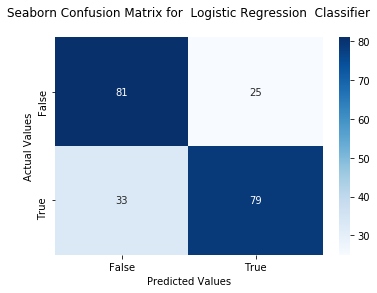



	Classification Report for Logistic Regression  Classifier

              precision    recall  f1-score   support

           0      0.711     0.764     0.736       106
           1      0.760     0.705     0.731       112

    accuracy                          0.734       218
   macro avg      0.735     0.735     0.734       218
weighted avg      0.736     0.734     0.734       218




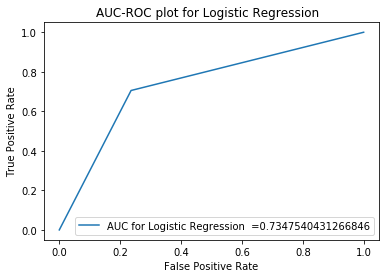

In [76]:
predicted_values_lr = performPrediction(lr_clf,X_test, y_test,"Blues","Logistic Regression ")
print('\n\n')




----------------Confusion Matrix for Naive Bayes Classifier--------------------


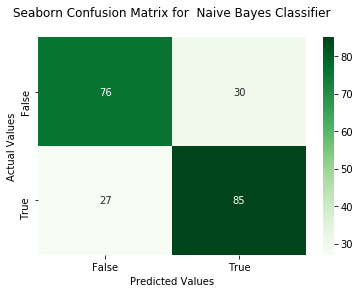



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.738     0.717     0.727       106
           1      0.739     0.759     0.749       112

    accuracy                          0.739       218
   macro avg      0.738     0.738     0.738       218
weighted avg      0.739     0.739     0.738       218




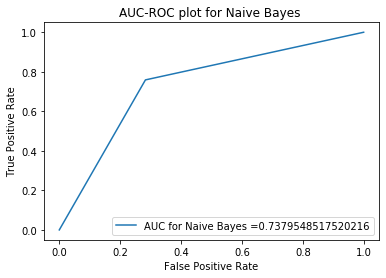

In [77]:
predicted_values_mb = performPrediction(mb_clf,X_test, y_test,"Greens", "Naive Bayes")



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


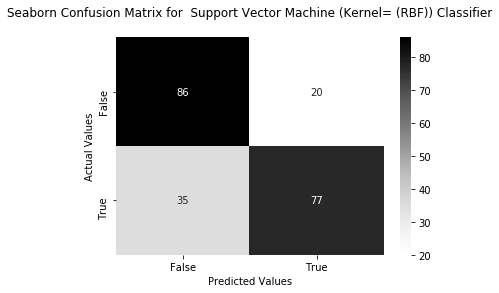



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.711     0.811     0.758       106
           1      0.794     0.688     0.737       112

    accuracy                          0.748       218
   macro avg      0.752     0.749     0.747       218
weighted avg      0.753     0.748     0.747       218




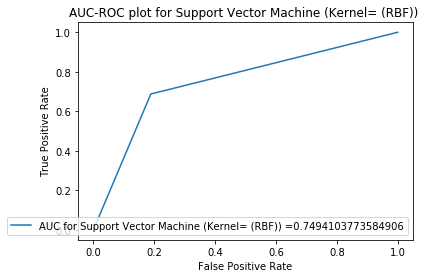

In [78]:
predicted_svm_clf_rbf = performPrediction(svm_clf_rbf,X_test, y_test, "Greys", "Support Vector Machine (Kernel= (RBF))")



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


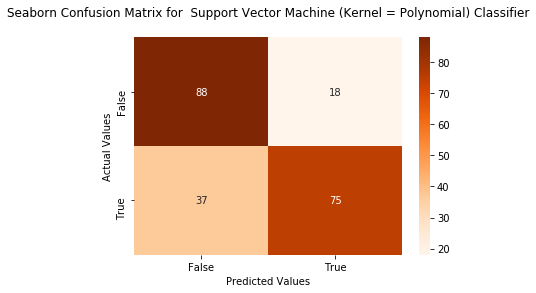



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.704     0.830     0.762       106
           1      0.806     0.670     0.732       112

    accuracy                          0.748       218
   macro avg      0.755     0.750     0.747       218
weighted avg      0.757     0.748     0.746       218




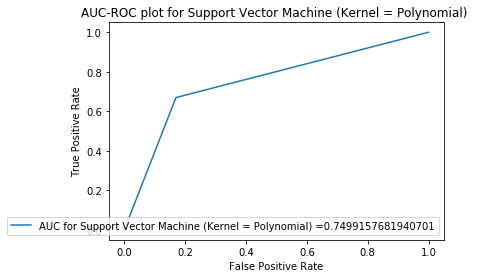

In [79]:
predicted_svm_clf_poly = performPrediction(svm_clf_poly,X_test, y_test, "Oranges", "Support Vector Machine (Kernel = Polynomial)")



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


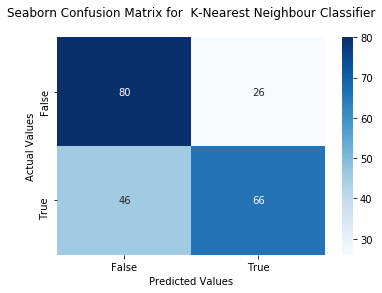



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      0.635     0.755     0.690       106
           1      0.717     0.589     0.647       112

    accuracy                          0.670       218
   macro avg      0.676     0.672     0.668       218
weighted avg      0.677     0.670     0.668       218




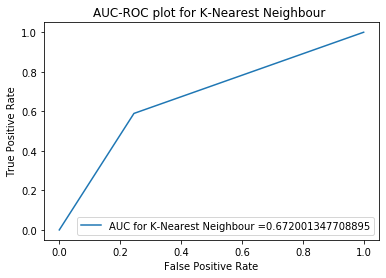

In [80]:
predicted_knn_clf =  performPrediction(knn_clf,X_test, y_test, "Blues" ,"K-Nearest Neighbour")



----------------Confusion Matrix for Perceptron Classifier--------------------


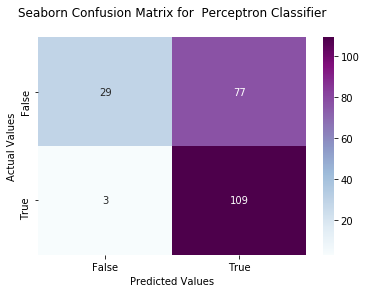



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.906     0.274     0.420       106
           1      0.586     0.973     0.732       112

    accuracy                          0.633       218
   macro avg      0.746     0.623     0.576       218
weighted avg      0.742     0.633     0.580       218




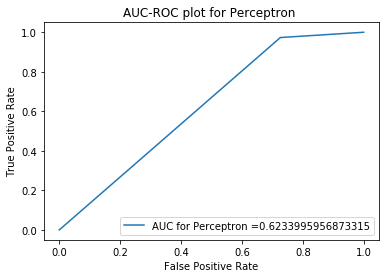

In [81]:
predicted_precp_clf = performPrediction(precp_clf, X_test, y_test,"BuPu","Perceptron")



----------------Confusion Matrix for Decision Tree Classifier--------------------


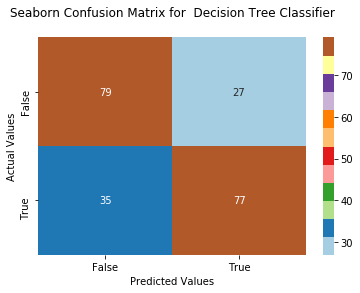



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.693     0.745     0.718       106
           1      0.740     0.688     0.713       112

    accuracy                          0.716       218
   macro avg      0.717     0.716     0.716       218
weighted avg      0.717     0.716     0.716       218




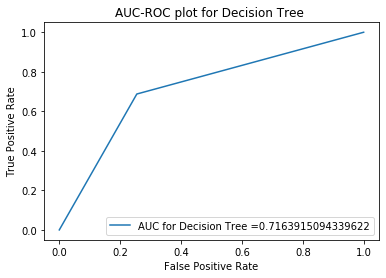

In [82]:
predicted_dtree_clf = performPrediction(dtree_clf,X_test, y_test, "Paired", "Decision Tree")



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


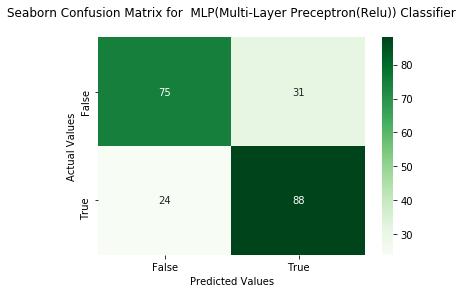



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.758     0.708     0.732       106
           1      0.739     0.786     0.762       112

    accuracy                          0.748       218
   macro avg      0.749     0.747     0.747       218
weighted avg      0.748     0.748     0.747       218




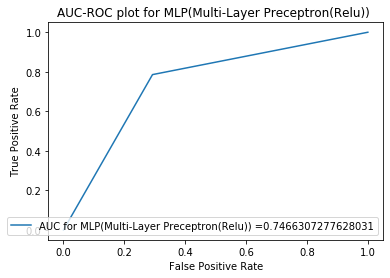

In [83]:
predicted_mlp_clf_relu = performPrediction(mlp_clf_relu, X_test, y_test,"Greens", "MLP(Multi-Layer Preceptron(Relu))")



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


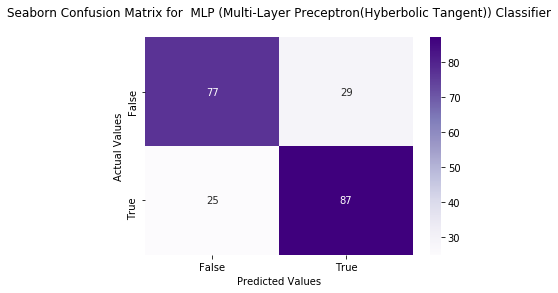



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.755     0.726     0.740       106
           1      0.750     0.777     0.763       112

    accuracy                          0.752       218
   macro avg      0.752     0.752     0.752       218
weighted avg      0.752     0.752     0.752       218




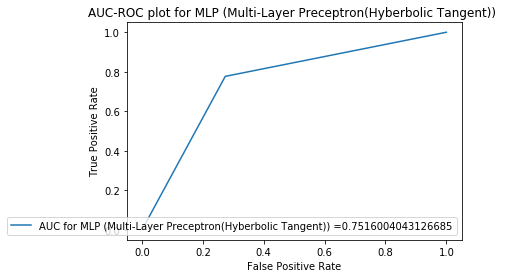

In [84]:
predicted_mlp_clf_tanh = performPrediction(mlp_clf_tanh, X_test, y_test,"Purples", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))")

# 4. Using Model to predict Utterances Stanford CORPUS Dataset 

## 4b. Sample Text Prediction

In [264]:
sample_text = "Hi, please let me know if you would proofread my article. It will be great if you could help"

spacy_nlp = spacy.load('en_core_web_sm')
utterance = ps.transform_utterance(sample_text)
data = utterance.meta['politeness_strategies']
dict_vect = DictVectorizer()
dict_vect = dict_vect.fit_transform(data)
dict_vect

<1x21 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [265]:
#predicts text as polite

print(lr_clf.predict(dict_vect.toarray()))

[1]


## 4b. Prediction on Subset of features in Stack Corpus 

### Load stack exchange Corpus

In [87]:
stack_corpus = Corpus(filename=download("stack-exchange-politeness-corpus"))

Dataset already exists at C:\Users\pulki\.convokit\downloads\stack-exchange-politeness-corpus


In [88]:
# Train classifier on only those records which have reponse -1 or 1
# iter_utterances() -> Iterates over the utterances in the corpus

list_filtered = []

for utterances in stack_corpus.iter_utterances():
    if(utterances.meta["Binary"]!= 0):
        list_filtered.append(utterances)


In [89]:
stack_corpus = Corpus(utterances = list_filtered)

In [230]:
stack_corpus.get_utterances_dataframe()[10:20]

timestamp                                               text speaker  \
id                                                                              
0     NOT_RECORDED  Can you explain more in detail, what should I ...    user   
1     NOT_RECORDED  Will expressions always be unambiguously paren...    user   
2     NOT_RECORDED  how are you resolving function pointers? I am ...    user   
3     NOT_RECORDED  What is the definition of `buffer`? Is it a lo...    user   
4     NOT_RECORDED              Is `A` a global variable?  What is x?    user   
...            ...                                                ...     ...   
6598  NOT_RECORDED  hello. I do not know if others, but to me your...    user   
6599  NOT_RECORDED      That sounds amazing!! Can I have the link? :D    user   
6600  NOT_RECORDED  Is it easy to use the small pump? Have you not...    user   
6601  NOT_RECORDED  Cool idea. I'm curious, though, how can one dr...    user   
6602  NOT_RECORDED  I've never even questioned this before, but no...    user   

     reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                
0        None               0              0.217326           0   
1        None               1              0.063302           0   
2        None               2              0.128902           0   
3        None               3              0.240188           0   
4        None               4              0.508284           1   
...       ...             ...                   ...         ...   
6598     None            6598              0.088219           0   
6599     None            6599              0.449894           1   
6600     None            6600             -0.268236           0   
6601     None            6601              0.526613           1   
6602     None            6602             -0.159096           0   

                                       meta.Annotations  \
id                                                        
0     {'A33SMNMTMIOJ6T': 12, 'A2OXXHGAM7B0Y': 16, 'A...   
1     {'A1UIH2IMG9DV95': 13, 'A23FB7HE970AZJ': 13, '...   
2     {'A1BS64O3JY0YJ4': 13, 'A2AE4MZVUX9JPX': 15, '...   
3     {'A3VJDU2VRMN05L': 13, 'A1ZHP80O13CEUI': 13, '...   
4     {'A3OW54MEVDKXJL': 17, 'A2RDZ580VXUO1X': 18, '...   
...                                                 ...   
6598  {'A1E0EK09CA5OIO': 17, 'A233ONYNWKDIYF': 13, '...   
6599  {'A1E0EK09CA5OIO': 17, 'A233ONYNWKDIYF': 17, '...   
6600  {'A233ONYNWKDIYF': 13, 'A3S5L3I8O3Q2G': 13, 'A...   
6601  {'A1E0EK09CA5OIO': 19, 'A233ONYNWKDIYF': 13, '...   
6602  {'A1E0EK09CA5OIO': 17, 'A233ONYNWKDIYF': 9, 'A...   

                                            meta.parsed  \
id                                                        
0     [{'rt': 2, 'toks': [{'tok': 'Can', 'tag': 'MD'...   
1     [{'rt': 13, 'toks': [{'tok': 'Will', 'tag': 'M...   
2     [{'rt': 3, 'toks': [{'tok': 'how', 'tag': 'WRB...   
3     [{'rt': 1, 'toks': [{'tok': 'What', 'tag': 'WP...   
4     [{'rt': 0, 'toks': [{'tok': 'is', 'tag': 'VBZ'...   
...                                                 ...   
6598  [{'rt': 0, 'toks': [{'tok': 'hello', 'tag': 'U...   
6599  [{'rt': 1, 'toks': [{'tok': 'that', 'tag': 'DT...   
6600  [{'rt': 0, 'toks': [{'tok': 'Is', 'tag': 'VBZ'...   
6601  [{'rt': 1, 'toks': [{'tok': 'cool', 'tag': 'UH...   
6602  [{'rt': 4, 'toks': [{'tok': 'I', 'tag': 'PRP',...   

                             meta.politeness_strategies  \
id                                                        
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4     {'feature_politeness_==Please==': 0, 'feature_...   
...                                                 ...   
6598                                                NaN   
6599  {'feature_

#### Parse the text using Text Parser Transformer and then use Politeness Strategies

In [228]:
stack_text_parser = TextParser(verbosity = 1000)

# Transformer will annotate  data with 21 politeness markers
stack_polite_parser = PolitenessStrategies()

In [92]:
stack_corpus = stack_text_parser.transform(stack_corpus)

1000/3302 utterances processed
2000/3302 utterances processed
3000/3302 utterances processed
3302/3302 utterances processed


In [93]:
stack_corpus = stack_polite_parser.transform(stack_corpus, markers = True)

In [231]:
# display utterance in a dataframe

df_stack_corpus = stack_corpus.get_utterances_dataframe()
df_stack_corpus[0:4]

timestamp                                               text speaker  \
id                                                                              
0     NOT_RECORDED  Can you explain more in detail, what should I ...    user   
1     NOT_RECORDED  Will expressions always be unambiguously paren...    user   
2     NOT_RECORDED  how are you resolving function pointers? I am ...    user   
3     NOT_RECORDED  What is the definition of `buffer`? Is it a lo...    user   
4     NOT_RECORDED              Is `A` a global variable?  What is x?    user   
...            ...                                                ...     ...   
6598  NOT_RECORDED  hello. I do not know if others, but to me your...    user   
6599  NOT_RECORDED      That sounds amazing!! Can I have the link? :D    user   
6600  NOT_RECORDED  Is it easy to use the small pump? Have you not...    user   
6601  NOT_RECORDED  Cool idea. I'm curious, though, how can one dr...    user   
6602  NOT_RECORDED  I've never even questioned this before, but no...    user   

     reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                
0        None               0              0.217326           0   
1        None               1              0.063302           0   
2        None               2              0.128902           0   
3        None               3              0.240188           0   
4        None               4              0.508284           1   
...       ...             ...                   ...         ...   
6598     None            6598              0.088219           0   
6599     None            6599              0.449894           1   
6600     None            6600             -0.268236           0   
6601     None            6601              0.526613           1   
6602     None            6602             -0.159096           0   

                                       meta.Annotations  \
id                                                        
0     {'A33SMNMTMIOJ6T': 12, 'A2OXXHGAM7B0Y': 16, 'A...   
1     {'A1UIH2IMG9DV95': 13, 'A23FB7HE970AZJ': 13, '...   
2     {'A1BS64O3JY0YJ4': 13, 'A2AE4MZVUX9JPX': 15, '...   
3     {'A3VJDU2VRMN05L': 13, 'A1ZHP80O13CEUI': 13, '...   
4     {'A3OW54MEVDKXJL': 17, 'A2RDZ580VXUO1X': 18, '...   
...                                                 ...   
6598  {'A1E0EK09CA5OIO': 17, 'A233ONYNWKDIYF': 13, '...   
6599  {'A1E0EK09CA5OIO': 17, 'A233ONYNWKDIYF': 17, '...   
6600  {'A233ONYNWKDIYF': 13, 'A3S5L3I8O3Q2G': 13, 'A...   
6601  {'A1E0EK09CA5OIO': 19, 'A233ONYNWKDIYF': 13, '...   
6602  {'A1E0EK09CA5OIO': 17, 'A233ONYNWKDIYF': 9, 'A...   

                                            meta.parsed  \
id                                                        
0     [{'rt': 2, 'toks': [{'tok': 'Can', 'tag': 'MD'...   
1     [{'rt': 13, 'toks': [{'tok': 'Will', 'tag': 'M...   
2     [{'rt': 3, 'toks': [{'tok': 'how', 'tag': 'WRB...   
3     [{'rt': 1, 'toks': [{'tok': 'What', 'tag': 'WP...   
4     [{'rt': 0, 'toks': [{'tok': 'is', 'tag': 'VBZ'...   
...                                                 ...   
6598  [{'rt': 0, 'toks': [{'tok': 'hello', 'tag': 'U...   
6599  [{'rt': 1, 'toks': [{'tok': 'that', 'tag': 'DT...   
6600  [{'rt': 0, 'toks': [{'tok': 'Is', 'tag': 'VBZ'...   
6601  [{'rt': 1, 'toks': [{'tok': 'cool', 'tag': 'UH...   
6602  [{'rt': 4, 'toks': [{'tok': 'I', 'tag': 'PRP',...   

                             meta.politeness_strategies  \
id                                                        
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4     {'feature_politeness_==Please==': 0, 'feature_...   
...                                                 ...   
6598                                                NaN   
6599  {'feature_

In [95]:
# Using convertToDictVector() defined above, again to extract dictionary features 

df_standford_features = convertToDictVector(df_stack_corpus['meta.politeness_strategies'], stack_corpus)
df_standford_features['meta.Binary'].replace(change_dicti, inplace = True)
df_standford_features

feature_politeness_==1st_person==  \
4                                   0.0   
5                                   0.0   
6                                   0.0   
9                                   0.0   
11                                  0.0   
...                                 ...   
6595                                0.0   
6596                                0.0   
6597                                0.0   
6599                                1.0   
6601                                0.0   

      feature_politeness_==1st_person_pl.==  \
4                                       0.0   
5                                       0.0   
6                                       0.0   
9                                       0.0   
11                                      0.0   
...                                     ...   
6595                                    0.0   
6596                                    0.0   
6597                                    0.0   
6599                                    0.0   
6601                                    0.0   

      feature_politeness_==1st_person_start==  \
4                                         0.0   
5                                         0.0   
6                                         0.0   
9                                         0.0   
11                                        0.0   
...                                       ...   
6595                                      0.0   
6596                                      0.0   
6597                                      0.0   
6599                                      0.0   
6601                                      1.0   

      feature_politeness_==2nd_person==  \
4                                   0.0   
5                                   1.0   
6                                   0.0   
9                                   1.0   
11                                  1.0   
...                                 ...   
6595                                1.0   
6596                                0.0   
6597                                1.0   
6599                                0.0   
6601                                0.0   

      feature_politeness_==2nd_person_start==  \
4                                         0.0   
5                                         0.0   
6                                         0.0   
9                                         0.0   
11                                        0.0   
...                                       ...   
6595                                      1.0   
6596                                      0.0   
6597                                      0.0   
6599                                      0.0   
6601                                      0.0   

      feature_politeness_==Apologizing==  feature_politeness_==Deference==  \
4                                    0.0                               0.0   
5                                    0.0                               0.0   
6                                    0.0                               0.0   
9                                    0.0                               0.0   
11                                   0.0                               0.0   
...                                  ...                               ...   
6595                                 0.0                               0.0   
6596                                 0.0                               0.0   
6597                                 0.0                               1.0   
6599                                 0.0                               0.0   
6601                                 0.0                               1.0   

      feature_politeness_==Direct_question==  \
4                                        1.0   
5                                        1.0   
6                                        1.0   
9                                        1.0   
11                                       0.0   
... 

In [96]:
stack_corpus.get_utterances_dataframe().shape

(3302, 12)

### 4bb. Build Models on Stanford Politeness Corpus

In [97]:
X_train, X_test, y_train, y_test = split_data(df_standford_features, 0.90, df_standford_features.shape)

In [98]:
# generate models and store the objects in a list

model_list_standford = generateModels(X_train,y_train)

In [99]:
model_list_standford 

[LogisticRegression(),
 MultinomialNB(),
 SVC(),
 SVC(kernel='poly'),
 KNeighborsClassifier(n_neighbors=3),
 DecisionTreeClassifier(criterion='entropy'),
 MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=1000, random_state=21),
 MLPClassifier(activation='tanh', hidden_layer_sizes=(30, 30), max_iter=1000,
               random_state=22),
 Perceptron()]



----------------Confusion Matrix for Logistic Regression  Classifier--------------------


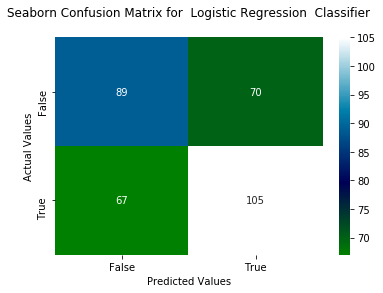



	Classification Report for Logistic Regression  Classifier

              precision    recall  f1-score   support

           0      0.571     0.560     0.565       159
           1      0.600     0.610     0.605       172

    accuracy                          0.586       331
   macro avg      0.585     0.585     0.585       331
weighted avg      0.586     0.586     0.586       331




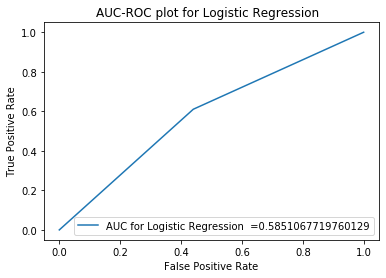



----------------Confusion Matrix for Naive Bayes Classifier--------------------


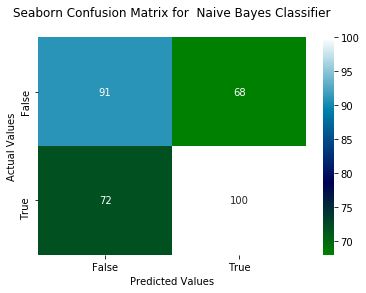



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.558     0.572     0.565       159
           1      0.595     0.581     0.588       172

    accuracy                          0.577       331
   macro avg      0.577     0.577     0.577       331
weighted avg      0.577     0.577     0.577       331




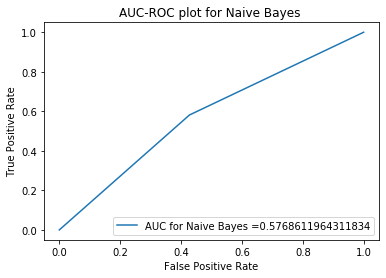



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


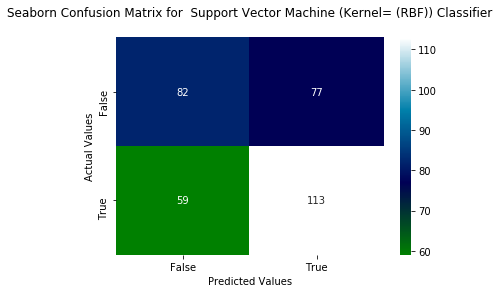



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.582     0.516     0.547       159
           1      0.595     0.657     0.624       172

    accuracy                          0.589       331
   macro avg      0.588     0.586     0.585       331
weighted avg      0.588     0.589     0.587       331




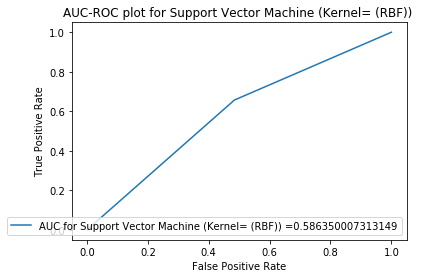



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


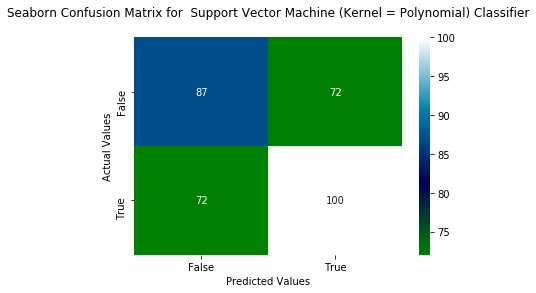



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.547     0.547     0.547       159
           1      0.581     0.581     0.581       172

    accuracy                          0.565       331
   macro avg      0.564     0.564     0.564       331
weighted avg      0.565     0.565     0.565       331




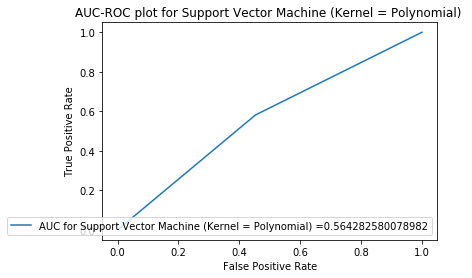



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


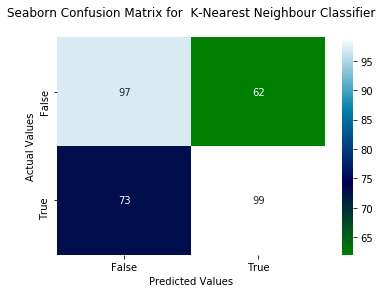



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      0.571     0.610     0.590       159
           1      0.615     0.576     0.595       172

    accuracy                          0.592       331
   macro avg      0.593     0.593     0.592       331
weighted avg      0.594     0.592     0.592       331




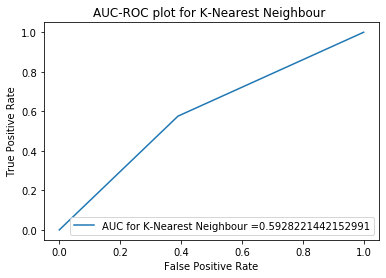



----------------Confusion Matrix for Decision Tree Classifier--------------------


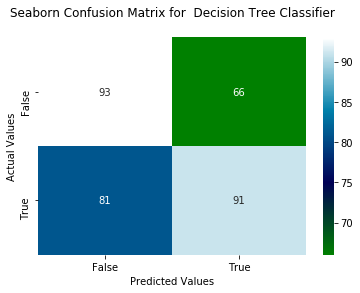



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.534     0.585     0.559       159
           1      0.580     0.529     0.553       172

    accuracy                          0.556       331
   macro avg      0.557     0.557     0.556       331
weighted avg      0.558     0.556     0.556       331




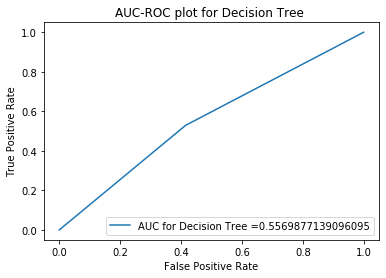



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


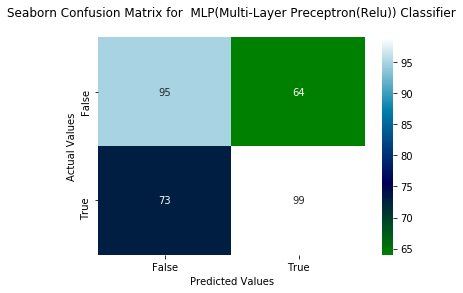



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.565     0.597     0.581       159
           1      0.607     0.576     0.591       172

    accuracy                          0.586       331
   macro avg      0.586     0.587     0.586       331
weighted avg      0.587     0.586     0.586       331




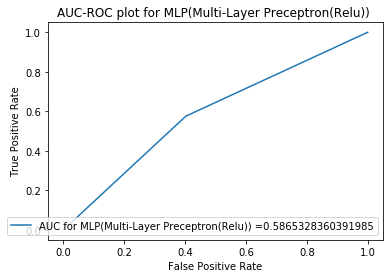



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


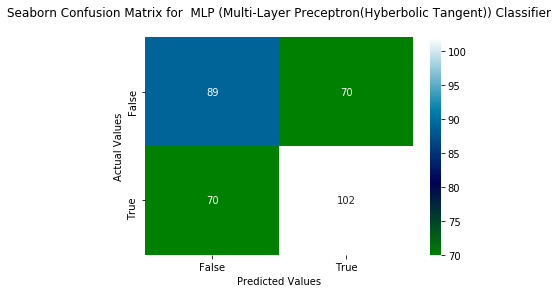



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.560     0.560     0.560       159
           1      0.593     0.593     0.593       172

    accuracy                          0.577       331
   macro avg      0.576     0.576     0.576       331
weighted avg      0.577     0.577     0.577       331




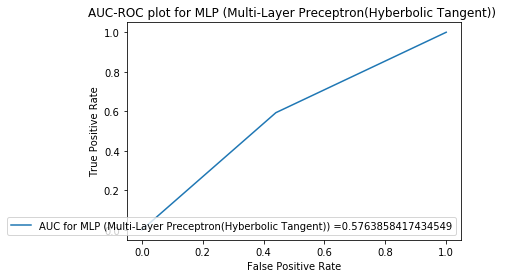



----------------Confusion Matrix for Perceptron Classifier--------------------


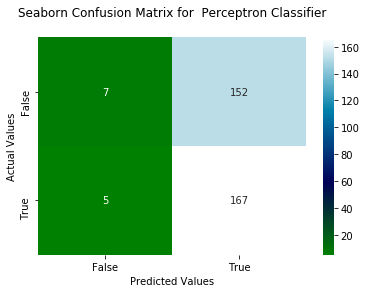



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.583     0.044     0.082       159
           1      0.524     0.971     0.680       172

    accuracy                          0.526       331
   macro avg      0.553     0.507     0.381       331
weighted avg      0.552     0.526     0.393       331




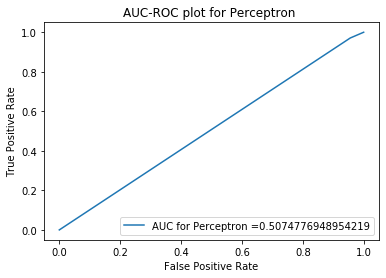

In [100]:
# Following code will iterate over the list and generate classification report, confusion matrix, ROC curve
# for all models.

model_names = ["Logistic Regression ", "Naive Bayes", "Support Vector Machine (Kernel= (RBF))",
               "Support Vector Machine (Kernel = Polynomial)","K-Nearest Neighbour",
               "Decision Tree", "MLP(Multi-Layer Preceptron(Relu))", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))",
               "Perceptron"
              ]

count = 0
for model in model_list_standford:
    performPrediction(model, X_test, y_test, "ocean", model_names[count])
    count += 1
    

In [101]:
stack_corpus.get_utterances_dataframe().shape

(3302, 12)

In [102]:
X_train.shape

(2971, 21)

In [103]:
X_test.shape

(331, 21)

### 4bc. Instead of using training set of 90% use training set of 95% and compare model performance



----------------Confusion Matrix for Logistic Regression  Classifier--------------------


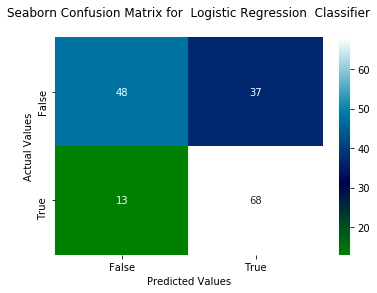



	Classification Report for Logistic Regression  Classifier

              precision    recall  f1-score   support

           0      0.787     0.565     0.658        85
           1      0.648     0.840     0.731        81

    accuracy                          0.699       166
   macro avg      0.717     0.702     0.694       166
weighted avg      0.719     0.699     0.693       166




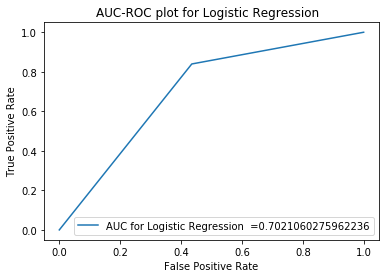



----------------Confusion Matrix for Naive Bayes Classifier--------------------


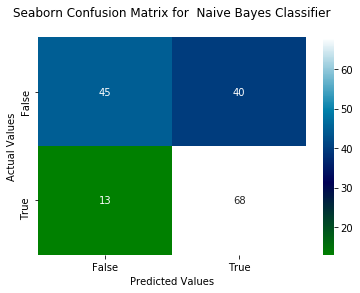



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.776     0.529     0.629        85
           1      0.630     0.840     0.720        81

    accuracy                          0.681       166
   macro avg      0.703     0.684     0.674       166
weighted avg      0.705     0.681     0.673       166




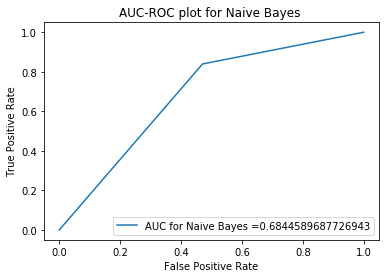



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


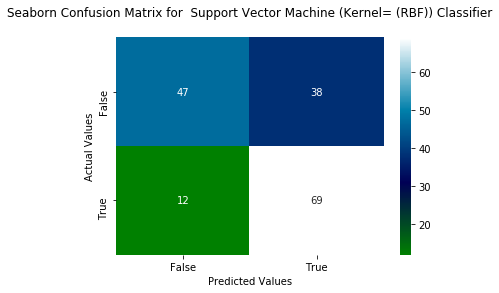



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.797     0.553     0.653        85
           1      0.645     0.852     0.734        81

    accuracy                          0.699       166
   macro avg      0.721     0.702     0.693       166
weighted avg      0.723     0.699     0.692       166




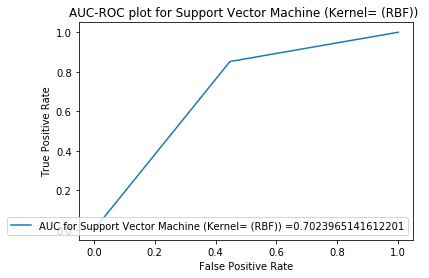



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


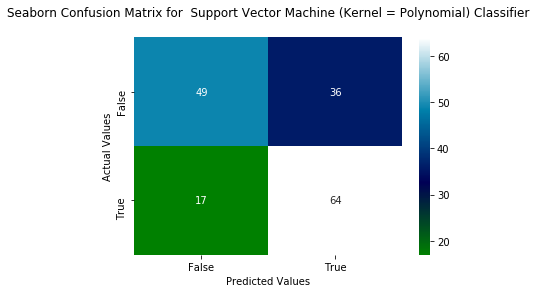



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.742     0.576     0.649        85
           1      0.640     0.790     0.707        81

    accuracy                          0.681       166
   macro avg      0.691     0.683     0.678       166
weighted avg      0.692     0.681     0.677       166




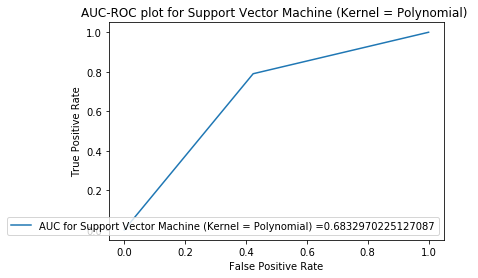



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


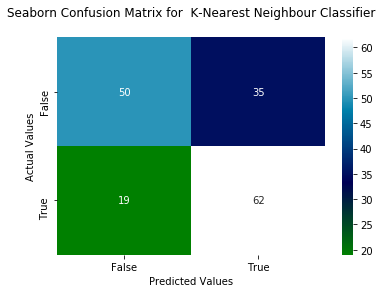



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      0.725     0.588     0.649        85
           1      0.639     0.765     0.697        81

    accuracy                          0.675       166
   macro avg      0.682     0.677     0.673       166
weighted avg      0.683     0.675     0.672       166




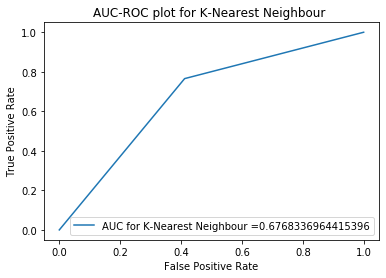



----------------Confusion Matrix for Decision Tree Classifier--------------------


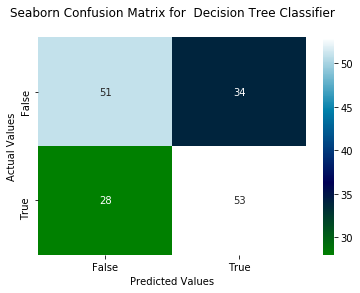



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.646     0.600     0.622        85
           1      0.609     0.654     0.631        81

    accuracy                          0.627       166
   macro avg      0.627     0.627     0.626       166
weighted avg      0.628     0.627     0.626       166




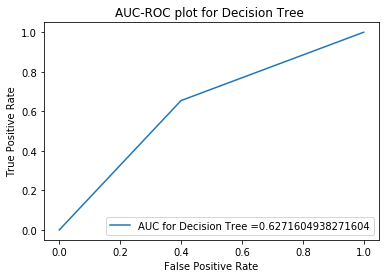



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


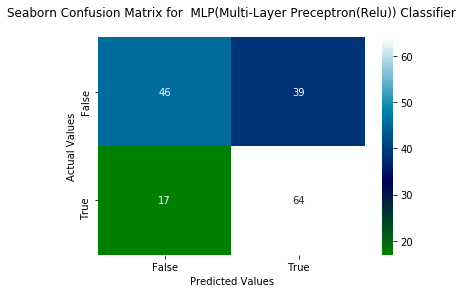



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.730     0.541     0.622        85
           1      0.621     0.790     0.696        81

    accuracy                          0.663       166
   macro avg      0.676     0.666     0.659       166
weighted avg      0.677     0.663     0.658       166




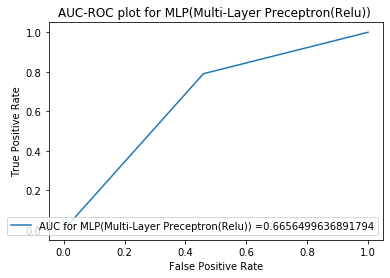



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


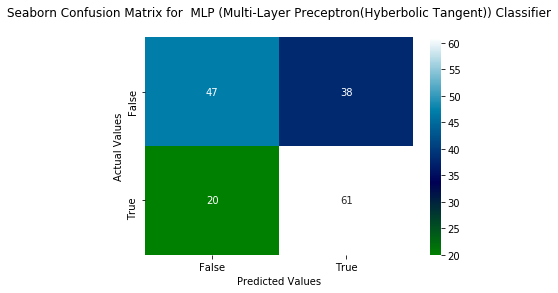



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.701     0.553     0.618        85
           1      0.616     0.753     0.678        81

    accuracy                          0.651       166
   macro avg      0.659     0.653     0.648       166
weighted avg      0.660     0.651     0.647       166




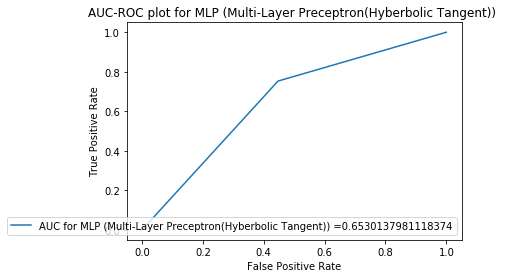



----------------Confusion Matrix for Perceptron Classifier--------------------


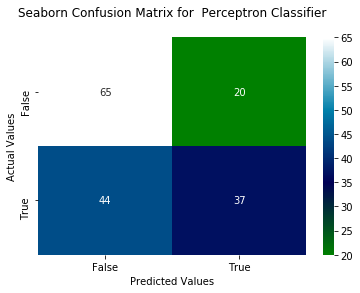



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.596     0.765     0.670        85
           1      0.649     0.457     0.536        81

    accuracy                          0.614       166
   macro avg      0.623     0.611     0.603       166
weighted avg      0.622     0.614     0.605       166




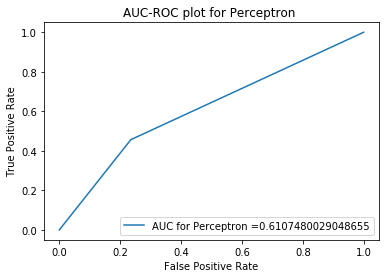

In [104]:
X_train_2, X_test_2, y_train_2, y_test_2 = split_data(df_standford_features, 0.95, df_standford_features.shape)
model_list_standford_2 = generateModels(X_train_2 , y_train_2)

model_names = ["Logistic Regression ", "Naive Bayes", "Support Vector Machine (Kernel= (RBF))",
               "Support Vector Machine (Kernel = Polynomial)","K-Nearest Neighbour",
               "Decision Tree", "MLP(Multi-Layer Preceptron(Relu))", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))",
               "Perceptron"
              ]


count = 0
for model in model_list_standford_2:
    performPrediction(model, X_test_2, y_test_2, "ocean", model_names[count])
    count += 1
    

### 4bc. Using Cross Domain models i.e Linguistic Marker  Model built on Wikipedia Politness Corpus to Predict the outcome variable for Standford Corpus

In [105]:
# build model on all the dataset now instead of splitting it 
# df_feature variable is dataset for wikipedia politeness corpus
df_feature.shape

(2178, 22)

In [106]:
X_features  = df_feature.drop(columns = ['meta.Binary'])
y_response = df_feature['meta.Binary']

list_class_polite_2 = generateModels(X_features , y_response)



----------------Confusion Matrix for Logistic Regression  Classifier--------------------


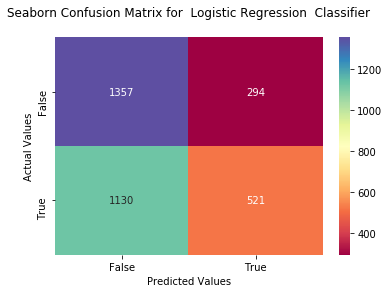



	Classification Report for Logistic Regression  Classifier

              precision    recall  f1-score   support

           0      0.546     0.822     0.656      1651
           1      0.639     0.316     0.423      1651

    accuracy                          0.569      3302
   macro avg      0.592     0.569     0.539      3302
weighted avg      0.592     0.569     0.539      3302




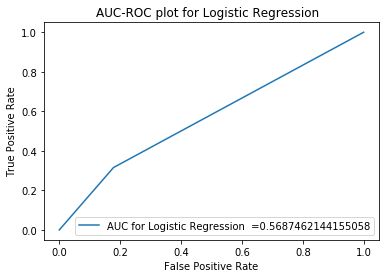



----------------Confusion Matrix for Naive Bayes Classifier--------------------


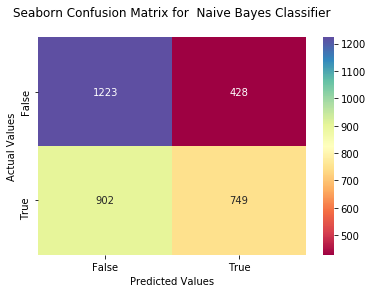



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.576     0.741     0.648      1651
           1      0.636     0.454     0.530      1651

    accuracy                          0.597      3302
   macro avg      0.606     0.597     0.589      3302
weighted avg      0.606     0.597     0.589      3302




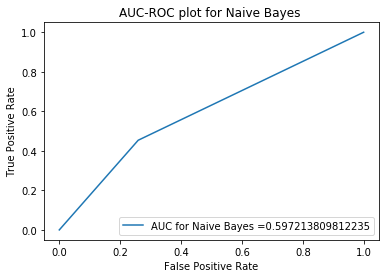



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


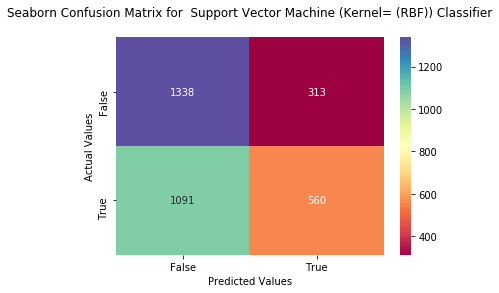



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.551     0.810     0.656      1651
           1      0.641     0.339     0.444      1651

    accuracy                          0.575      3302
   macro avg      0.596     0.575     0.550      3302
weighted avg      0.596     0.575     0.550      3302




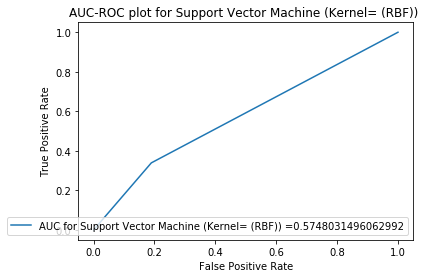



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


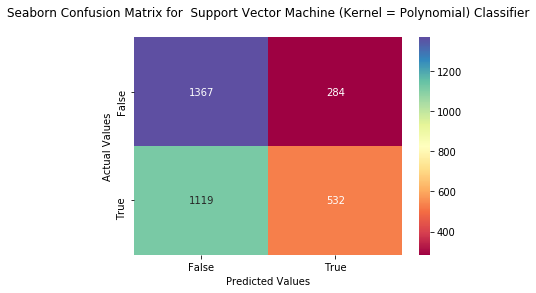



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.550     0.828     0.661      1651
           1      0.652     0.322     0.431      1651

    accuracy                          0.575      3302
   macro avg      0.601     0.575     0.546      3302
weighted avg      0.601     0.575     0.546      3302




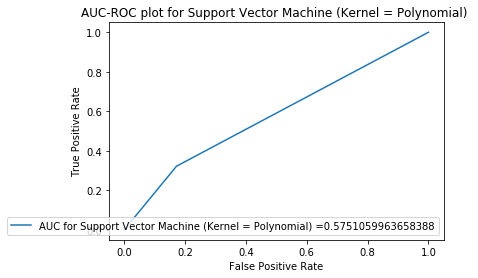



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


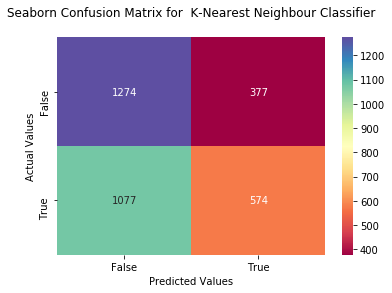



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      0.542     0.772     0.637      1651
           1      0.604     0.348     0.441      1651

    accuracy                          0.560      3302
   macro avg      0.573     0.560     0.539      3302
weighted avg      0.573     0.560     0.539      3302




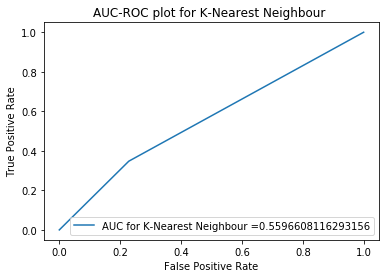



----------------Confusion Matrix for Decision Tree Classifier--------------------


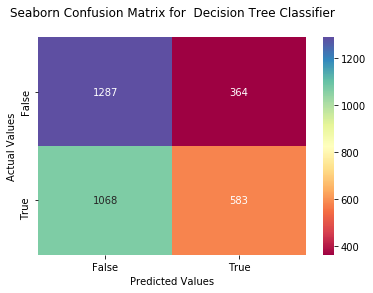



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.546     0.780     0.643      1651
           1      0.616     0.353     0.449      1651

    accuracy                          0.566      3302
   macro avg      0.581     0.566     0.546      3302
weighted avg      0.581     0.566     0.546      3302




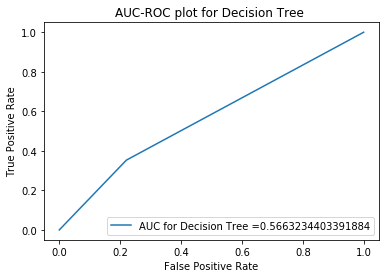



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


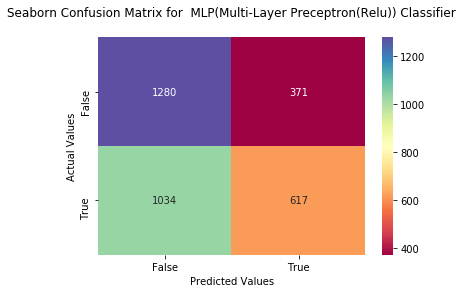



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.553     0.775     0.646      1651
           1      0.624     0.374     0.468      1651

    accuracy                          0.575      3302
   macro avg      0.589     0.575     0.557      3302
weighted avg      0.589     0.575     0.557      3302




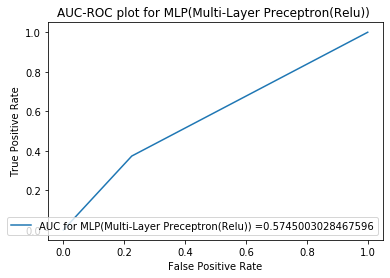



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


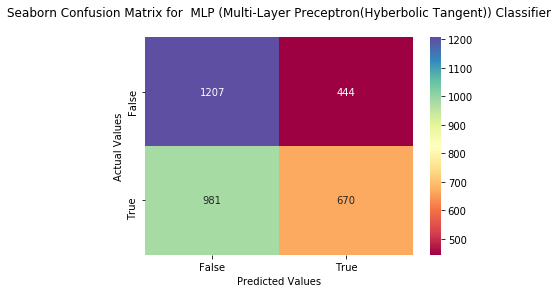



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.552     0.731     0.629      1651
           1      0.601     0.406     0.485      1651

    accuracy                          0.568      3302
   macro avg      0.577     0.568     0.557      3302
weighted avg      0.577     0.568     0.557      3302




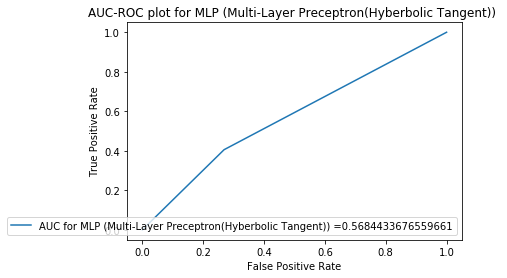



----------------Confusion Matrix for Perceptron Classifier--------------------


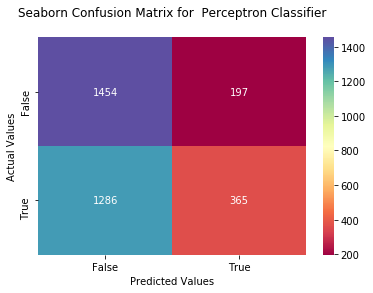



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.531     0.881     0.662      1651
           1      0.649     0.221     0.330      1651

    accuracy                          0.551      3302
   macro avg      0.590     0.551     0.496      3302
weighted avg      0.590     0.551     0.496      3302




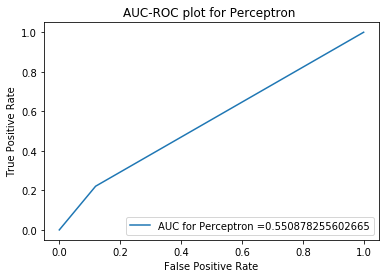

In [107]:
model_names = ["Logistic Regression ", "Naive Bayes", "Support Vector Machine (Kernel= (RBF))",
               "Support Vector Machine (Kernel = Polynomial)","K-Nearest Neighbour",
               "Decision Tree", "MLP(Multi-Layer Preceptron(Relu))", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))",
               "Perceptron"
              ]

X_ = df_standford_features.drop(['meta.Binary'], axis = 1)
y_ = df_standford_features['meta.Binary']


count = 0
for model in list_class_polite_2:
    performPrediction(model, X_, y_, "Spectral", model_names[count])
    count += 1
    

!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Caution :  Recall and Precision is extremely poor for above models (compared to baseline Linguistic Marker model)!!!!!!!!!!!!!!!!!!!!!!!!!!!

# 5. Building ML Models using BoW 

## 5a. Load Wikipedia Politeness Corpus and perform Text Parsing on the dataset 

#### Wikipedia Politeness Corpus

In [108]:
wiki_corpus = Corpus(download('wikipedia-politeness-corpus'))

# fiter utterances where binary variables were non zero 
wiki_corpus_binary = Corpus(utterances = [utt for utt in wiki_corpus.iter_utterances() if utt.meta['Binary']!= 0 ])

# use Text Parser (parser has been pre loaded at the beginning )
wiki_corpus_binary = parser.transform(wiki_corpus_binary)

# use Politeness Transformer to annotate our data 
wiki_corpus_binary = ps.transform(wiki_corpus_binary, markers = True)

df_wiki_binary = wiki_corpus_binary.get_utterances_dataframe()
display(df_wiki_binary.head())


Dataset already exists at C:\Users\pulki\capstone project\march 11th 2021 politeness\wikipedia-politeness-corpus
2000/2178 utterances processed
2178/2178 utterances processed


timestamp                                               text  \
id                                                                        
629705  NOT_RECORDED  Where did you learn English? How come you're t...   
244336  NOT_RECORDED  Thanks very much for your edit to the <url> ar...   
214411  NOT_RECORDED  |style="vertical-align: middle; padding: 3px;"...   
177439  NOT_RECORDED  These are my numbers: 7 years in Wikipedia, 6 ...   
341534  NOT_RECORDED  I couldn't tell you why glam rock was there. B...   

       speaker reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                          
629705    user     None          629705             -1.120049          -1   
244336    user     None          244336              1.313955           1   
214411    user     None          214411              0.619247           1   
177439    user     None          177439             -0.473539          -1   
341534    user     None          341534             -0.962907          -1   

                                         meta.Annotations  \
id                                                          
629705  {'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...   
244336  {'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...   
214411  {'AYG3MF094634L': 14, 'A1F4D2PZ7NNWTL': 16, 'A...   
177439  {'A2UFD1I8ZO1V4G': 13, 'A26YKYQIA3GX8B': 5, 'A...   
341534  {'A233ONYNWKDIYF': 9, 'A2UFD1I8ZO1V4G': 9, 'A3...   

                                              meta.parsed  \
id                                                          
629705  [{'rt': 3, 'toks': [{'tok': 'where', 'tag': 'W...   
244336  [{'rt': 0, 'toks': [{'tok': 'thanks', 'tag': '...   
214411  [{'rt': 20, 'toks': [{'tok': '|style="vertical...   
177439  [{'rt': 1, 'toks': [{'tok': 'these', 'tag': 'D...   
341534  [{'rt': 3, 'toks': [{'tok': 'i', 'tag': 'PRP',...   

                               meta.politeness_strategies  \
id                                                          
629705  {'feature_politeness_==Please==': 0, 'feature_...   
244336  {'feature_politeness_==Please==': 0, 'feature_...   
214411  {'feature_politeness_==Please==': 1, 'feature_...   
177439  {'feature_politeness_==Please==': 0, 'feature_...   
341534  {'feature_politeness_==Please==': 0, 'feature_...   

                                  meta.politeness_markers vectors  
id                                                                 
629705  {'politeness_markers_==Please==': [], 'politen...      []  
244336  {'politeness_markers_==Please==': [], 'politen...      []  
214411  {'politeness_markers_==Please==': [[('please',...      []  
177439  {'politeness_markers_==Please==': [], 'politen...      []  
341534  {'politeness_markers_==Please==': [], 'politen...      []

#### Load Stack exchange corpus

In [109]:
stack_corpus = Corpus(download("stack-exchange-politeness-corpus"))
stack_corpus_binary = Corpus(utterances = [utt for utt in stack_corpus.iter_utterances() if utt.meta['Binary']!= 0 ])

stack_corpus_binary = parser.transform(stack_corpus_binary)
stack_corpus_binary = ps.transform(stack_corpus_binary, markers = True)

df_stack_binary = stack_corpus_binary.get_utterances_dataframe()
display(df_stack_binary.head())

Dataset already exists at C:\Users\pulki\.convokit\downloads\stack-exchange-politeness-corpus
2000/3302 utterances processed
3302/3302 utterances processed


timestamp                                               text speaker  \
id                                                                            
4   NOT_RECORDED              Is `A` a global variable?  What is x?    user   
5   NOT_RECORDED  This is a very confusing question!  How are yo...    user   
6   NOT_RECORDED  Why not using `isnan()` from math.h? Any speci...    user   
9   NOT_RECORDED  Does your project involve some graphical user ...    user   
11  NOT_RECORDED  Usually compilers should generate a good code ...    user   

   reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                              
4      None               4              0.508284           1   
5      None               5             -0.393623          -1   
6      None               6             -0.689701          -1   
9      None               9              0.519398           1   
11     None              11              0.631237           1   

                                     meta.Annotations  \
id                                                      
4   {'A3OW54MEVDKXJL': 17, 'A2RDZ580VXUO1X': 18, '...   
5   {'A2WKPCZU4U110T': 16, 'A1BS64O3JY0YJ4': 14, '...   
6   {'AL97SCCNKZILP': 7, 'A3E157ZN8XPUKJ': 20, 'A2...   
9   {'A2UFD1I8ZO1V4G': 17, 'A3MMLCBV2W3BP9': 13, '...   
11  {'A2TMSM19YCEXLE': 20, 'A28TXBSZPWMEU9': 15, '...   

                                          meta.parsed  \
id                                                      
4   [{'rt': 0, 'toks': [{'tok': 'is', 'tag': 'VBZ'...   
5   [{'rt': 1, 'toks': [{'tok': 'this', 'tag': 'DT...   
6   [{'rt': 2, 'toks': [{'tok': 'why', 'tag': 'WRB...   
9   [{'rt': 3, 'toks': [{'tok': 'does', 'tag': 'VB...   
11  [{'rt': 3, 'toks': [{'tok': 'usually', 'tag': ...   

                           meta.politeness_strategies  \
id                                                      
4   {'feature_politeness_==Please==': 0, 'feature_...   
5   {'feature_politeness_==Please==': 0, 'feature_...   
6   {'feature_politeness_==Please==': 0, 'feature_...   
9   {'feature_politeness_==Please==': 0, 'feature_...   
11  {'feature_politeness_==Please==': 0, 'feature_...   

                              meta.politeness_markers vectors  
id                                                             
4   {'politeness_markers_==Please==': [], 'politen...      []  
5   {'politeness_markers_==Please==': [], 'politen...      []  
6   {'politeness_markers_==Please==': [], 'politen...      []  
9   {'politeness_markers_==Please==': [], 'politen...      []  
11  {'politeness_markers_==Please==': [], 'politen...      []

### 5ab. Using Built-In Bag of Words Transformer to build the model Wikipedia Politeness Corpus and Stanford Corpus

In [110]:
from convokit import BoWTransformer

bow_transformer = BoWTransformer(obj_type = "utterance", vector_name = 'bow')
bow_transformer2 = BoWTransformer(obj_type = "utterance", vector_name = 'bow')

Initializing default unigram CountVectorizer...Done.
Initializing default unigram CountVectorizer...Done.


In [111]:
bow_transformer.fit_transform(wiki_corpus_binary)
bow_transformer2.fit_transform(stack_corpus_binary)

In [112]:
print(wiki_corpus_binary.vectors)
print(wiki_corpus_binary.vectors)

{'bow'}
{'bow'}


### BoW Wiki Politeness Corpus

In [113]:
df_wiki_binary[0:2]

timestamp                                               text  \
id                                                                        
629705  NOT_RECORDED  Where did you learn English? How come you're t...   
244336  NOT_RECORDED  Thanks very much for your edit to the <url> ar...   

       speaker reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                          
629705    user     None          629705             -1.120049          -1   
244336    user     None          244336              1.313955           1   

                                         meta.Annotations  \
id                                                          
629705  {'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...   
244336  {'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...   

                                              meta.parsed  \
id                                                          
629705  [{'rt': 3, 'toks': [{'tok': 'where', 'tag': 'W...   
244336  [{'rt': 0, 'toks': [{'tok': 'thanks', 'tag': '...   

                               meta.politeness_strategies  \
id                                                          
629705  {'feature_politeness_==Please==': 0, 'feature_...   
244336  {'feature_politeness_==Please==': 0, 'feature_...   

                                  meta.politeness_markers vectors  
id                                                                 
629705  {'politeness_markers_==Please==': [], 'politen...   [bow]  
244336  {'politeness_markers_==Please==': [], 'politen...   [bow]

In [114]:
len(bow_transformer.get_vocabulary())

563

### 5ac. Structure of one of the vectors in the model

In [115]:
rand_utt = wiki_corpus_binary.random_utterance()
display(rand_utt.get_vector('bow', as_dataframe = True))

able  about  above  account  actually  add  added  adding  address  \
627774     0      0      0        0         0    0      0       0        0   

        admin  ...  written  wrong  wrote  yeah  year  years  yes  yet  your  \
627774      0  ...        0      0      0     0     0      0    0    0     0   

        yourself  
627774         0  

[1 rows x 563 columns]

BoW Transformer contains the vector representation of the text.

In [116]:
bowvect_ = wiki_corpus_binary.get_vector_matrix('bow').to_dataframe()

In [117]:
bowvect_

able  about  above  account  actually  add  added  adding  address  \
629705     0      0      0        0         0    0      0       0        0   
244336     0      0      0        0         0    0      0       0        0   
214411     0      1      0        0         0    0      0       0        0   
177439     0      0      0        0         0    0      0       0        0   
341534     0      0      0        0         0    0      0       0        0   
...      ...    ...    ...      ...       ...  ...    ...     ...      ...   
60798      0      0      0        0         0    1      0       0        0   
156734     0      0      0        0         0    0      0       0        0   
147665     0      0      0        0         0    0      0       0        0   
234095     0      1      0        0         0    0      0       0        0   
563032     0      0      0        0         0    0      0       0        0   

        admin  ...  written  wrong  wrote  yeah  year  years  yes  yet  your  \
629705      0  ...        0      0      0     0     0      0    0    0     0   
244336      0  ...        0      0      0     0     0      0    0    0     1   
214411      0  ...        0      0      0     0     0      0    0    0     0   
177439      2  ...        0      0      0     0     1      3    0    0     0   
341534      0  ...        0      0      0     0     0      0    0    0     0   
...       ...  ...      ...    ...    ...   ...   ...    ...  ...  ...   ...   
60798       0  ...        0      0      0     0     0      0    0    0     0   
156734      0  ...        0      0      0     0     0      0    0    0     0   
147665      0  ...        0      0      0     0     0      0    0    0     1   
234095      0  ...        0      0      0     0     0      0    0    0     0   
563032      0  ...        0      0      0     0     0      0    0    0     0   

        yourself  
629705         0  
244336         0  
214411         0  
177439         0  
341534         0  
...          ...  
60798          0  
156734         0  
147665         0  
234095         0  
563032         0  

[2178 rows x 563 columns]

In [118]:
binary_ = pd.DataFrame(binary_ )
binary_ 

meta.Binary
id                 
629705            0
244336            1
214411            1
177439            0
341534            0
...             ...
60798             1
156734            1
147665            0
234095            0
563032            0

[2178 rows x 1 columns]

In [120]:
df_bow_features = pd.concat([bowvect_ , binary_], axis = 1)
df_bow_features

able  about  above  account  actually  add  added  adding  address  \
629705     0      0      0        0         0    0      0       0        0   
244336     0      0      0        0         0    0      0       0        0   
214411     0      1      0        0         0    0      0       0        0   
177439     0      0      0        0         0    0      0       0        0   
341534     0      0      0        0         0    0      0       0        0   
...      ...    ...    ...      ...       ...  ...    ...     ...      ...   
60798      0      0      0        0         0    1      0       0        0   
156734     0      0      0        0         0    0      0       0        0   
147665     0      0      0        0         0    0      0       0        0   
234095     0      1      0        0         0    0      0       0        0   
563032     0      0      0        0         0    0      0       0        0   

        admin  ...  wrong  wrote  yeah  year  years  yes  yet  your  yourself  \
629705      0  ...      0      0     0     0      0    0    0     0         0   
244336      0  ...      0      0     0     0      0    0    0     1         0   
214411      0  ...      0      0     0     0      0    0    0     0         0   
177439      2  ...      0      0     0     1      3    0    0     0         0   
341534      0  ...      0      0     0     0      0    0    0     0         0   
...       ...  ...    ...    ...   ...   ...    ...  ...  ...   ...       ...   
60798       0  ...      0      0     0     0      0    0    0     0         0   
156734      0  ...      0      0     0     0      0    0    0     0         0   
147665      0  ...      0      0     0     0      0    0    0     1         0   
234095      0  ...      0      0     0     0      0    0    0     0         0   
563032      0  ...      0      0     0     0      0    0    0     0         0   

        meta.Binary  
629705            0  
244336            1  
214411            1  
177439            0  
341534            0  
...             ...  
60798             1  
156734            1  
147665            0  
234095            0  
563032            0  

[2178 rows x 564 columns]

In [122]:
X_trainbow, X_testbow, y_trainbow, y_testbow = split_data(df_bow_features, 0.90, df_bow_features.shape)

In [123]:
X_trainbow

able  about  above  account  actually  add  added  adding  address  \
629705     0      0      0        0         0    0      0       0        0   
244336     0      0      0        0         0    0      0       0        0   
214411     0      1      0        0         0    0      0       0        0   
177439     0      0      0        0         0    0      0       0        0   
341534     0      0      0        0         0    0      0       0        0   
...      ...    ...    ...      ...       ...  ...    ...     ...      ...   
356288     0      0      0        0         0    0      0       0        0   
511427     1      0      0        0         1    0      0       1        0   
620601     0      1      0        0         0    0      0       0        0   
334380     0      0      0        0         0    0      0       0        0   
620704     0      0      0        0         0    0      0       0        0   

        admin  ...  written  wrong  wrote  yeah  year  years  yes  yet  your  \
629705      0  ...        0      0      0     0     0      0    0    0     0   
244336      0  ...        0      0      0     0     0      0    0    0     1   
214411      0  ...        0      0      0     0     0      0    0    0     0   
177439      2  ...        0      0      0     0     1      3    0    0     0   
341534      0  ...        0      0      0     0     0      0    0    0     0   
...       ...  ...      ...    ...    ...   ...   ...    ...  ...  ...   ...   
356288      0  ...        0      0      0     0     0      0    0    0     0   
511427      0  ...        0      0      0     0     0      0    0    0     0   
620601      0  ...        0      0      0     0     0      0    0    0     0   
334380      0  ...        0      0      0     0     0      0    0    0     1   
620704      0  ...        0      0      0     0     0      0    0    0     0   

        yourself  
629705         0  
244336         0  
214411         0  
177439         0  
341534         0  
...          ...  
356288         0  
511427         0  
620601         0  
334380         0  
620704         0  

[1960 rows x 563 columns]

In [124]:
lrbow_       =  LogisticRegression().fit(X_trainbow, y_trainbow.values.ravel())
mbbow_       =  MultinomialNB().fit(X_trainbow, y_trainbow.values.ravel())
svmbow_rbf   =  SVC(kernel = 'rbf',).fit(X_trainbow, y_trainbow.values.ravel())
svmbow_poly  =  SVC(kernel = 'poly').fit(X_trainbow, y_trainbow.values.ravel())
knnbow_      =  KNeighborsClassifier(n_neighbors = 3).fit(X_trainbow, y_trainbow.values.ravel())
dtreebow_    =  DecisionTreeClassifier(criterion = 'entropy').fit(X_trainbow, y_trainbow.values.ravel())
mlpbow_relu  =  MLPClassifier(hidden_layer_sizes = (30,30), activation = 'relu', max_iter = 500).fit(X_trainbow , y_trainbow.values.ravel())
mlpbow_tanh  =  MLPClassifier(hidden_layer_sizes = (30,30), activation = 'tanh', max_iter = 500).fit(X_trainbow , y_trainbow.values.ravel())
precpbow_    =  Perceptron().fit(X_trainbow, y_trainbow.values.ravel())

list_bow_classifier = [lrbow_, mbbow_, svmbow_rbf,svmbow_poly, knnbow_, dtreebow_,
                       mlpbow_relu, mlpbow_tanh, precpbow_ ]



----------------Confusion Matrix for Logistic Regression  Classifier--------------------


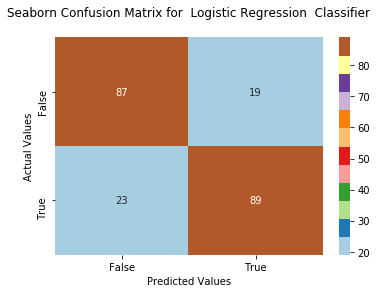



	Classification Report for Logistic Regression  Classifier

              precision    recall  f1-score   support

           0      0.791     0.821     0.806       106
           1      0.824     0.795     0.809       112

    accuracy                          0.807       218
   macro avg      0.807     0.808     0.807       218
weighted avg      0.808     0.807     0.807       218




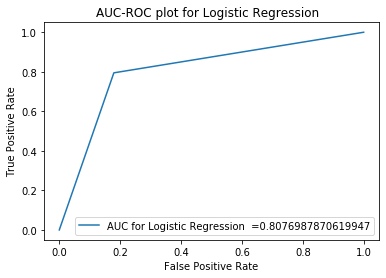



----------------Confusion Matrix for Naive Bayes Classifier--------------------


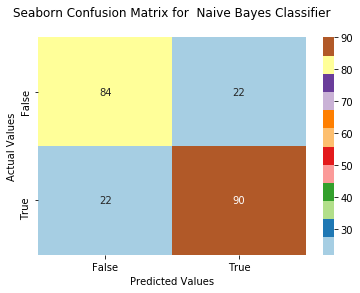



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.792     0.792     0.792       106
           1      0.804     0.804     0.804       112

    accuracy                          0.798       218
   macro avg      0.798     0.798     0.798       218
weighted avg      0.798     0.798     0.798       218




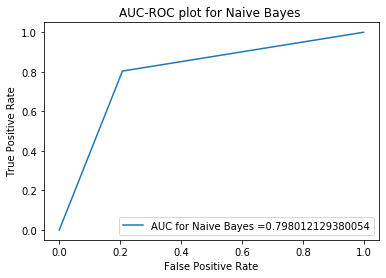



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


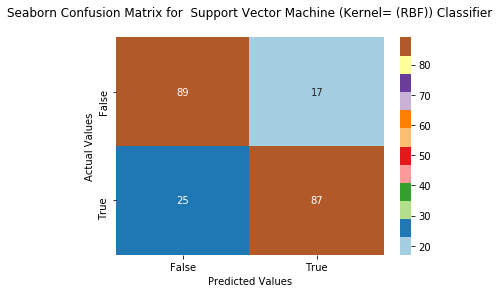



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.781     0.840     0.809       106
           1      0.837     0.777     0.806       112

    accuracy                          0.807       218
   macro avg      0.809     0.808     0.807       218
weighted avg      0.809     0.807     0.807       218




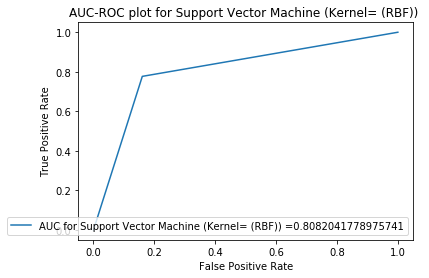



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


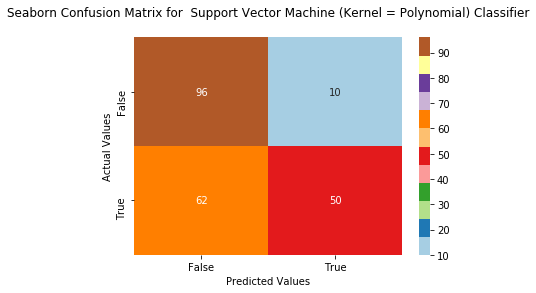



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.608     0.906     0.727       106
           1      0.833     0.446     0.581       112

    accuracy                          0.670       218
   macro avg      0.720     0.676     0.654       218
weighted avg      0.724     0.670     0.652       218




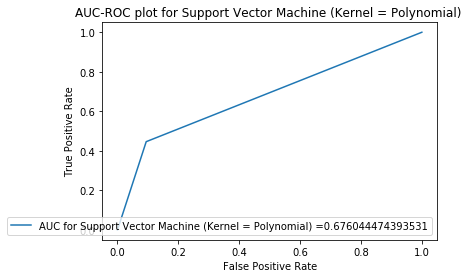



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


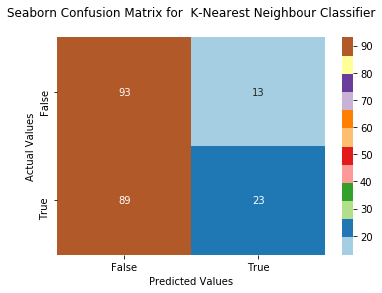



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      0.511     0.877     0.646       106
           1      0.639     0.205     0.311       112

    accuracy                          0.532       218
   macro avg      0.575     0.541     0.478       218
weighted avg      0.577     0.532     0.474       218




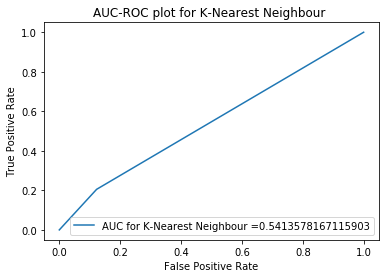



----------------Confusion Matrix for Decision Tree Classifier--------------------


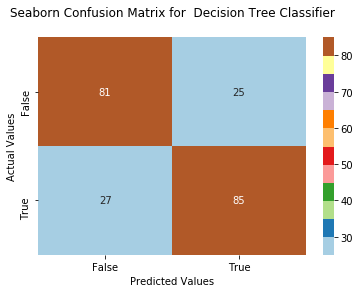



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.750     0.764     0.757       106
           1      0.773     0.759     0.766       112

    accuracy                          0.761       218
   macro avg      0.761     0.762     0.761       218
weighted avg      0.762     0.761     0.762       218




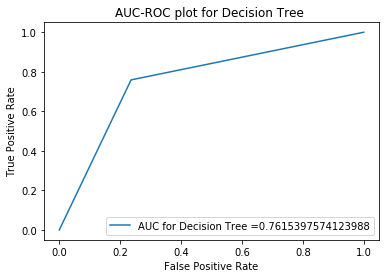



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


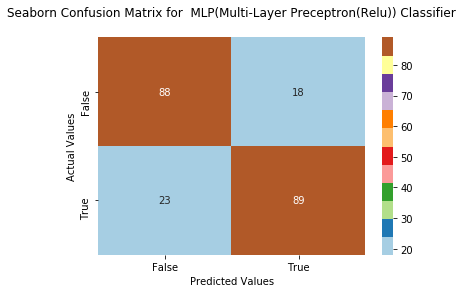



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.793     0.830     0.811       106
           1      0.832     0.795     0.813       112

    accuracy                          0.812       218
   macro avg      0.812     0.812     0.812       218
weighted avg      0.813     0.812     0.812       218




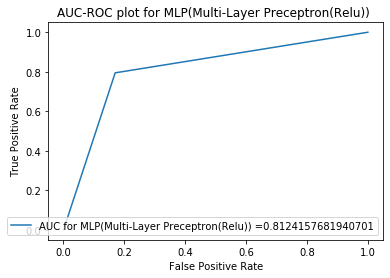



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


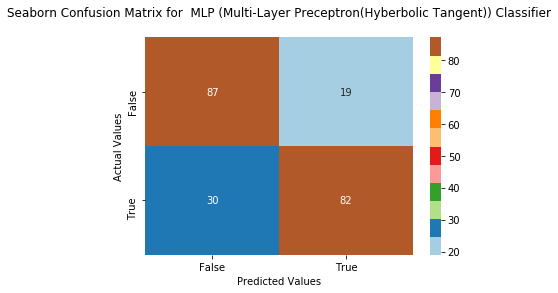



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.744     0.821     0.780       106
           1      0.812     0.732     0.770       112

    accuracy                          0.775       218
   macro avg      0.778     0.776     0.775       218
weighted avg      0.779     0.775     0.775       218




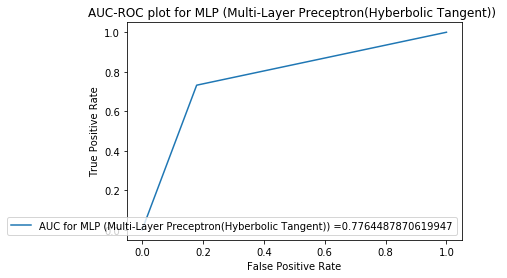



----------------Confusion Matrix for Perceptron Classifier--------------------


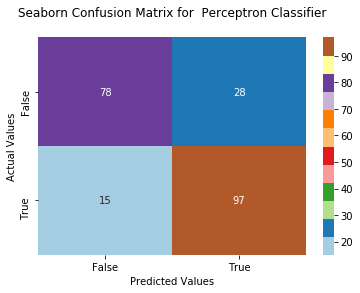



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.839     0.736     0.784       106
           1      0.776     0.866     0.819       112

    accuracy                          0.803       218
   macro avg      0.807     0.801     0.801       218
weighted avg      0.806     0.803     0.802       218




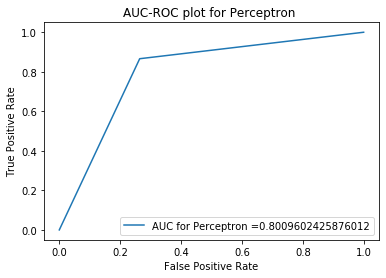

In [125]:
count = 0
for model in list_bow_classifier:
    performPrediction(model, X_testbow, y_testbow, "Paired", model_names[count])
    count += 1
 

### 5ad. Using Built-In Bag of Words Transformer to build the model Stanford Politeness Corpus

In [126]:
df_stack_binary[0:3]

timestamp                                               text speaker  \
id                                                                            
4   NOT_RECORDED              Is `A` a global variable?  What is x?    user   
5   NOT_RECORDED  This is a very confusing question!  How are yo...    user   
6   NOT_RECORDED  Why not using `isnan()` from math.h? Any speci...    user   

   reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                              
4      None               4              0.508284           1   
5      None               5             -0.393623          -1   
6      None               6             -0.689701          -1   

                                     meta.Annotations  \
id                                                      
4   {'A3OW54MEVDKXJL': 17, 'A2RDZ580VXUO1X': 18, '...   
5   {'A2WKPCZU4U110T': 16, 'A1BS64O3JY0YJ4': 14, '...   
6   {'AL97SCCNKZILP': 7, 'A3E157ZN8XPUKJ': 20, 'A2...   

                                          meta.parsed  \
id                                                      
4   [{'rt': 0, 'toks': [{'tok': 'is', 'tag': 'VBZ'...   
5   [{'rt': 1, 'toks': [{'tok': 'this', 'tag': 'DT...   
6   [{'rt': 2, 'toks': [{'tok': 'why', 'tag': 'WRB...   

                           meta.politeness_strategies  \
id                                                      
4   {'feature_politeness_==Please==': 0, 'feature_...   
5   {'feature_politeness_==Please==': 0, 'feature_...   
6   {'feature_politeness_==Please==': 0, 'feature_...   

                              meta.politeness_markers vectors  
id                                                             
4   {'politeness_markers_==Please==': [], 'politen...   [bow]  
5   {'politeness_markers_==Please==': [], 'politen...   [bow]  
6   {'politeness_markers_==Please==': [], 'politen...   [bow]

In [128]:
stack_bowvect_ = stack_corpus_binary.get_vector_matrix('bow').to_dataframe()

In [129]:
stack_bowvect_

10  100  30  _drupal  able  about  above  accept  access  accomplish  \
4      0    0   0        0     0      0      0       0       0           0   
5      0    0   0        0     0      0      0       0       0           0   
6      0    0   0        0     0      0      0       0       0           0   
9      0    0   0        0     0      0      0       0       0           0   
11     0    0   0        0     0      0      0       0       0           0   
...   ..  ...  ..      ...   ...    ...    ...     ...     ...         ...   
6595   0    0   0        0     0      0      0       0       0           0   
6596   0    0   0        0     0      0      0       0       0           0   
6597   0    0   0        0     0      0      0       0       0           0   
6599   0    0   0        0     0      0      0       0       0           0   
6601   0    0   0        0     0      0      0       0       0           0   

      ...  writing  written  wrong  www  xml  yeah  yes  yet  your  yourself  
4     ...        0        0      0    0    0     0    0    0     0         0  
5     ...        0        0      0    0    0     0    0    0     1         0  
6     ...        0        0      0    0    0     0    0    0     0         0  
9     ...        0        0      0    0    0     0    0    0     1         0  
11    ...        0        0      0    0    0     0    0    0     0         0  
...   ...      ...      ...    ...  ...  ...   ...  ...  ...   ...       ...  
6595  ...        0        0      0    0    0     0    0    0     0         0  
6596  ...        0        0      0    0    0     0    0    0     0         0  
6597  ...        0        0      0    0    0     0    0    0     0         0  
6599  ...        0        0      0    0    0     0    0    0     0         0  
6601  ...        0        0      0    0    0     0    0    0     0         0  

[3302 rows x 717 columns]

In [130]:
len(bow_transformer2.get_vocabulary())

717

In [131]:
df_bow_stack = pd.concat([stack_bowvect_ , df_stack_binary['meta.Binary'].astype("category")], axis = 1)
df_bow_stack[0:5]

10  100  30  _drupal  able  about  above  accept  access  accomplish  ...  \
4    0    0   0        0     0      0      0       0       0           0  ...   
5    0    0   0        0     0      0      0       0       0           0  ...   
6    0    0   0        0     0      0      0       0       0           0  ...   
9    0    0   0        0     0      0      0       0       0           0  ...   
11   0    0   0        0     0      0      0       0       0           0  ...   

    written  wrong  www  xml  yeah  yes  yet  your  yourself  meta.Binary  
4         0      0    0    0     0    0    0     0         0            1  
5         0      0    0    0     0    0    0     1         0           -1  
6         0      0    0    0     0    0    0     0         0           -1  
9         0      0    0    0     0    0    0     1         0            1  
11        0      0    0    0     0    0    0     0         0            1  

[5 rows x 718 columns]

In [132]:
df_bow_stack['meta.Binary'].replace({1:1, -1:0}, inplace = True)

In [133]:
df_bow_stack

10  100  30  _drupal  able  about  above  accept  access  accomplish  \
4      0    0   0        0     0      0      0       0       0           0   
5      0    0   0        0     0      0      0       0       0           0   
6      0    0   0        0     0      0      0       0       0           0   
9      0    0   0        0     0      0      0       0       0           0   
11     0    0   0        0     0      0      0       0       0           0   
...   ..  ...  ..      ...   ...    ...    ...     ...     ...         ...   
6595   0    0   0        0     0      0      0       0       0           0   
6596   0    0   0        0     0      0      0       0       0           0   
6597   0    0   0        0     0      0      0       0       0           0   
6599   0    0   0        0     0      0      0       0       0           0   
6601   0    0   0        0     0      0      0       0       0           0   

      ...  written  wrong  www  xml  yeah  yes  yet  your  yourself  \
4     ...        0      0    0    0     0    0    0     0         0   
5     ...        0      0    0    0     0    0    0     1         0   
6     ...        0      0    0    0     0    0    0     0         0   
9     ...        0      0    0    0     0    0    0     1         0   
11    ...        0      0    0    0     0    0    0     0         0   
...   ...      ...    ...  ...  ...   ...  ...  ...   ...       ...   
6595  ...        0      0    0    0     0    0    0     0         0   
6596  ...        0      0    0    0     0    0    0     0         0   
6597  ...        0      0    0    0     0    0    0     0         0   
6599  ...        0      0    0    0     0    0    0     0         0   
6601  ...        0      0    0    0     0    0    0     0         0   

      meta.Binary  
4               1  
5               0  
6               0  
9               1  
11              1  
...           ...  
6595            1  
6596            1  
6597            1  
6599            1  
6601            1  

[3302 rows x 718 columns]

In [134]:
X_trainbow, X_testbow, y_trainbow, y_testbow = split_data(df_bow_stack, 0.90, df_bow_stack.shape)

In [135]:
list_clf_stack_bow = generateModels(X_trainbow, y_trainbow)



----------------Confusion Matrix for Logistic Regression  Classifier--------------------


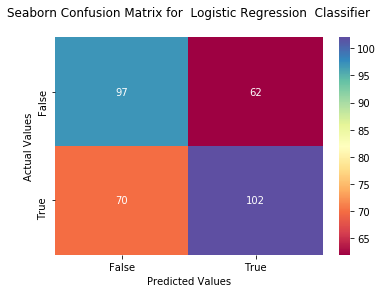



	Classification Report for Logistic Regression  Classifier

              precision    recall  f1-score   support

           0      0.581     0.610     0.595       159
           1      0.622     0.593     0.607       172

    accuracy                          0.601       331
   macro avg      0.601     0.602     0.601       331
weighted avg      0.602     0.601     0.601       331




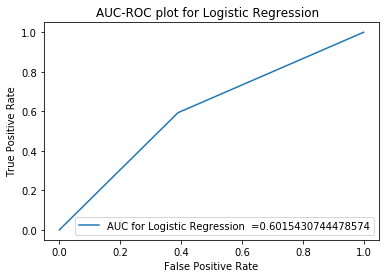



----------------Confusion Matrix for Naive Bayes Classifier--------------------


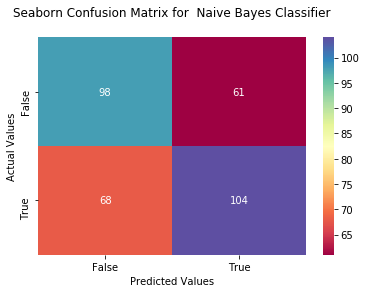



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.590     0.616     0.603       159
           1      0.630     0.605     0.617       172

    accuracy                          0.610       331
   macro avg      0.610     0.611     0.610       331
weighted avg      0.611     0.610     0.610       331




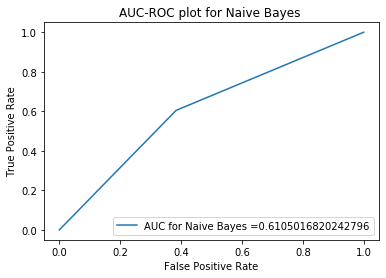



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


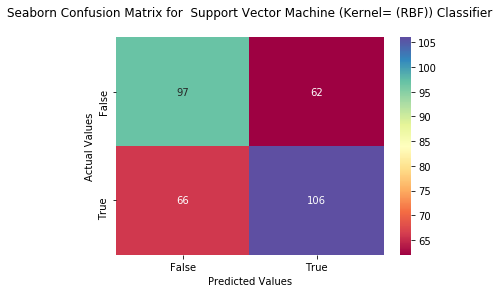



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.595     0.610     0.602       159
           1      0.631     0.616     0.624       172

    accuracy                          0.613       331
   macro avg      0.613     0.613     0.613       331
weighted avg      0.614     0.613     0.613       331




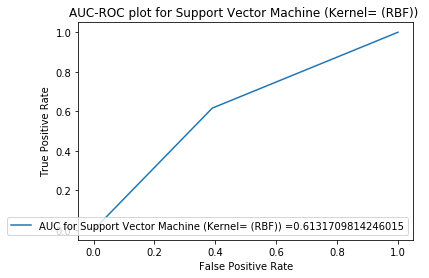



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


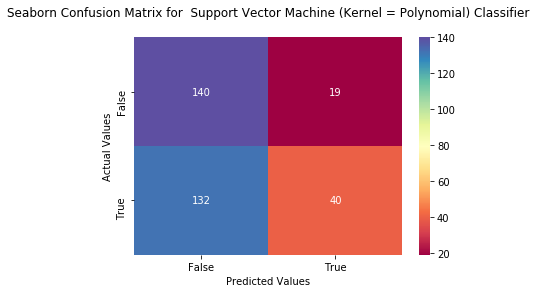



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.515     0.881     0.650       159
           1      0.678     0.233     0.346       172

    accuracy                          0.544       331
   macro avg      0.596     0.557     0.498       331
weighted avg      0.600     0.544     0.492       331




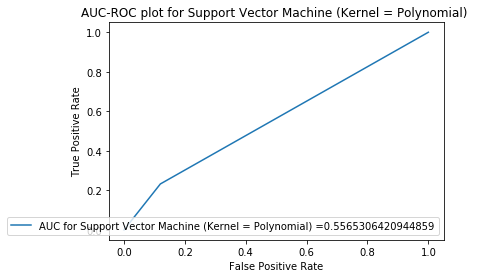



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


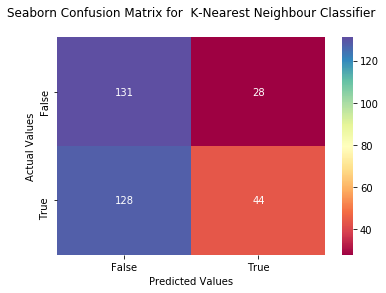



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      0.506     0.824     0.627       159
           1      0.611     0.256     0.361       172

    accuracy                          0.529       331
   macro avg      0.558     0.540     0.494       331
weighted avg      0.561     0.529     0.488       331




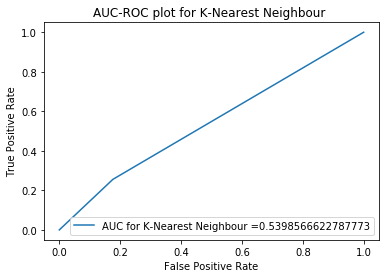



----------------Confusion Matrix for Decision Tree Classifier--------------------


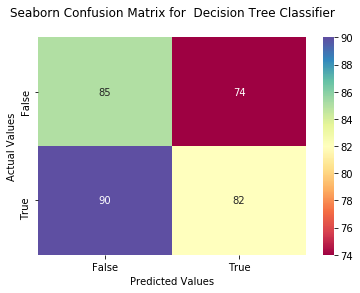



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.486     0.535     0.509       159
           1      0.526     0.477     0.500       172

    accuracy                          0.505       331
   macro avg      0.506     0.506     0.504       331
weighted avg      0.506     0.505     0.504       331




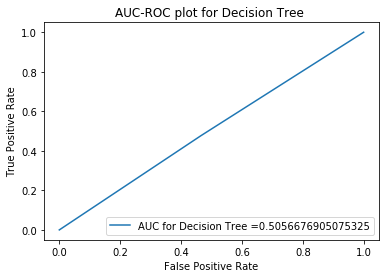



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


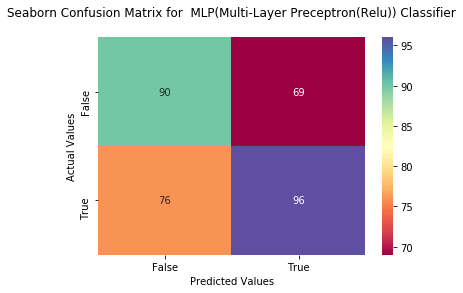



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.542     0.566     0.554       159
           1      0.582     0.558     0.570       172

    accuracy                          0.562       331
   macro avg      0.562     0.562     0.562       331
weighted avg      0.563     0.562     0.562       331




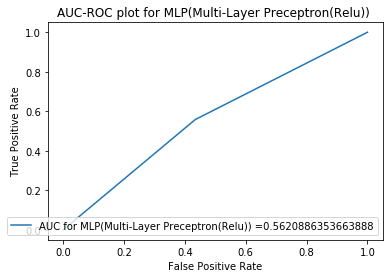



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


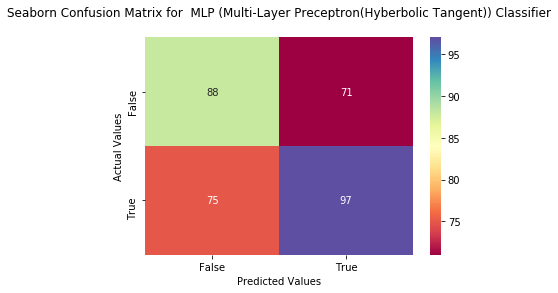



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.540     0.553     0.547       159
           1      0.577     0.564     0.571       172

    accuracy                          0.559       331
   macro avg      0.559     0.559     0.559       331
weighted avg      0.559     0.559     0.559       331




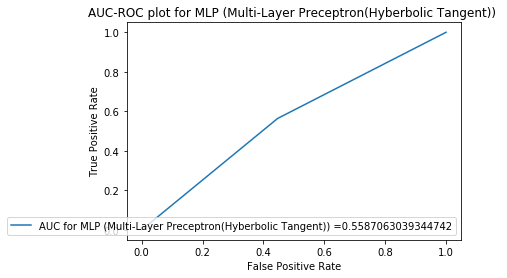



----------------Confusion Matrix for Perceptron Classifier--------------------


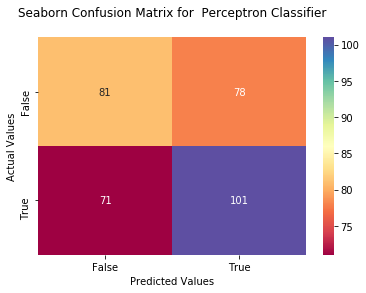



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.533     0.509     0.521       159
           1      0.564     0.587     0.575       172

    accuracy                          0.550       331
   macro avg      0.549     0.548     0.548       331
weighted avg      0.549     0.550     0.549       331




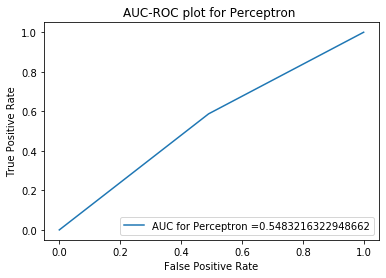

In [136]:
model_names = ["Logistic Regression ", "Naive Bayes", "Support Vector Machine (Kernel= (RBF))",
               "Support Vector Machine (Kernel = Polynomial)","K-Nearest Neighbour","Decision Tree",
                "MLP(Multi-Layer Preceptron(Relu))", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))","Perceptron"
              ]

count = 0
for model in list_clf_stack_bow:
    performPrediction(model, X_testbow, y_testbow, "Spectral", model_names[count])
    count += 1

# 6. Combine BoW with linguistic features baseline 

## 6a. Wiki

In [137]:
df_bow_features[0:3]

able  about  above  account  actually  add  added  adding  address  \
629705     0      0      0        0         0    0      0       0        0   
244336     0      0      0        0         0    0      0       0        0   
214411     0      1      0        0         0    0      0       0        0   

        admin  ...  wrong  wrote  yeah  year  years  yes  yet  your  yourself  \
629705      0  ...      0      0     0     0      0    0    0     0         0   
244336      0  ...      0      0     0     0      0    0    0     1         0   
214411      0  ...      0      0     0     0      0    0    0     0         0   

        meta.Binary  
629705            0  
244336            1  
214411            1  

[3 rows x 564 columns]

In [138]:
df_feature[0:3]

feature_politeness_==1st_person==  \
629705                                0.0   
244336                                0.0   
214411                                1.0   

        feature_politeness_==1st_person_pl.==  \
629705                                    0.0   
244336                                    0.0   
214411                                    0.0   

        feature_politeness_==1st_person_start==  \
629705                                      0.0   
244336                                      0.0   
214411                                      0.0   

        feature_politeness_==2nd_person==  \
629705                                1.0   
244336                                1.0   
214411                                1.0   

        feature_politeness_==2nd_person_start==  \
629705                                      0.0   
244336                                      0.0   
214411                                      0.0   

        feature_politeness_==Apologizing==  feature_politeness_==Deference==  \
629705                                 0.0                               0.0   
244336                                 0.0                               0.0   
214411                                 0.0                               0.0   

        feature_politeness_==Direct_question==  \
629705                                     1.0   
244336                                     0.0   
214411                                     0.0   

        feature_politeness_==Direct_start==  \
629705                                  0.0   
244336                                  0.0   
214411                                  0.0   

        feature_politeness_==Factuality==  ...  \
629705                                0.0  ...   
244336                                0.0  ...   
214411                                0.0  ...   

        feature_politeness_==HASNEGATIVE==  \
629705                                 0.0   
244336                                 0.0   
214411                                 0.0   

        feature_politeness_==HASPOSITIVE==  feature_politeness_==Hedges==  \
629705                                 0.0                            0.0   
244336                                 0.0                            0.0   
214411                                 0.0                            0.0   

        feature_politeness_==INDICATIVE==  \
629705                                0.0   
244336                                0.0   
214411                                0.0   

        feature_politeness_==Indirect_(btw)==  \
629705                                    0.0   
244336                                    0.0   
214411                                    0.0   

        feature_politeness_==Indirect_(greeting)==  \
629705                                         0.0   
244336                                         0.0   
214411                                         0.0   

        feature_politeness_==Please==  feature_politeness_==Please_start==  \
629705                            0.0                                  0.0   
244336                            0.0                                  0.0   
214411                            1.0                                  0.0   

        feature_politeness_==SUBJUNCTIVE==  meta.Binary  
629705                                 0.0            0  
244336                                 1.0            1  
214411                                 1.0            1  

[3 rows x 22 columns]

In [139]:
bow_and_pstrat_ = pd.concat([df_bow_features.drop(columns = ['meta.Binary']), df_feature], axis =1)

In [140]:
bow_and_pstrat_

able  about  above  account  actually  add  added  adding  address  \
629705     0      0      0        0         0    0      0       0        0   
244336     0      0      0        0         0    0      0       0        0   
214411     0      1      0        0         0    0      0       0        0   
177439     0      0      0        0         0    0      0       0        0   
341534     0      0      0        0         0    0      0       0        0   
...      ...    ...    ...      ...       ...  ...    ...     ...      ...   
60798      0      0      0        0         0    1      0       0        0   
156734     0      0      0        0         0    0      0       0        0   
147665     0      0      0        0         0    0      0       0        0   
234095     0      1      0        0         0    0      0       0        0   
563032     0      0      0        0         0    0      0       0        0   

        admin  ...  feature_politeness_==HASNEGATIVE==  \
629705      0  ...                                 0.0   
244336      0  ...                                 0.0   
214411      0  ...                                 0.0   
177439      2  ...                                 1.0   
341534      0  ...                                 0.0   
...       ...  ...                                 ...   
60798       0  ...                                 1.0   
156734      0  ...                                 1.0   
147665      0  ...                                 0.0   
234095      0  ...                                 1.0   
563032      0  ...                                 1.0   

        feature_politeness_==HASPOSITIVE==  feature_politeness_==Hedges==  \
629705                                 0.0                            0.0   
244336                                 0.0                            0.0   
214411                                 0.0                            0.0   
177439                                 1.0                            0.0   
341534                                 1.0                            0.0   
...                                    ...                            ...   
60798                                  0.0                            1.0   
156734                                 0.0                            0.0   
147665                                 1.0                            0.0   
234095                                 0.0                            1.0   
563032                                 1.0                            1.0   

        feature_politeness_==INDICATIVE==  \
629705                                0.0   
244336                                0.0   
214411                                0.0   
177439                                0.0   
341534                                0.0   
...                                   ...   
60798                                 0.0   
156734                                0.0   
147665                                0.0   
234095                                0.0   
563032                                1.0   

        feature_politeness_==Indirect_(btw)==  \
629705                                    0.0   
244336                                    0.0   
214411                                    0.0   
177439                                    0.0   
341534                                    0.0   
...                                       ...   
60798                                     0.0   
156734                                    0.0   
147665                                    0.0   
234095                                    0.0   
563032                                    0.0   

        feature_politeness_==Indirect_(greeting)==  \
629705                                         0.0   
244336                                         0.0   
214411                                         0.0   
177439                                         0.0   
341534                                         0.

### Train the model 



----------------Confusion Matrix for Logistic Regression  Classifier--------------------


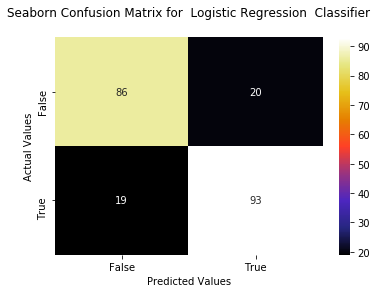



	Classification Report for Logistic Regression  Classifier

              precision    recall  f1-score   support

           0      0.819     0.811     0.815       106
           1      0.823     0.830     0.827       112

    accuracy                          0.821       218
   macro avg      0.821     0.821     0.821       218
weighted avg      0.821     0.821     0.821       218




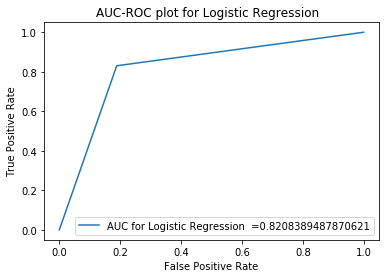



----------------Confusion Matrix for Naive Bayes Classifier--------------------


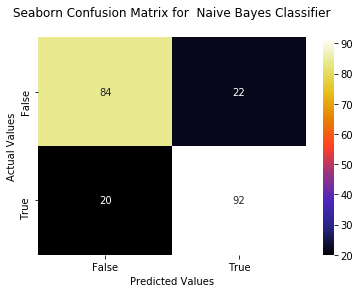



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.808     0.792     0.800       106
           1      0.807     0.821     0.814       112

    accuracy                          0.807       218
   macro avg      0.807     0.807     0.807       218
weighted avg      0.807     0.807     0.807       218




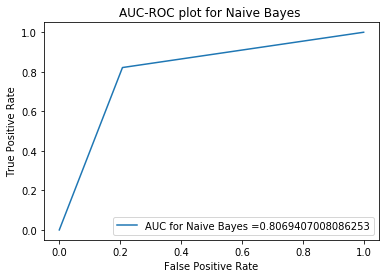



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


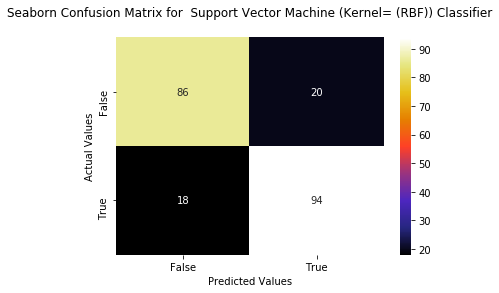



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.827     0.811     0.819       106
           1      0.825     0.839     0.832       112

    accuracy                          0.826       218
   macro avg      0.826     0.825     0.825       218
weighted avg      0.826     0.826     0.826       218




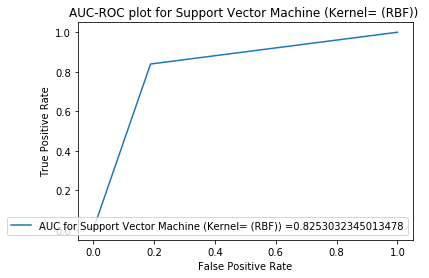



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


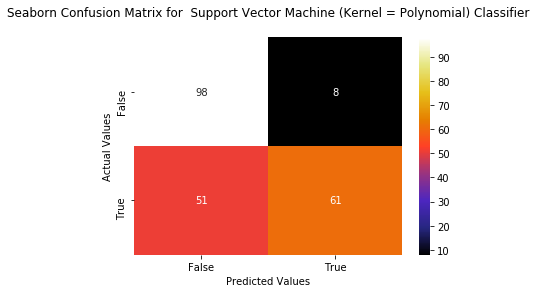



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.658     0.925     0.769       106
           1      0.884     0.545     0.674       112

    accuracy                          0.729       218
   macro avg      0.771     0.735     0.721       218
weighted avg      0.774     0.729     0.720       218




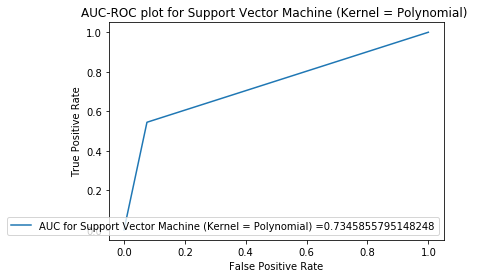



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


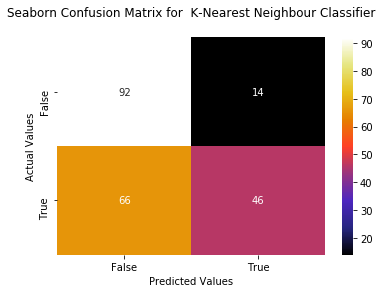



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      0.582     0.868     0.697       106
           1      0.767     0.411     0.535       112

    accuracy                          0.633       218
   macro avg      0.674     0.639     0.616       218
weighted avg      0.677     0.633     0.614       218




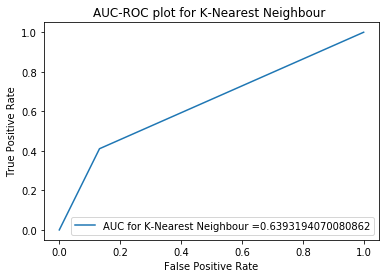



----------------Confusion Matrix for Decision Tree Classifier--------------------


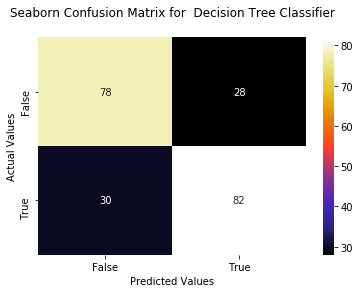



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.722     0.736     0.729       106
           1      0.745     0.732     0.739       112

    accuracy                          0.734       218
   macro avg      0.734     0.734     0.734       218
weighted avg      0.734     0.734     0.734       218




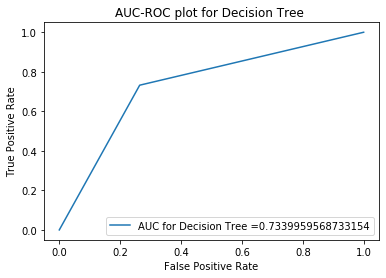



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


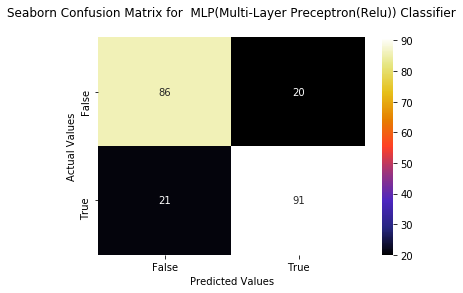



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.804     0.811     0.808       106
           1      0.820     0.812     0.816       112

    accuracy                          0.812       218
   macro avg      0.812     0.812     0.812       218
weighted avg      0.812     0.812     0.812       218




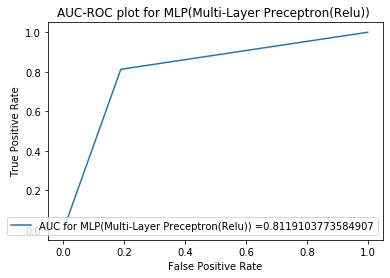



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


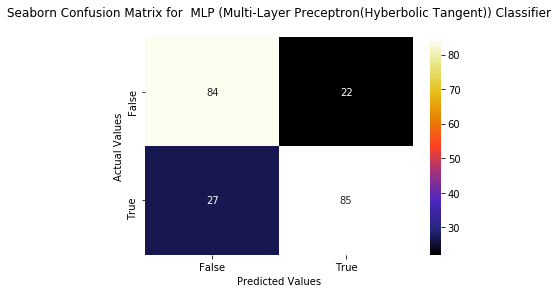



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.757     0.792     0.774       106
           1      0.794     0.759     0.776       112

    accuracy                          0.775       218
   macro avg      0.776     0.776     0.775       218
weighted avg      0.776     0.775     0.775       218




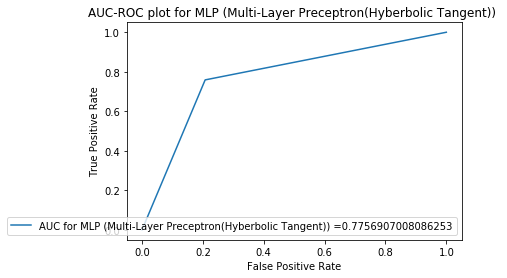



----------------Confusion Matrix for Perceptron Classifier--------------------


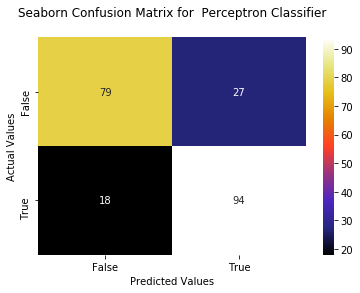



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.814     0.745     0.778       106
           1      0.777     0.839     0.807       112

    accuracy                          0.794       218
   macro avg      0.796     0.792     0.793       218
weighted avg      0.795     0.794     0.793       218




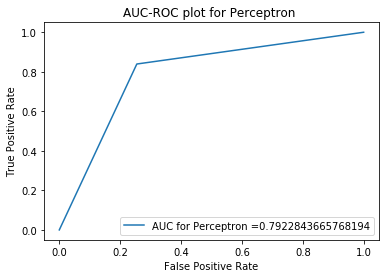

In [141]:
X_train_bow_polite, X_test_bow_polite, y_train_bow_polite, y_test_bow_polite = split_data(bow_and_pstrat_ , 0.90, 
                                                                          bow_and_pstrat_ .shape)
list_bow_polite = generateModels(X_train_bow_polite , y_train_bow_polite)

model_names = ["Logistic Regression ", "Naive Bayes", "Support Vector Machine (Kernel= (RBF))",
               "Support Vector Machine (Kernel = Polynomial)","K-Nearest Neighbour","Decision Tree",
                "MLP(Multi-Layer Preceptron(Relu))", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))","Perceptron"
              ]

count = 0
for model in list_bow_polite:
    performPrediction(model, X_test_bow_polite, y_test_bow_polite, "CMRmap", model_names[count])
    count += 1

In [143]:
df_bow_features

able  about  above  account  actually  add  added  adding  address  \
629705     0      0      0        0         0    0      0       0        0   
244336     0      0      0        0         0    0      0       0        0   
214411     0      1      0        0         0    0      0       0        0   
177439     0      0      0        0         0    0      0       0        0   
341534     0      0      0        0         0    0      0       0        0   
...      ...    ...    ...      ...       ...  ...    ...     ...      ...   
60798      0      0      0        0         0    1      0       0        0   
156734     0      0      0        0         0    0      0       0        0   
147665     0      0      0        0         0    0      0       0        0   
234095     0      1      0        0         0    0      0       0        0   
563032     0      0      0        0         0    0      0       0        0   

        admin  ...  wrong  wrote  yeah  year  years  yes  yet  your  yourself  \
629705      0  ...      0      0     0     0      0    0    0     0         0   
244336      0  ...      0      0     0     0      0    0    0     1         0   
214411      0  ...      0      0     0     0      0    0    0     0         0   
177439      2  ...      0      0     0     1      3    0    0     0         0   
341534      0  ...      0      0     0     0      0    0    0     0         0   
...       ...  ...    ...    ...   ...   ...    ...  ...  ...   ...       ...   
60798       0  ...      0      0     0     0      0    0    0     0         0   
156734      0  ...      0      0     0     0      0    0    0     0         0   
147665      0  ...      0      0     0     0      0    0    0     1         0   
234095      0  ...      0      0     0     0      0    0    0     0         0   
563032      0  ...      0      0     0     0      0    0    0     0         0   

        meta.Binary  
629705            0  
244336            1  
214411            1  
177439            0  
341534            0  
...             ...  
60798             1  
156734            1  
147665            0  
234095            0  
563032            0  

[2178 rows x 564 columns]

## 6b. Stack Exchange

In [144]:
df_bow_stack

10  100  30  _drupal  able  about  above  accept  access  accomplish  \
4      0    0   0        0     0      0      0       0       0           0   
5      0    0   0        0     0      0      0       0       0           0   
6      0    0   0        0     0      0      0       0       0           0   
9      0    0   0        0     0      0      0       0       0           0   
11     0    0   0        0     0      0      0       0       0           0   
...   ..  ...  ..      ...   ...    ...    ...     ...     ...         ...   
6595   0    0   0        0     0      0      0       0       0           0   
6596   0    0   0        0     0      0      0       0       0           0   
6597   0    0   0        0     0      0      0       0       0           0   
6599   0    0   0        0     0      0      0       0       0           0   
6601   0    0   0        0     0      0      0       0       0           0   

      ...  written  wrong  www  xml  yeah  yes  yet  your  yourself  \
4     ...        0      0    0    0     0    0    0     0         0   
5     ...        0      0    0    0     0    0    0     1         0   
6     ...        0      0    0    0     0    0    0     0         0   
9     ...        0      0    0    0     0    0    0     1         0   
11    ...        0      0    0    0     0    0    0     0         0   
...   ...      ...    ...  ...  ...   ...  ...  ...   ...       ...   
6595  ...        0      0    0    0     0    0    0     0         0   
6596  ...        0      0    0    0     0    0    0     0         0   
6597  ...        0      0    0    0     0    0    0     0         0   
6599  ...        0      0    0    0     0    0    0     0         0   
6601  ...        0      0    0    0     0    0    0     0         0   

      meta.Binary  
4               1  
5               0  
6               0  
9               1  
11              1  
...           ...  
6595            1  
6596            1  
6597            1  
6599            1  
6601            1  

[3302 rows x 718 columns]

In [145]:
df_standford_features

feature_politeness_==1st_person==  \
4                                   0.0   
5                                   0.0   
6                                   0.0   
9                                   0.0   
11                                  0.0   
...                                 ...   
6595                                0.0   
6596                                0.0   
6597                                0.0   
6599                                1.0   
6601                                0.0   

      feature_politeness_==1st_person_pl.==  \
4                                       0.0   
5                                       0.0   
6                                       0.0   
9                                       0.0   
11                                      0.0   
...                                     ...   
6595                                    0.0   
6596                                    0.0   
6597                                    0.0   
6599                                    0.0   
6601                                    0.0   

      feature_politeness_==1st_person_start==  \
4                                         0.0   
5                                         0.0   
6                                         0.0   
9                                         0.0   
11                                        0.0   
...                                       ...   
6595                                      0.0   
6596                                      0.0   
6597                                      0.0   
6599                                      0.0   
6601                                      1.0   

      feature_politeness_==2nd_person==  \
4                                   0.0   
5                                   1.0   
6                                   0.0   
9                                   1.0   
11                                  1.0   
...                                 ...   
6595                                1.0   
6596                                0.0   
6597                                1.0   
6599                                0.0   
6601                                0.0   

      feature_politeness_==2nd_person_start==  \
4                                         0.0   
5                                         0.0   
6                                         0.0   
9                                         0.0   
11                                        0.0   
...                                       ...   
6595                                      1.0   
6596                                      0.0   
6597                                      0.0   
6599                                      0.0   
6601                                      0.0   

      feature_politeness_==Apologizing==  feature_politeness_==Deference==  \
4                                    0.0                               0.0   
5                                    0.0                               0.0   
6                                    0.0                               0.0   
9                                    0.0                               0.0   
11                                   0.0                               0.0   
...                                  ...                               ...   
6595                                 0.0                               0.0   
6596                                 0.0                               0.0   
6597                                 0.0                               1.0   
6599                                 0.0                               0.0   
6601                                 0.0                               1.0   

      feature_politeness_==Direct_question==  \
4                                        1.0   
5                                        1.0   
6                                        1.0   
9                                        1.0   
11                                       0.0   
... 

In [146]:
bow_and_pstrat_stack = pd.concat([df_bow_stack.drop(columns = ['meta.Binary']), df_standford_features], axis =1)
bow_and_pstrat_stack

10  100  30  _drupal  able  about  above  accept  access  accomplish  \
4      0    0   0        0     0      0      0       0       0           0   
5      0    0   0        0     0      0      0       0       0           0   
6      0    0   0        0     0      0      0       0       0           0   
9      0    0   0        0     0      0      0       0       0           0   
11     0    0   0        0     0      0      0       0       0           0   
...   ..  ...  ..      ...   ...    ...    ...     ...     ...         ...   
6595   0    0   0        0     0      0      0       0       0           0   
6596   0    0   0        0     0      0      0       0       0           0   
6597   0    0   0        0     0      0      0       0       0           0   
6599   0    0   0        0     0      0      0       0       0           0   
6601   0    0   0        0     0      0      0       0       0           0   

      ...  feature_politeness_==HASNEGATIVE==  \
4     ...                                 0.0   
5     ...                                 1.0   
6     ...                                 0.0   
9     ...                                 0.0   
11    ...                                 0.0   
...   ...                                 ...   
6595  ...                                 0.0   
6596  ...                                 0.0   
6597  ...                                 0.0   
6599  ...                                 0.0   
6601  ...                                 0.0   

      feature_politeness_==HASPOSITIVE==  feature_politeness_==Hedges==  \
4                                    0.0                            0.0   
5                                    0.0                            0.0   
6                                    0.0                            0.0   
9                                    0.0                            0.0   
11                                   1.0                            0.0   
...                                  ...                            ...   
6595                                 1.0                            0.0   
6596                                 1.0                            0.0   
6597                                 1.0                            0.0   
6599                                 1.0                            0.0   
6601                                 1.0                            0.0   

      feature_politeness_==INDICATIVE==  \
4                                   0.0   
5                                   0.0   
6                                   0.0   
9                                   0.0   
11                                  0.0   
...                                 ...   
6595                                0.0   
6596                                0.0   
6597                                0.0   
6599                                0.0   
6601                                0.0   

      feature_politeness_==Indirect_(btw)==  \
4                                       0.0   
5                                       0.0   
6                                       0.0   
9                                       0.0   
11                                      0.0   
...                                     ...   
6595                                    0.0   
6596                                    0.0   
6597                                    0.0   
6599                                    0.0   
6601                                    0.0   

      feature_politeness_==Indirect_(greeting)==  \
4                                            0.0   
5                                            0.0   
6                                            0.0   
9                                            0.0   
11                                           0.0   
...                                          ...   
6595                                         0.0   
6596                                         0.0   
6597                         

In [147]:
X_train_bow_polite_2, X_test_bow_polite_2, y_train_bow_polite_2, y_test_bow_polite_2 = split_data(bow_and_pstrat_stack, 0.90, 
                                                                          bow_and_pstrat_stack.shape)
list_bow_polite_stack = generateModels(X_train_bow_polite_2 , y_train_bow_polite_2)

model_names = ["Logistic Regression ", "Naive Bayes", "Support Vector Machine (Kernel= (RBF))",
               "Support Vector Machine (Kernel = Polynomial)","K-Nearest Neighbour","Decision Tree",
                "MLP(Multi-Layer Preceptron(Relu))", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))","Perceptron"
              ]

X_train_bow_polite_2
X_test_bow_polite_2.shape

(331, 738)



----------------Confusion Matrix for Logistic Regression  Classifier--------------------


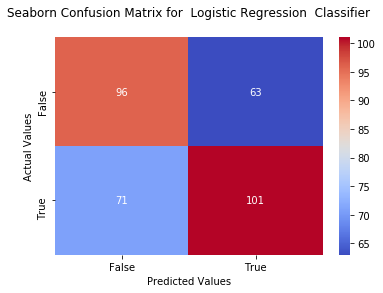



	Classification Report for Logistic Regression  Classifier

              precision    recall  f1-score   support

           0      0.575     0.604     0.589       159
           1      0.616     0.587     0.601       172

    accuracy                          0.595       331
   macro avg      0.595     0.595     0.595       331
weighted avg      0.596     0.595     0.595       331




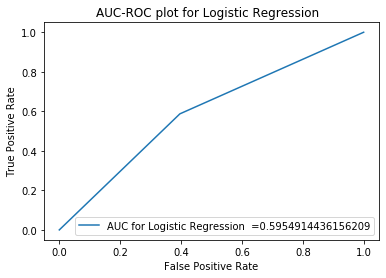



----------------Confusion Matrix for Naive Bayes Classifier--------------------


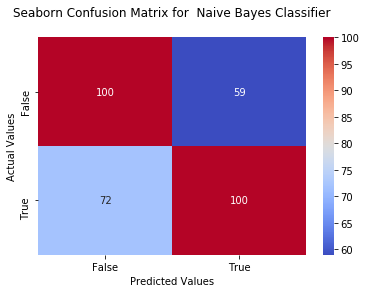



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.581     0.629     0.604       159
           1      0.629     0.581     0.604       172

    accuracy                          0.604       331
   macro avg      0.605     0.605     0.604       331
weighted avg      0.606     0.604     0.604       331




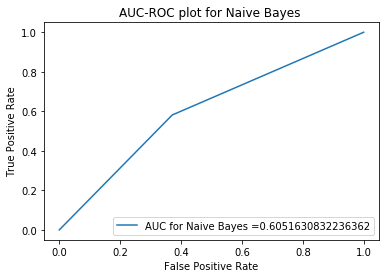



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


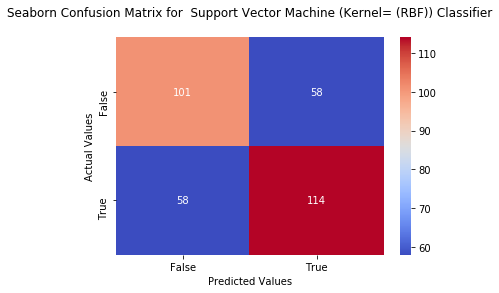



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.635     0.635     0.635       159
           1      0.663     0.663     0.663       172

    accuracy                          0.650       331
   macro avg      0.649     0.649     0.649       331
weighted avg      0.650     0.650     0.650       331




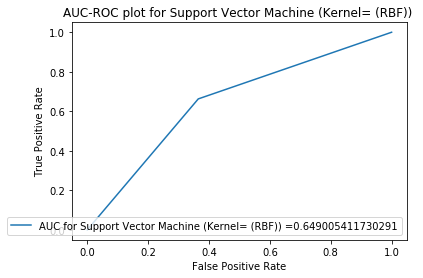



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


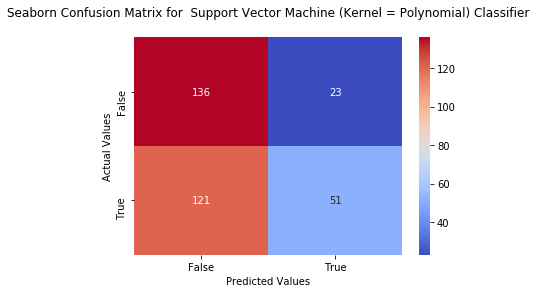



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.529     0.855     0.654       159
           1      0.689     0.297     0.415       172

    accuracy                          0.565       331
   macro avg      0.609     0.576     0.534       331
weighted avg      0.612     0.565     0.530       331




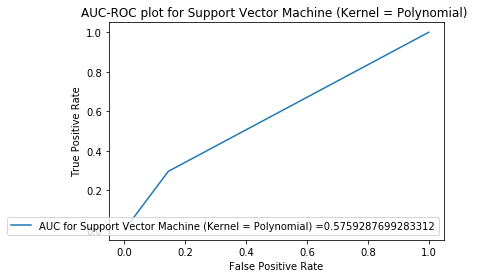



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


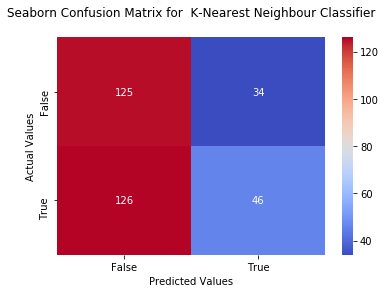



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      0.498     0.786     0.610       159
           1      0.575     0.267     0.365       172

    accuracy                          0.517       331
   macro avg      0.537     0.527     0.487       331
weighted avg      0.538     0.517     0.483       331




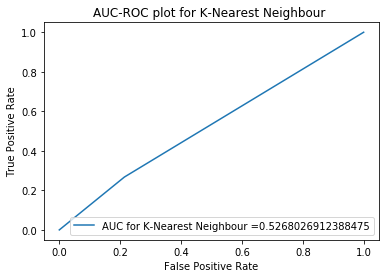



----------------Confusion Matrix for Decision Tree Classifier--------------------


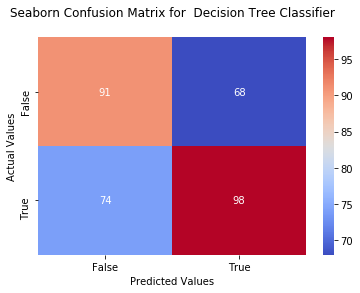



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.552     0.572     0.562       159
           1      0.590     0.570     0.580       172

    accuracy                          0.571       331
   macro avg      0.571     0.571     0.571       331
weighted avg      0.572     0.571     0.571       331




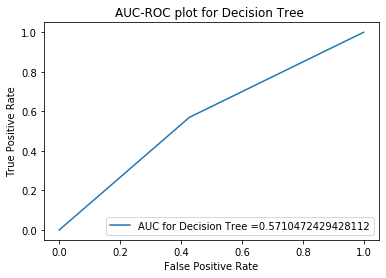



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


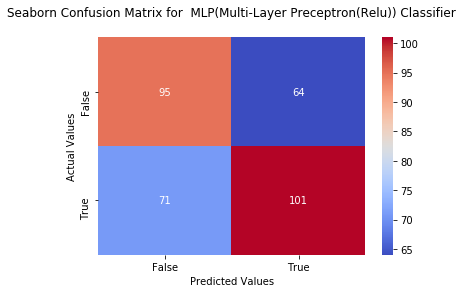



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.572     0.597     0.585       159
           1      0.612     0.587     0.599       172

    accuracy                          0.592       331
   macro avg      0.592     0.592     0.592       331
weighted avg      0.593     0.592     0.592       331




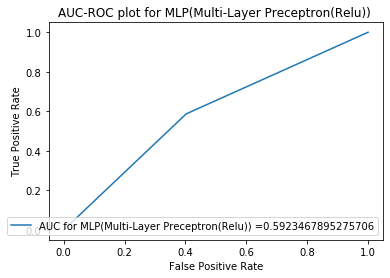



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


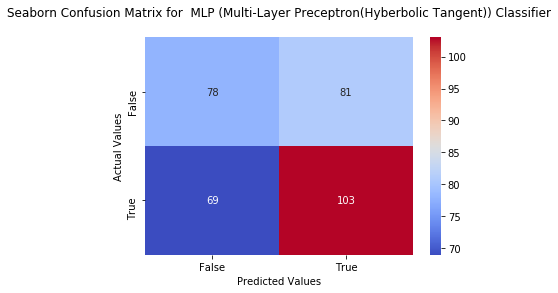



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.531     0.491     0.510       159
           1      0.560     0.599     0.579       172

    accuracy                          0.547       331
   macro avg      0.545     0.545     0.544       331
weighted avg      0.546     0.547     0.546       331




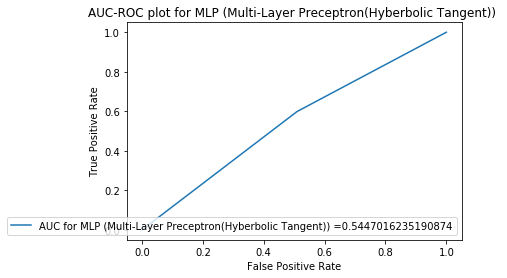



----------------Confusion Matrix for Perceptron Classifier--------------------


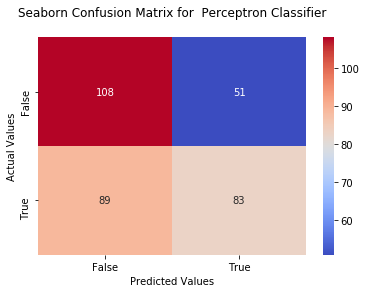



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.548     0.679     0.607       159
           1      0.619     0.483     0.542       172

    accuracy                          0.577       331
   macro avg      0.584     0.581     0.575       331
weighted avg      0.585     0.577     0.573       331




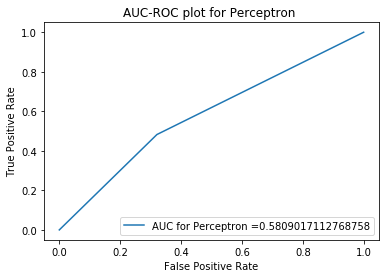

In [148]:
count = 0
for model in list_bow_polite_stack:
    performPrediction(model, X_test_bow_polite_2, y_test_bow_polite_2, "coolwarm", model_names[count])
    count += 1

# 7 . TF-idf

Term frequency refers to the frequency of a term t in document d. The inverse document frequency is a measure of whether a term is common or rare. To analyze utterance text, convert text to its correspondinf tf-idf vector

In [149]:
from convokit import ColNormedTfidfTransformer

In [150]:
# lst= []
# id_list = []

# for utt in wiki_corpus_binary.iter_utterances():
#     lst.append(utt.text.lower())

# lst



# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.pipeline import Pipeline
# vectorizer = CountVectorizer(stop_words='english',analyzer='word')
# document_term_matrix = vectorizer.fit_transform(lst)
# document_term_matrix.shape

# tfidf_transformer = TfidfTransformer()
# tf_idf = tfidf_transformer.fit_transform(document_term_matrix )

# kl = list(vectorizer.vocabulary_.keys())
# len(kl)

# df_feature



# x = pd.DataFrame(tf_idf.toarray() ,columns = kl )
# x


# print(list(x.columns))

## 7a. TF-IDF using Wiki Politeness Corpus

In [151]:
def load_wiki_politeness():
    ''' Function loads the corpus '''
    from convokit import TextParser, PolitenessStrategies
    
    parser = TextParser(verbosity = 2000)
    ps = PolitenessStrategies()
    
    wiki_corpus = Corpus(download('wikipedia-politeness-corpus'))
    wiki_corpus_binary = Corpus(utterances = [utt for utt in wiki_corpus.iter_utterances() if utt.meta['Binary']!= 0 ])

    wiki_corpus_binary = parser.transform(wiki_corpus_binary)
    wiki_corpus_binary = ps.transform(wiki_corpus_binary, markers = True)

    df_wiki_binary = wiki_corpus_binary.get_utterances_dataframe()
    df_wiki_binary
    
    return wiki_corpus_binary, df_wiki_binary

In [152]:
#reload the corpus 

wiki_corpus_binary,df_wiki_binary = load_wiki_politeness()

Dataset already exists at C:\Users\pulki\capstone project\march 11th 2021 politeness\wikipedia-politeness-corpus
2000/2178 utterances processed
2178/2178 utterances processed


In [153]:
df_wiki_binary[0:3]

timestamp                                               text  \
id                                                                        
629705  NOT_RECORDED  Where did you learn English? How come you're t...   
244336  NOT_RECORDED  Thanks very much for your edit to the <url> ar...   
214411  NOT_RECORDED  |style="vertical-align: middle; padding: 3px;"...   

       speaker reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                          
629705    user     None          629705             -1.120049          -1   
244336    user     None          244336              1.313955           1   
214411    user     None          214411              0.619247           1   

                                         meta.Annotations  \
id                                                          
629705  {'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...   
244336  {'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...   
214411  {'AYG3MF094634L': 14, 'A1F4D2PZ7NNWTL': 16, 'A...   

                                              meta.parsed  \
id                                                          
629705  [{'rt': 3, 'toks': [{'tok': 'where', 'tag': 'W...   
244336  [{'rt': 0, 'toks': [{'tok': 'thanks', 'tag': '...   
214411  [{'rt': 20, 'toks': [{'tok': '|style="vertical...   

                               meta.politeness_strategies  \
id                                                          
629705  {'feature_politeness_==Please==': 0, 'feature_...   
244336  {'feature_politeness_==Please==': 0, 'feature_...   
214411  {'feature_politeness_==Please==': 1, 'feature_...   

                                  meta.politeness_markers vectors  
id                                                                 
629705  {'politeness_markers_==Please==': [], 'politen...      []  
244336  {'politeness_markers_==Please==': [], 'politen...      []  
214411  {'politeness_markers_==Please==': [[('please',...      []

In [154]:
parser = TextParser(verbosity = 2000)
ps = PolitenessStrategies()

wiki_corpus = Corpus(download('wikipedia-politeness-corpus'))
wiki_corpus_binary = Corpus(utterances = [utt for utt in wiki_corpus.iter_utterances() if utt.meta['Binary']!= 0 ])

wiki_corpus_binary = parser.transform(wiki_corpus_binary)
wiki_corpus_binary = ps.transform(wiki_corpus_binary, markers = True)

df_wiki_binary = wiki_corpus_binary.get_utterances_dataframe()
df_wiki_binary.shape


Dataset already exists at C:\Users\pulki\capstone project\march 11th 2021 politeness\wikipedia-politeness-corpus
2000/2178 utterances processed
2178/2178 utterances processed


(2178, 12)

### 7aa. Load TF-IDF Transformer provided by ConvoKit

In [155]:
from convokit.expected_context_framework import ColNormedTfidfTransformer

In [156]:
td_idf = ColNormedTfidfTransformer(input_field = 'text', output_field='col_normed_tfidf', model=None )

In [157]:
td_idf.fit_transform(wiki_corpus_binary)

In [158]:
wiki_corpus_binary.get_utterances_dataframe()[0:6]

timestamp                                               text  \
id                                                                        
629705  NOT_RECORDED  Where did you learn English? How come you're t...   
244336  NOT_RECORDED  Thanks very much for your edit to the <url> ar...   
214411  NOT_RECORDED  |style="vertical-align: middle; padding: 3px;"...   
177439  NOT_RECORDED  These are my numbers: 7 years in Wikipedia, 6 ...   
341534  NOT_RECORDED  I couldn't tell you why glam rock was there. B...   
567951  NOT_RECORDED  Are you calling me a vandal for visiting your ...   

       speaker reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                                          
629705    user     None          629705             -1.120049          -1   
244336    user     None          244336              1.313955           1   
214411    user     None          214411              0.619247           1   
177439    user     None          177439             -0.473539          -1   
341534    user     None          341534             -0.962907          -1   
567951    user     None          567951             -0.816661          -1   

                                         meta.Annotations  \
id                                                          
629705  {'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...   
244336  {'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...   
214411  {'AYG3MF094634L': 14, 'A1F4D2PZ7NNWTL': 16, 'A...   
177439  {'A2UFD1I8ZO1V4G': 13, 'A26YKYQIA3GX8B': 5, 'A...   
341534  {'A233ONYNWKDIYF': 9, 'A2UFD1I8ZO1V4G': 9, 'A3...   
567951  {'A233ONYNWKDIYF': 9, 'A2WKPCZU4U110T': 10, 'A...   

                                              meta.parsed  \
id                                                          
629705  [{'rt': 3, 'toks': [{'tok': 'where', 'tag': 'W...   
244336  [{'rt': 0, 'toks': [{'tok': 'thanks', 'tag': '...   
214411  [{'rt': 20, 'toks': [{'tok': '|style="vertical...   
177439  [{'rt': 1, 'toks': [{'tok': 'these', 'tag': 'D...   
341534  [{'rt': 3, 'toks': [{'tok': 'i', 'tag': 'PRP',...   
567951  [{'rt': 2, 'toks': [{'tok': 'are', 'tag': 'VBP...   

                               meta.politeness_strategies  \
id                                                          
629705  {'feature_politeness_==Please==': 0, 'feature_...   
244336  {'feature_politeness_==Please==': 0, 'feature_...   
214411  {'feature_politeness_==Please==': 1, 'feature_...   
177439  {'feature_politeness_==Please==': 0, 'feature_...   
341534  {'feature_politeness_==Please==': 0, 'feature_...   
567951  {'feature_politeness_==Please==': 0, 'feature_...   

                                  meta.politeness_markers  \
id                                                          
629705  {'politeness_markers_==Please==': [], 'politen...   
244336  {'politeness_markers_==Please==': [], 'politen...   
214411  {'politeness_markers_==Please==': [[('please',...   
177439  {'politeness_markers_==Please==': [], 'politen...   
341534  {'politeness_markers_==Please==': [], 'politen...   
567951  {'politeness_markers_==Please==': [], 'politen...   

       meta.col_normed_tfidf__n_feats             vectors  
id                                                         
629705                             13  [col_normed_tfidf]  
244336                             18  [col_normed_tfidf]  
214411                             26  [col_normed_tfidf]  
177439                             57  [col_normed_tfidf]  
341534                             10  [col_normed_tfidf]  
567951                             16  [col_normed_tfidf]

In [159]:
#display tf-idf vector

rand_ = wiki_corpus_binary.random_utterance()
display(rand_.get_vector('col_normed_tfidf', as_dataframe = True))

!  !vote  !voter    "  "#redirect"  "'''bong'''warrior"?  \
188936  0.0    0.0     0.0  0.0          0.0                   0.0   

        "''<url>''  "''images  "(this  "...definitions...".  ...  zhongda  \
188936         0.0        0.0     0.0                   0.0  ...      0.0   

        zim  zionist  zooms  zuu    |   |2  |30em  |style="vertical-align:  \
188936  0.0      0.0    0.0  0.0  0.0  0.0    0.0                      0.0   

         |}  
188936  0.0  

[1 rows x 9438 columns]

In [160]:
wiki_corpus_binary.vectors

{'col_normed_tfidf'}

In [161]:
# display tf-idf matrix

td_idf_vector = wiki_corpus_binary.get_vector_matrix('col_normed_tfidf').to_dataframe()
td_idf_vector 

!  !vote  !voter    "  "#redirect"  "'''bong'''warrior"?  \
629705  0.0    0.0     0.0  0.0          0.0                   0.0   
244336  0.0    0.0     0.0  0.0          0.0                   0.0   
214411  0.0    0.0     0.0  0.0          0.0                   0.0   
177439  0.0    0.0     0.0  0.0          0.0                   0.0   
341534  0.0    0.0     0.0  0.0          0.0                   0.0   
...     ...    ...     ...  ...          ...                   ...   
60798   0.0    0.0     0.0  0.0          0.0                   0.0   
156734  0.0    0.0     0.0  0.0          0.0                   0.0   
147665  0.0    0.0     0.0  0.0          0.0                   0.0   
234095  0.0    0.0     0.0  0.0          0.0                   0.0   
563032  0.0    0.0     0.0  0.0          0.0                   0.0   

        "''<url>''  "''images  "(this  "...definitions...".  ...  zhongda  \
629705         0.0        0.0     0.0                   0.0  ...      0.0   
244336         0.0        0.0     0.0                   0.0  ...      0.0   
214411         0.0        0.0     0.0                   0.0  ...      0.0   
177439         0.0        0.0     0.0                   0.0  ...      0.0   
341534         0.0        0.0     0.0                   0.0  ...      0.0   
...            ...        ...     ...                   ...  ...      ...   
60798          0.0        0.0     0.0                   0.0  ...      0.0   
156734         0.0        0.0     0.0                   0.0  ...      0.0   
147665         0.0        0.0     0.0                   0.0  ...      0.0   
234095         0.0        0.0     0.0                   0.0  ...      0.0   
563032         0.0        0.0     0.0                   0.0  ...      0.0   

        zim  zionist  zooms  zuu         |   |2  |30em  \
629705  0.0      0.0    0.0  0.0  0.000000  0.0    0.0   
244336  0.0      0.0    0.0  0.0  0.000000  0.0    0.0   
214411  0.0      0.0    0.0  0.0  0.821102  0.0    0.0   
177439  0.0      0.0    0.0  0.0  0.000000  0.0    0.0   
341534  0.0      0.0    0.0  0.0  0.000000  0.0    0.0   
...     ...      ...    ...  ...       ...  ...    ...   
60798   0.0      0.0    0.0  0.0  0.000000  0.0    0.0   
156734  0.0      0.0    0.0  0.0  0.000000  0.0    0.0   
147665  0.0      0.0    0.0  0.0  0.000000  0.0    0.0   
234095  0.0      0.0    0.0  0.0  0.000000  0.0    0.0   
563032  0.0      0.0    0.0  0.0  0.000000  0.0    0.0   

        |style="vertical-align:   |}  
629705                 0.000000  0.0  
244336                 0.000000  0.0  
214411                 0.821102  0.0  
177439                 0.000000  0.0  
341534                 0.000000  0.0  
...                         ...  ...  
60798                  0.000000  0.0  
156734                 0.000000  0.0  
147665                 0.000000  0.0  
234095                 0.000000  0.0  
563032                 0.000000  0.0  

[2178 rows x 9438 columns]

In [162]:
# combine features (vocabulary) and outcome variable
pd.concat([td_idf_vector,binary_],axis=1)

!  !vote  !voter    "  "#redirect"  "'''bong'''warrior"?  \
629705  0.0    0.0     0.0  0.0          0.0                   0.0   
244336  0.0    0.0     0.0  0.0          0.0                   0.0   
214411  0.0    0.0     0.0  0.0          0.0                   0.0   
177439  0.0    0.0     0.0  0.0          0.0                   0.0   
341534  0.0    0.0     0.0  0.0          0.0                   0.0   
...     ...    ...     ...  ...          ...                   ...   
60798   0.0    0.0     0.0  0.0          0.0                   0.0   
156734  0.0    0.0     0.0  0.0          0.0                   0.0   
147665  0.0    0.0     0.0  0.0          0.0                   0.0   
234095  0.0    0.0     0.0  0.0          0.0                   0.0   
563032  0.0    0.0     0.0  0.0          0.0                   0.0   

        "''<url>''  "''images  "(this  "...definitions...".  ...  zim  \
629705         0.0        0.0     0.0                   0.0  ...  0.0   
244336         0.0        0.0     0.0                   0.0  ...  0.0   
214411         0.0        0.0     0.0                   0.0  ...  0.0   
177439         0.0        0.0     0.0                   0.0  ...  0.0   
341534         0.0        0.0     0.0                   0.0  ...  0.0   
...            ...        ...     ...                   ...  ...  ...   
60798          0.0        0.0     0.0                   0.0  ...  0.0   
156734         0.0        0.0     0.0                   0.0  ...  0.0   
147665         0.0        0.0     0.0                   0.0  ...  0.0   
234095         0.0        0.0     0.0                   0.0  ...  0.0   
563032         0.0        0.0     0.0                   0.0  ...  0.0   

        zionist  zooms  zuu         |   |2  |30em  |style="vertical-align:  \
629705      0.0    0.0  0.0  0.000000  0.0    0.0                 0.000000   
244336      0.0    0.0  0.0  0.000000  0.0    0.0                 0.000000   
214411      0.0    0.0  0.0  0.821102  0.0    0.0                 0.821102   
177439      0.0    0.0  0.0  0.000000  0.0    0.0                 0.000000   
341534      0.0    0.0  0.0  0.000000  0.0    0.0                 0.000000   
...         ...    ...  ...       ...  ...    ...                      ...   
60798       0.0    0.0  0.0  0.000000  0.0    0.0                 0.000000   
156734      0.0    0.0  0.0  0.000000  0.0    0.0                 0.000000   
147665      0.0    0.0  0.0  0.000000  0.0    0.0                 0.000000   
234095      0.0    0.0  0.0  0.000000  0.0    0.0                 0.000000   
563032      0.0    0.0  0.0  0.000000  0.0    0.0                 0.000000   

         |}  meta.Binary  
629705  0.0            0  
244336  0.0            1  
214411  0.0            1  
177439  0.0            0  
341534  0.0            0  
...     ...          ...  
60798   0.0            1  
156734  0.0            1  
147665  0.0            0  
234095  0.0            0  
563032  0.0            0  

[2178 rows x 9439 columns]

### 7ab. Performing prediction task using Vector Classifier (ConvoKit Framework)

In [163]:
tf_idf_vect_clf     = VectorClassifier(obj_type="utterance", vector_name='col_normed_tfidf',
                                     labeller=lambda utt: utt.meta['Binary'] == 1)

 
tf_idf_vect_clf_mb  = VectorClassifier(obj_type="utterance", vector_name='col_normed_tfidf', clf = MultinomialNB(),
                                     labeller=lambda utt: utt.meta['Binary'] == 1)


tf_idf_vect_clf_dt  = VectorClassifier(obj_type="utterance", vector_name='col_normed_tfidf', 
                                       clf = DecisionTreeClassifier(criterion = 'entropy'),
                                      labeller=lambda utt: utt.meta['Binary'] == 1)

tf_idf_vect_clf_knn = VectorClassifier(obj_type="utterance", vector_name='col_normed_tfidf', 
                                       clf = KNeighborsClassifier(n_neighbors = 3),
                                       labeller=lambda utt: utt.meta['Binary'] == 1)


tf_idf_vect_clf_svc_rbf = VectorClassifier(obj_type="utterance", vector_name='col_normed_tfidf',  
                                           clf = SVC(kernel = 'rbf'),
                                           labeller=lambda utt: utt.meta['Binary'] == 1)

tf_idf_vect_clf_svc_poly = VectorClassifier(obj_type="utterance", vector_name='col_normed_tfidf',  
                                            clf = SVC(kernel = 'poly'),
                                            labeller=lambda utt: utt.meta['Binary'] == 1)


tf_idf_vect_clf_mlp_relu = VectorClassifier(obj_type="utterance", vector_name='col_normed_tfidf',  
                                       clf = MLPClassifier(hidden_layer_sizes=(30,30), max_iter = 1000, activation='relu', random_state = 21),
                                     labeller=lambda utt: utt.meta['Binary'] == 1)

tf_idf_vect_clf_mlp_tanh = VectorClassifier(obj_type="utterance", vector_name='col_normed_tfidf',  
                                            clf = MLPClassifier(hidden_layer_sizes=(30,30), max_iter = 1000,  activation='tanh', random_state = 22),
                                            labeller=lambda utt: utt.meta['Binary'] == 1)

tf_idf_vect_clf_precp = VectorClassifier(obj_type="utterance", vector_name='col_normed_tfidf',  
                                            clf = Perceptron(),
                                            labeller=lambda utt: utt.meta['Binary'] == 1)


Initialized default classification model (standard scaled logistic regression).


### 7ac. Perform Cross Validation using ConvoKit 

In [164]:
scores_lr = tf_idf_vect_clf.evaluate_with_cv(wiki_corpus_binary)
print(scores_lr)

Running a cross-validated evaluation...Done.
[0.74770642 0.72477064 0.76605505 0.75172414 0.74482759]


In [165]:
scores_mb = tf_idf_vect_clf_mb.evaluate_with_cv(wiki_corpus_binary)
print(scores_mb)

Running a cross-validated evaluation...Done.
[0.68577982 0.70183486 0.69954128 0.70804598 0.71724138]


In [166]:
scores_dt = tf_idf_vect_clf_dt.evaluate_with_cv(wiki_corpus_binary)

Running a cross-validated evaluation...Done.


In [167]:
scores_knn =  tf_idf_vect_clf_knn.evaluate_with_cv(wiki_corpus_binary)

Running a cross-validated evaluation...Done.


In [168]:
scores_svc_1 = tf_idf_vect_clf_svc_rbf.evaluate_with_cv(wiki_corpus_binary)

Running a cross-validated evaluation...Done.


In [169]:
scores_svc_2 = tf_idf_vect_clf_svc_poly.evaluate_with_cv(wiki_corpus_binary) 
print(scores_svc_2)

scores_mlp_1 = tf_idf_vect_clf_mlp_relu.evaluate_with_cv(wiki_corpus_binary)

scores_mlp_2 =  tf_idf_vect_clf_mlp_tanh.evaluate_with_cv(wiki_corpus_binary)

scores_precp = tf_idf_vect_clf_precp.evaluate_with_cv(wiki_corpus_binary)

Running a cross-validated evaluation...Done.
[0.53211009 0.50229358 0.46330275 0.46896552 0.53563218]
Running a cross-validated evaluation...Done.
Running a cross-validated evaluation...Done.
Running a cross-validated evaluation...Done.


### 7ad. Display mean accuracy score for CV

In [170]:
score_ = [np.mean(scores_lr), np.mean(scores_mb), np.mean(scores_dt),
          np.mean(scores_knn),np.mean(scores_svc_1),np.mean(scores_svc_2),
          np.mean(scores_mlp_1),np.mean(scores_mlp_2),np.mean(scores_precp)]

In [171]:
frame = pd.DataFrame({ 'Cross Validation Mean score ': score_}, index = ['Standard Logistic Regression',
                                                                        'Mutinomial Naive Bayes', 'Decision Tree',
                                                                        'KNeighbors Classifiers','SVC RBF','SVC Poly',
                                                                         'MLP (relu)','MLP(tanh)','Perceptron '])
frame

Cross Validation Mean score 
Standard Logistic Regression                      0.747017
Mutinomial Naive Bayes                            0.702489
Decision Tree                                     0.708896
KNeighbors Classifiers                            0.511028
SVC RBF                                           0.654288
SVC Poly                                          0.500461
MLP (relu)                                        0.742422
MLP(tanh)                                         0.732797
Perceptron                                        0.722659

### 7ae. Split data into training and testing set. Call the method defined above

In [172]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = split_data(pd.concat([td_idf_vector,binary_],axis=1), 0.90, pd.concat([td_idf_vector,binary_],axis=1).shape)

In [229]:
#Generate classifiers and train them using training data

tf_idf_models = generateModels(X_train_tf,y_train_tf)


### 7af. Test the models using remaining observations



----------------Confusion Matrix for Logisitc Regression  Classifier--------------------


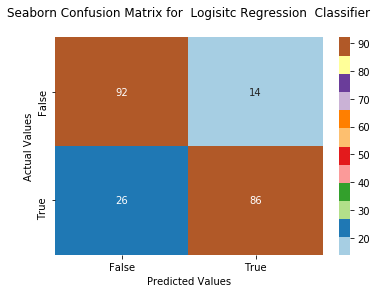



	Classification Report for Logisitc Regression  Classifier

              precision    recall  f1-score   support

           0      0.780     0.868     0.821       106
           1      0.860     0.768     0.811       112

    accuracy                          0.817       218
   macro avg      0.820     0.818     0.816       218
weighted avg      0.821     0.817     0.816       218




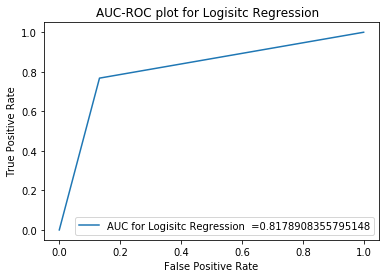



----------------Confusion Matrix for Naive Bayes Classifier--------------------


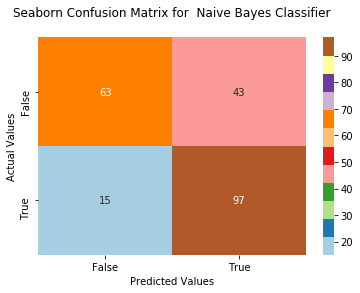



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.808     0.594     0.685       106
           1      0.693     0.866     0.770       112

    accuracy                          0.734       218
   macro avg      0.750     0.730     0.727       218
weighted avg      0.749     0.734     0.728       218




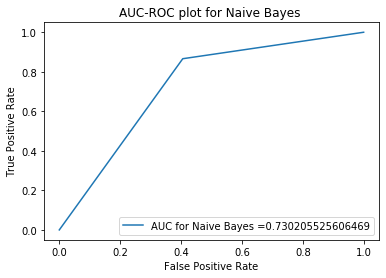



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


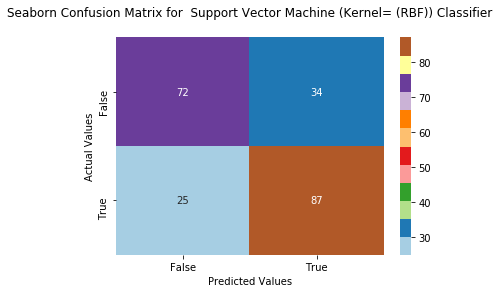



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.742     0.679     0.709       106
           1      0.719     0.777     0.747       112

    accuracy                          0.729       218
   macro avg      0.731     0.728     0.728       218
weighted avg      0.730     0.729     0.729       218




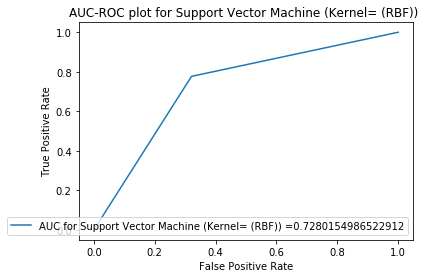



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


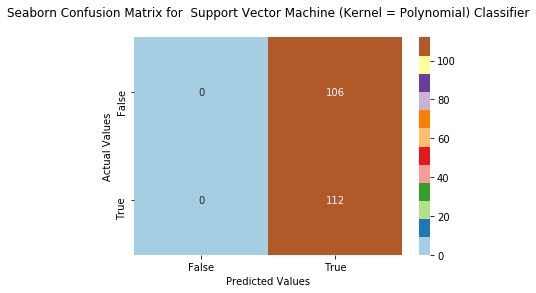



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.000     0.000     0.000       106
           1      0.514     1.000     0.679       112

    accuracy                          0.514       218
   macro avg      0.257     0.500     0.339       218
weighted avg      0.264     0.514     0.349       218




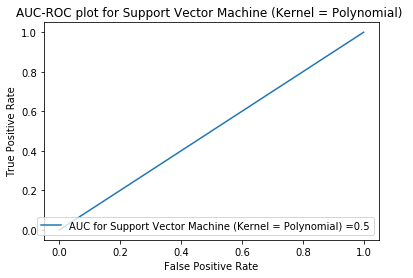



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


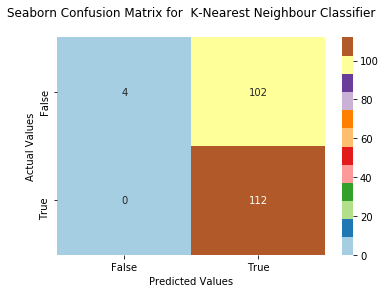



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      1.000     0.038     0.073       106
           1      0.523     1.000     0.687       112

    accuracy                          0.532       218
   macro avg      0.762     0.519     0.380       218
weighted avg      0.755     0.532     0.388       218




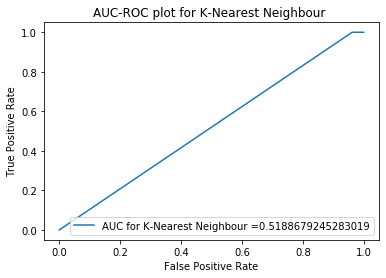



----------------Confusion Matrix for Decision Tree Classifier--------------------


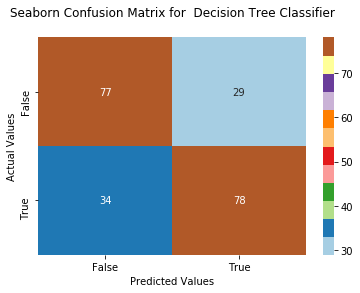



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.694     0.726     0.710       106
           1      0.729     0.696     0.712       112

    accuracy                          0.711       218
   macro avg      0.711     0.711     0.711       218
weighted avg      0.712     0.711     0.711       218




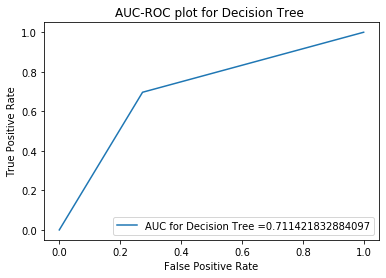



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


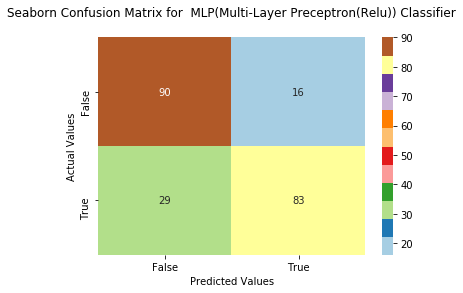



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.756     0.849     0.800       106
           1      0.838     0.741     0.787       112

    accuracy                          0.794       218
   macro avg      0.797     0.795     0.793       218
weighted avg      0.798     0.794     0.793       218




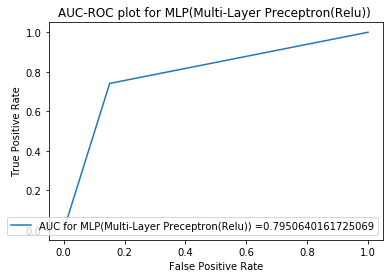



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


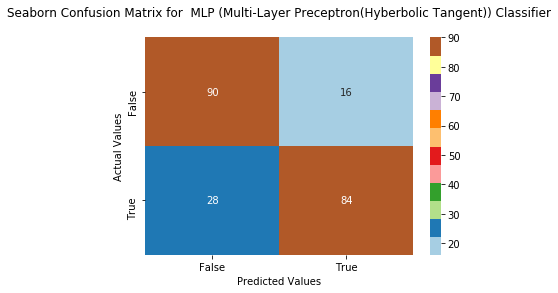



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.763     0.849     0.804       106
           1      0.840     0.750     0.792       112

    accuracy                          0.798       218
   macro avg      0.801     0.800     0.798       218
weighted avg      0.802     0.798     0.798       218




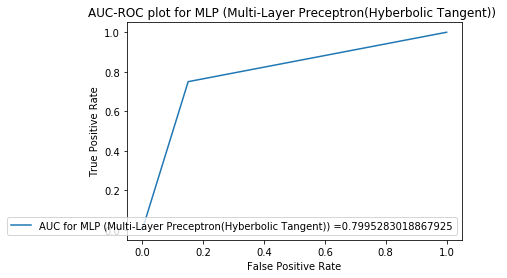



----------------Confusion Matrix for Perceptron Classifier--------------------


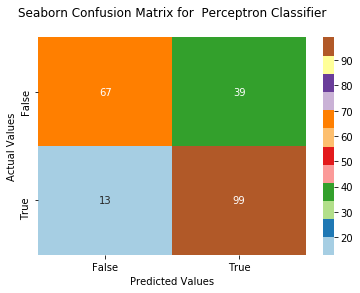



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.838     0.632     0.720       106
           1      0.717     0.884     0.792       112

    accuracy                          0.761       218
   macro avg      0.777     0.758     0.756       218
weighted avg      0.776     0.761     0.757       218




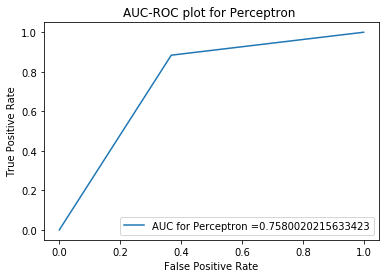

In [174]:
model_names = ["Logisitc Regression ", "Naive Bayes", "Support Vector Machine (Kernel= (RBF))",
               "Support Vector Machine (Kernel = Polynomial)","K-Nearest Neighbour","Decision Tree",
                "MLP(Multi-Layer Preceptron(Relu))", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))","Perceptron"
              ]

count = 0
for model in tf_idf_models:
    performPrediction(model, X_test_tf, y_test_tf, "Paired", model_names[count])
    count += 1

### 7ag. Test and Train data using ConvoKit

In [175]:
# Spilt data
train_convos, test_convos = train_test_split(list(wiki_corpus_binary.iter_utterances())
                                                  , test_size=0.1, shuffle=False)


# Iterate over utterances using their corresponding id's and mark them as train and test
for utt in train_convos:
    utt.meta['train_test_type'] = 'train'
    
for utt in test_convos:
    utt.meta['train_test_type'] = 'test'

# Fit the model with training set labels only. Using a lambda function filter such training samples    
tf_idf_vect_clf.fit(wiki_corpus_binary, selector=lambda utt: utt.meta['train_test_type'] == 'train')

#Using a lambda function predict the outcome variable for only test set   
tf_idf_vect_clf.transform(wiki_corpus_binary, selector=lambda utt: utt.meta['train_test_type'] == 'test')

# Print classification report
print("*********************** Classification Report (Standard Logisitic Regression)*************************")
print(tf_idf_vect_clf.classification_report(wiki_corpus_binary, 
                                            selector=lambda utt: utt.meta['train_test_type'] == 'test'))


*********************** Classification Report (Standard Logisitic Regression)*************************
              precision    recall  f1-score   support

       False       0.84      0.79      0.82       106
        True       0.81      0.86      0.83       112

    accuracy                           0.83       218
   macro avg       0.83      0.82      0.83       218
weighted avg       0.83      0.83      0.83       218



In [176]:
tf_idf_vect_clf_mb.fit(wiki_corpus_binary, selector=lambda utt: utt.meta['train_test_type'] == 'train')
tf_idf_vect_clf_mb.transform(wiki_corpus_binary, selector=lambda utt: utt.meta['train_test_type'] == 'test')
print("*********************** Classification Report (Naive Bayes)*************************")
print(tf_idf_vect_clf_mb.classification_report(wiki_corpus_binary, 
                                            selector=lambda utt: utt.meta['train_test_type'] == 'test'))


*********************** Classification Report (Naive Bayes)*************************
              precision    recall  f1-score   support

       False       0.81      0.59      0.68       106
        True       0.69      0.87      0.77       112

    accuracy                           0.73       218
   macro avg       0.75      0.73      0.73       218
weighted avg       0.75      0.73      0.73       218



In [177]:
tf_idf_vect_clf_dt.fit(wiki_corpus_binary, selector=lambda utt: utt.meta['train_test_type'] == 'train')
tf_idf_vect_clf_dt.transform(wiki_corpus_binary, selector=lambda utt: utt.meta['train_test_type'] == 'test')

print(tf_idf_vect_clf_dt.classification_report(wiki_corpus_binary, 
                                            selector=lambda utt: utt.meta['train_test_type'] == 'test'))


              precision    recall  f1-score   support

       False       0.69      0.73      0.71       106
        True       0.73      0.69      0.71       112

    accuracy                           0.71       218
   macro avg       0.71      0.71      0.71       218
weighted avg       0.71      0.71      0.71       218



 #### Summary Statistics

In [178]:
tf_idf_vect_clf.summarize(wiki_corpus_binary).head(5)

prediction  pred_score
id                           
620707       True         1.0
62454        True         1.0
153143       True         1.0
201933       True         1.0
486441       True         1.0

In [179]:
tf_idf_vect_clf_mb.summarize(wiki_corpus_binary).head(5)

prediction  pred_score
id                           
620707       True         1.0
62454        True         1.0
153143       True         1.0
201933       True         1.0
486441       True         1.0

In [180]:
tf_idf_vect_clf_dt.summarize(wiki_corpus_binary).head(10)

prediction  pred_score
id                           
620707       True         1.0
62454        True         1.0
153143       True         1.0
201933       True         1.0
486441       True         1.0
628941       True         1.0
203996       True         1.0
556495       True         1.0
600849       True         1.0
439715       True         1.0

## 7b.  TF-IDF using Stack Exchange Corpus

To print run TF-IDF on Stack Exchange run the following function. This function uses inbuilt ConvoKit Vector Classifier which takes vector as input and by default runs Standard Logistic Regression Classifier which can changed to run different classifiers by altering the parameters. However the function uses extremely slow . If cross Validation scores are not required simply use the next function instead i.e. stackExchangeTFIDF(). All the metrics are the same irrespective of the method used

In [183]:
def stackTFIDFVectoriConvo():
    
    from convokit import TextParser, PolitenessStrategies
    from convokit.expected_context_framework import ColNormedTfidfTransformer
    
    # Call both Text Parser and Politeness Strategies Tranformer
    parser = TextParser(verbosity = 3000)
    ps = PolitenessStrategies()
    
    #Load corpus and filter out utterances with class label of 0
    _corpus = Corpus(download("stack-exchange-politeness-corpus"))
    _corpus_binary = Corpus(utterances = [utt for utt in _corpus.iter_utterances() if utt.meta['Binary']!= 0 ])

    # tranform the corpus using the transformers
    _corpus_binary = parser.transform(_corpus_binary)
    _corpus_binary = ps.transform(_corpus_binary, markers = True)

    df_binary      = _corpus_binary.get_utterances_dataframe()
    display(df_binary.head())
    
    # Use tf-idf transformer to convert utterance text to numeric data using term frequency and inverse frequency
    # in a document
    td_idf = ColNormedTfidfTransformer(input_field = 'text', output_field='col_normed_tfidf', model=None )
    
    td_idf.fit_transform(_corpus_binary)
    
    # Extract the matrix produced by tf-idf tranformer
    td_idf_vector = _corpus_binary.get_vector_matrix('col_normed_tfidf').to_dataframe()
    display(td_idf_vector.head()) 

    model_names = ["Logisitc Regression ", "Naive Bayes", "Support Vector Machine (Kernel= (RBF))",
               "Support Vector Machine (Kernel = Polynomial)","K-Nearest Neighbour","Decision Tree",
                "MLP(Multi-Layer Preceptron(Relu))", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))","Perceptron"]
    
    # Use ML/DL classifiers
    lr_clf        =  LogisticRegression()
    mb_clf        =  MultinomialNB()
    svm_clf_rbf   =  SVC(kernel = 'rbf', probability= True)
    svm_clf_poly  =  SVC(kernel = 'poly',probability= True )
    knn_clf       =  KNeighborsClassifier(n_neighbors = 3, weights='uniform', 
                                          metric='minkowski')
    dtree_clf     =  DecisionTreeClassifier(criterion ="entropy")
    mlp_clf_relu  =  MLPClassifier(hidden_layer_sizes=(30,30), max_iter = 1000, 
                             activation='relu', random_state = 21)
    mlp_clf_tanh  =  MLPClassifier(hidden_layer_sizes=(30,30), max_iter = 1000, 
                             activation='tanh', random_state = 22)
#     precp_clf     =  Perceptron()
    
    clf_models = [lr_clf, mb_clf , svm_clf_rbf, svm_clf_poly, knn_clf, dtree_clf, mlp_clf_relu, mlp_clf_tanh]
    
    
    # Call the vector classifier of ConvoKit frame work 
    tf_idf_vect_clf_std     = VectorClassifier(obj_type="utterance", vector_name='col_normed_tfidf',
                                     labeller=lambda utt: utt.meta['Binary'] == 1)
    
    mytf_idf_lst= []
    
    # Call Vector Classifier for all the models. Using a loop instead, create model object and store it in a list 
    
    for models in clf_models:
        tf_idf_vect_clf = VectorClassifier(obj_type="utterance", vector_name='col_normed_tfidf', clf = models,
                                     labeller=lambda utt: utt.meta['Binary'] == 1)
        mytf_idf_lst.append(tf_idf_vect_clf)
        
    score_list = list() 

    score_std = tf_idf_vect_clf_std.evaluate_with_cv(_corpus_binary) 
    
    # Calculate CV scores for all of the  models

    for i in mytf_idf_lst:
        score_ = np.mean(i.evaluate_with_cv(_corpus_binary))
        score_list.append(score_)

    score_list.insert(0,np.mean(score_std))   

    frame = pd.DataFrame({ 'Cross Validation Mean score ': score_list}, index = model_names)
    display(frame)
    
    
    # As done earlier split the data into training and testing test using utterance ids
    train_convos, test_convos = train_test_split(list(_corpus_binary.iter_utterances())
                                                  , test_size=0.1, shuffle=False)
    for utt in train_convos:
        utt.meta['train_test_type'] = 'train'
        
        
    for utt in test_convos:
        utt.meta['train_test_type'] = 'test'
    
    tf_idf_vect_clf_std.fit(_corpus_binary, selector=lambda utt: utt.meta['train_test_type'] == 'train')
    tf_idf_vect_clf_std.transform(_corpus_binary, selector=lambda utt: utt.meta['train_test_type'] == 'test')


    print("Classification Report for Standard Logistic Regression ")
    print(tf_idf_vect_clf_std.classification_report(_corpus_binary, 
                                            selector=lambda utt: utt.meta['train_test_type'] == 'test'))
    
    # Print classification report for all the models generated and stored in a list
    for i , model in enumerate(mytf_idf_lst):
        model.fit(_corpus_binary, selector=lambda utt: utt.meta['train_test_type'] == 'train')
        model.transform(_corpus_binary, selector=lambda utt: utt.meta['train_test_type'] == 'test')
        name = model_names[i]
        print(model)
        print(f"*******************Classification Report for {name}*********************************")
        print(model.classification_report(_corpus_binary, selector=lambda utt: utt.meta['train_test_type'] == 'test'))


In [184]:
stackTFIDFVectoriConvo()

Dataset already exists at C:\Users\pulki\.convokit\downloads\stack-exchange-politeness-corpus
3000/3302 utterances processed
3302/3302 utterances processed


timestamp                                               text speaker  \
id                                                                            
4   NOT_RECORDED              Is `A` a global variable?  What is x?    user   
5   NOT_RECORDED  This is a very confusing question!  How are yo...    user   
6   NOT_RECORDED  Why not using `isnan()` from math.h? Any speci...    user   
9   NOT_RECORDED  Does your project involve some graphical user ...    user   
11  NOT_RECORDED  Usually compilers should generate a good code ...    user   

   reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                              
4      None               4              0.508284           1   
5      None               5             -0.393623          -1   
6      None               6             -0.689701          -1   
9      None               9              0.519398           1   
11     None              11              0.631237           1   

                                     meta.Annotations  \
id                                                      
4   {'A3OW54MEVDKXJL': 17, 'A2RDZ580VXUO1X': 18, '...   
5   {'A2WKPCZU4U110T': 16, 'A1BS64O3JY0YJ4': 14, '...   
6   {'AL97SCCNKZILP': 7, 'A3E157ZN8XPUKJ': 20, 'A2...   
9   {'A2UFD1I8ZO1V4G': 17, 'A3MMLCBV2W3BP9': 13, '...   
11  {'A2TMSM19YCEXLE': 20, 'A28TXBSZPWMEU9': 15, '...   

                                          meta.parsed  \
id                                                      
4   [{'rt': 0, 'toks': [{'tok': 'is', 'tag': 'VBZ'...   
5   [{'rt': 1, 'toks': [{'tok': 'this', 'tag': 'DT...   
6   [{'rt': 2, 'toks': [{'tok': 'why', 'tag': 'WRB...   
9   [{'rt': 3, 'toks': [{'tok': 'does', 'tag': 'VB...   
11  [{'rt': 3, 'toks': [{'tok': 'usually', 'tag': ...   

                           meta.politeness_strategies  \
id                                                      
4   {'feature_politeness_==Please==': 0, 'feature_...   
5   {'feature_politeness_==Please==': 0, 'feature_...   
6   {'feature_politeness_==Please==': 0, 'feature_...   
9   {'feature_politeness_==Please==': 0, 'feature_...   
11  {'feature_politeness_==Please==': 0, 'feature_...   

                              meta.politeness_markers vectors  
id                                                             
4   {'politeness_markers_==Please==': [], 'politen...      []  
5   {'politeness_markers_==Please==': [], 'politen...      []  
6   {'politeness_markers_==Please==': [], 'politen...      []  
9   {'politeness_markers_==Please==': [], 'politen...      []  
11  {'politeness_markers_==Please==': [], 'politen...      []

!   !!   !=    "   ""  ""this  "$thing->edit  "(pseudo)  "*i  "+1"  ...  \
4   0.0  0.0  0.0  0.0  0.0     0.0            0.0        0.0  0.0   0.0  ...   
5   0.0  0.0  0.0  0.0  0.0     0.0            0.0        0.0  0.0   0.0  ...   
6   0.0  0.0  0.0  0.0  0.0     0.0            0.0        0.0  0.0   0.0  ...   
9   0.0  0.0  0.0  0.0  0.0     0.0            0.0        0.0  0.0   0.0  ...   
11  0.0  0.0  0.0  0.0  0.0     0.0            0.0        0.0  0.0   0.0  ...   

    μf,    —  “blog”?  “good”  “ie6  “k-cnf”  “section”  “synchronize  ℽℼℾℿ  \
4   0.0  0.0      0.0     0.0   0.0      0.0        0.0           0.0   0.0   
5   0.0  0.0      0.0     0.0   0.0      0.0        0.0           0.0   0.0   
6   0.0  0.0      0.0     0.0   0.0      0.0        0.0           0.0   0.0   
9   0.0  0.0      0.0     0.0   0.0      0.0        0.0           0.0   0.0   
11  0.0  0.0      0.0     0.0   0.0      0.0        0.0           0.0   0.0   

      か  
4   0.0  
5   0.0  
6   0.0  
9   0.0  
11  0.0  

[5 rows x 12405 columns]

Initialized default classification model (standard scaled logistic regression).
Running a cross-validated evaluation...Done.
Running a cross-validated evaluation...Done.
Running a cross-validated evaluation...Done.
Running a cross-validated evaluation...Done.
Running a cross-validated evaluation...Done.
Running a cross-validated evaluation...Done.
Running a cross-validated evaluation...Done.
Running a cross-validated evaluation...Done.
Running a cross-validated evaluation...Done.


Cross Validation Mean score 
Logisitc Regression                                                   0.594489
Naive Bayes                                                           0.606306
Support Vector Machine (Kernel= (RBF))                                0.570564
Support Vector Machine (Kernel = Polynomial)                          0.553598
K-Nearest Neighbour                                                   0.502103
Decision Tree                                                         0.503640
MLP(Multi-Layer Preceptron(Relu))                                     0.558448
MLP (Multi-Layer Preceptron(Hyberbolic Tangent))                      0.588748
Perceptron                                                            0.586320

Classification Report for Standard Logistic Regression 
              precision    recall  f1-score   support

       False       0.56      0.55      0.56       159
        True       0.59      0.61      0.60       172

    accuracy                           0.58       331
   macro avg       0.58      0.58      0.58       331
weighted avg       0.58      0.58      0.58       331

*******************Classification Report for Logisitc Regression *********************************
              precision    recall  f1-score   support

       False       0.53      0.65      0.59       159
        True       0.59      0.47      0.52       172

    accuracy                           0.56       331
   macro avg       0.56      0.56      0.55       331
weighted avg       0.56      0.56      0.55       331

*******************Classification Report for Naive Bayes*********************************
              precision    recall  f1-score   support

       False       0.50      0.57      0.53   

In [185]:
def stackExchangeTFIDF():
    
    from convokit import TextParser, PolitenessStrategies
    from convokit.expected_context_framework import ColNormedTfidfTransformer
    
    # Call both Text Parser and Politeness Strategies Tranformer
    parser = TextParser(verbosity = 3000)
    ps = PolitenessStrategies()
    
    #Load corpus and filter out utterances with class label of 0
    _corpus = Corpus(download("stack-exchange-politeness-corpus"))
    _corpus_binary = Corpus(utterances = [utt for utt in _corpus.iter_utterances() if utt.meta['Binary']!= 0 ])

    # tranform the corpus using the transformers
    _corpus_binary = parser.transform(_corpus_binary)
    _corpus_binary = ps.transform(_corpus_binary, markers = True)

    df_binary      =  _corpus_binary.get_utterances_dataframe()
    display(df_binary.head())
    
    # Use tf-idf transformer to convert utterance text to numeric data using term frequency and inverse frequency
    # in a document
    td_idf = ColNormedTfidfTransformer(input_field = 'text', output_field='col_normed_tfidf', model=None )
    
    td_idf.fit_transform(_corpus_binary)
    
    # Extract the matrix produced by tf-idf tranformer. Remap 0:ImPolite 1:Polite instead of -1 and 1 respectively
    td_idf_vector  = _corpus_binary.get_vector_matrix('col_normed_tfidf').to_dataframe()
    binary_        =  df_binary['meta.Binary'].astype("category")
    changedicti_   =  {-1 : 0 , 1 : 1 }
    binary_.replace(changedicti_ , inplace = True)
    display(td_idf_vector.head()) 

    model_names = ["Logisitc Regression ", "Naive Bayes", "Support Vector Machine (Kernel= (RBF))",
               "Support Vector Machine (Kernel = Polynomial)","K-Nearest Neighbour","Decision Tree",
                "MLP(Multi-Layer Preceptron(Relu))", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))","Perceptron"]
    

    lr_clf        =  LogisticRegression()
    mb_clf        =  MultinomialNB()
    svm_clf_rbf   =  SVC(kernel = 'rbf', probability= True)
    svm_clf_poly  =  SVC(kernel = 'poly', probability= True )
    knn_clf       =  KNeighborsClassifier(n_neighbors = 3, weights='uniform', 
                                          metric='minkowski')
    dtree_clf     =  DecisionTreeClassifier(criterion ="entropy")
    mlp_clf_relu  =  MLPClassifier(hidden_layer_sizes=(30,30), max_iter = 1000, 
                             activation='relu', random_state = 21)
    mlp_clf_tanh  =  MLPClassifier(hidden_layer_sizes=(30,30), max_iter = 1000, 
                             activation='tanh', random_state = 22)
    precp_clf     =  Perceptron()
    
    clf_models = [mb_clf , svm_clf_rbf, svm_clf_poly, knn_clf, dtree_clf, mlp_clf_relu, mlp_clf_tanh, precp_clf]
    
    
    # Split data using spilt_data() defined above
    X_train_tf, X_test_tf, y_train_tf, y_test_tf = split_data(pd.concat([td_idf_vector, binary_],axis=1), 
                                                              0.90, pd.concat([td_idf_vector,binary_],axis=1).shape)
    #Fit models
    tf_idf_models = generateModels(X_train_tf,y_train_tf)
    
    count = 0
    
    for model in tf_idf_models:
        performPrediction(model, X_test_tf, y_test_tf, "Paired", model_names[count])
        count += 1

Dataset already exists at C:\Users\pulki\.convokit\downloads\stack-exchange-politeness-corpus
3000/3302 utterances processed
3302/3302 utterances processed


timestamp                                               text speaker  \
id                                                                            
4   NOT_RECORDED              Is `A` a global variable?  What is x?    user   
5   NOT_RECORDED  This is a very confusing question!  How are yo...    user   
6   NOT_RECORDED  Why not using `isnan()` from math.h? Any speci...    user   
9   NOT_RECORDED  Does your project involve some graphical user ...    user   
11  NOT_RECORDED  Usually compilers should generate a good code ...    user   

   reply_to conversation_id meta.Normalized Score meta.Binary  \
id                                                              
4      None               4              0.508284           1   
5      None               5             -0.393623          -1   
6      None               6             -0.689701          -1   
9      None               9              0.519398           1   
11     None              11              0.631237           1   

                                     meta.Annotations  \
id                                                      
4   {'A3OW54MEVDKXJL': 17, 'A2RDZ580VXUO1X': 18, '...   
5   {'A2WKPCZU4U110T': 16, 'A1BS64O3JY0YJ4': 14, '...   
6   {'AL97SCCNKZILP': 7, 'A3E157ZN8XPUKJ': 20, 'A2...   
9   {'A2UFD1I8ZO1V4G': 17, 'A3MMLCBV2W3BP9': 13, '...   
11  {'A2TMSM19YCEXLE': 20, 'A28TXBSZPWMEU9': 15, '...   

                                          meta.parsed  \
id                                                      
4   [{'rt': 0, 'toks': [{'tok': 'is', 'tag': 'VBZ'...   
5   [{'rt': 1, 'toks': [{'tok': 'this', 'tag': 'DT...   
6   [{'rt': 2, 'toks': [{'tok': 'why', 'tag': 'WRB...   
9   [{'rt': 3, 'toks': [{'tok': 'does', 'tag': 'VB...   
11  [{'rt': 3, 'toks': [{'tok': 'usually', 'tag': ...   

                           meta.politeness_strategies  \
id                                                      
4   {'feature_politeness_==Please==': 0, 'feature_...   
5   {'feature_politeness_==Please==': 0, 'feature_...   
6   {'feature_politeness_==Please==': 0, 'feature_...   
9   {'feature_politeness_==Please==': 0, 'feature_...   
11  {'feature_politeness_==Please==': 0, 'feature_...   

                              meta.politeness_markers vectors  
id                                                             
4   {'politeness_markers_==Please==': [], 'politen...      []  
5   {'politeness_markers_==Please==': [], 'politen...      []  
6   {'politeness_markers_==Please==': [], 'politen...      []  
9   {'politeness_markers_==Please==': [], 'politen...      []  
11  {'politeness_markers_==Please==': [], 'politen...      []

!   !!   !=    "   ""  ""this  "$thing->edit  "(pseudo)  "*i  "+1"  ...  \
4   0.0  0.0  0.0  0.0  0.0     0.0            0.0        0.0  0.0   0.0  ...   
5   0.0  0.0  0.0  0.0  0.0     0.0            0.0        0.0  0.0   0.0  ...   
6   0.0  0.0  0.0  0.0  0.0     0.0            0.0        0.0  0.0   0.0  ...   
9   0.0  0.0  0.0  0.0  0.0     0.0            0.0        0.0  0.0   0.0  ...   
11  0.0  0.0  0.0  0.0  0.0     0.0            0.0        0.0  0.0   0.0  ...   

    μf,    —  “blog”?  “good”  “ie6  “k-cnf”  “section”  “synchronize  ℽℼℾℿ  \
4   0.0  0.0      0.0     0.0   0.0      0.0        0.0           0.0   0.0   
5   0.0  0.0      0.0     0.0   0.0      0.0        0.0           0.0   0.0   
6   0.0  0.0      0.0     0.0   0.0      0.0        0.0           0.0   0.0   
9   0.0  0.0      0.0     0.0   0.0      0.0        0.0           0.0   0.0   
11  0.0  0.0      0.0     0.0   0.0      0.0        0.0           0.0   0.0   

      か  
4   0.0  
5   0.0  
6   0.0  
9   0.0  
11  0.0  

[5 rows x 12405 columns]



----------------Confusion Matrix for Logisitc Regression  Classifier--------------------


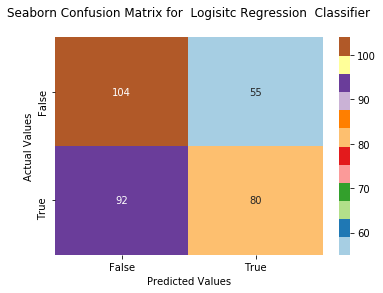



	Classification Report for Logisitc Regression  Classifier

              precision    recall  f1-score   support

           0      0.531     0.654     0.586       159
           1      0.593     0.465     0.521       172

    accuracy                          0.556       331
   macro avg      0.562     0.560     0.554       331
weighted avg      0.563     0.556     0.552       331




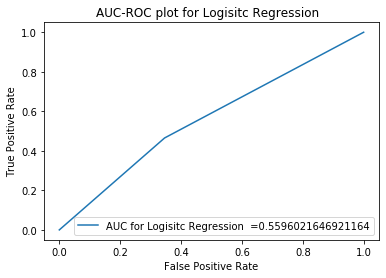



----------------Confusion Matrix for Naive Bayes Classifier--------------------


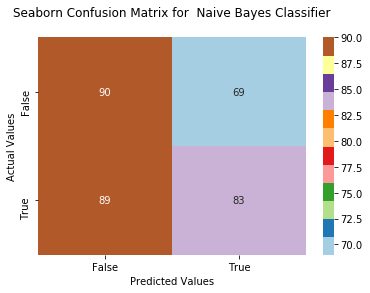



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.503     0.566     0.533       159
           1      0.546     0.483     0.512       172

    accuracy                          0.523       331
   macro avg      0.524     0.524     0.522       331
weighted avg      0.525     0.523     0.522       331




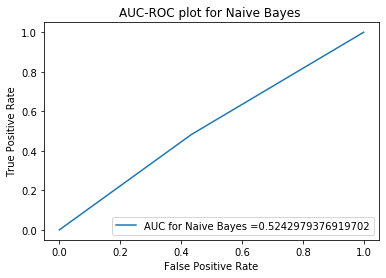



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


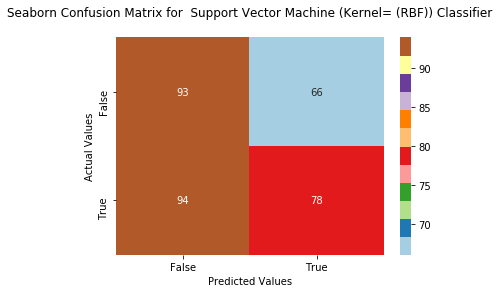



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.497     0.585     0.538       159
           1      0.542     0.453     0.494       172

    accuracy                          0.517       331
   macro avg      0.519     0.519     0.516       331
weighted avg      0.520     0.517     0.515       331




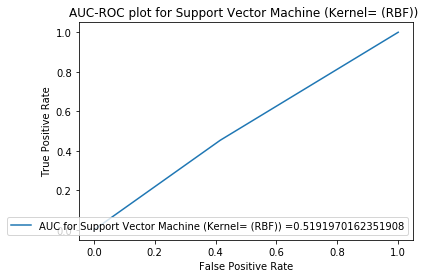



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


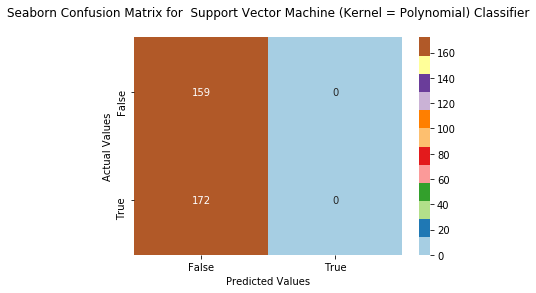



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.480     1.000     0.649       159
           1      0.000     0.000     0.000       172

    accuracy                          0.480       331
   macro avg      0.240     0.500     0.324       331
weighted avg      0.231     0.480     0.312       331




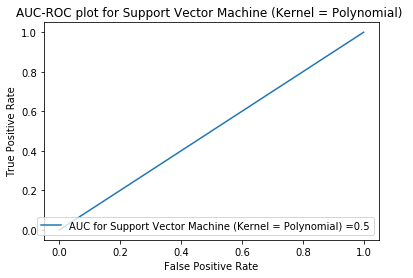



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


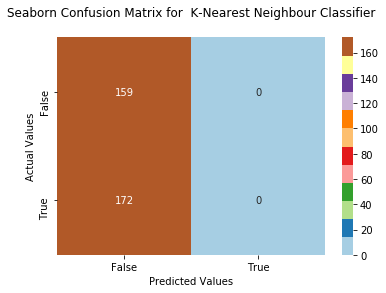



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      0.480     1.000     0.649       159
           1      0.000     0.000     0.000       172

    accuracy                          0.480       331
   macro avg      0.240     0.500     0.324       331
weighted avg      0.231     0.480     0.312       331




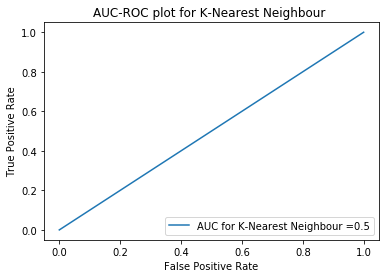



----------------Confusion Matrix for Decision Tree Classifier--------------------


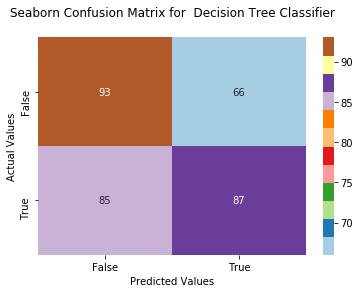



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.522     0.585     0.552       159
           1      0.569     0.506     0.535       172

    accuracy                          0.544       331
   macro avg      0.546     0.545     0.544       331
weighted avg      0.546     0.544     0.543       331




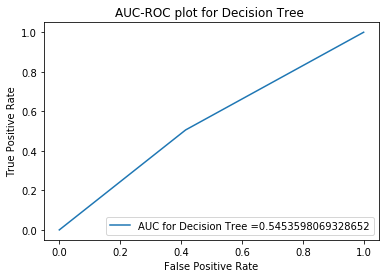



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


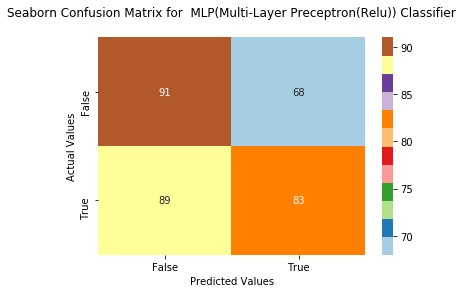



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.506     0.572     0.537       159
           1      0.550     0.483     0.514       172

    accuracy                          0.526       331
   macro avg      0.528     0.527     0.525       331
weighted avg      0.528     0.526     0.525       331




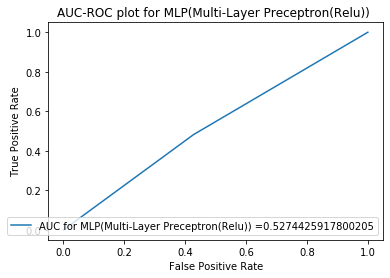



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


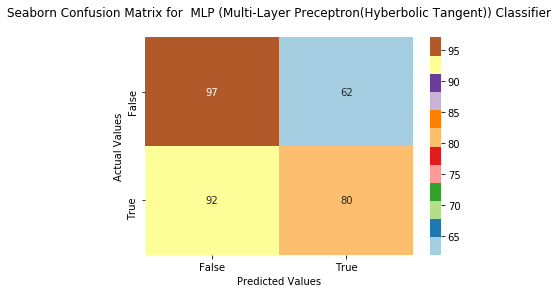



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.513     0.610     0.557       159
           1      0.563     0.465     0.510       172

    accuracy                          0.535       331
   macro avg      0.538     0.538     0.534       331
weighted avg      0.539     0.535     0.533       331




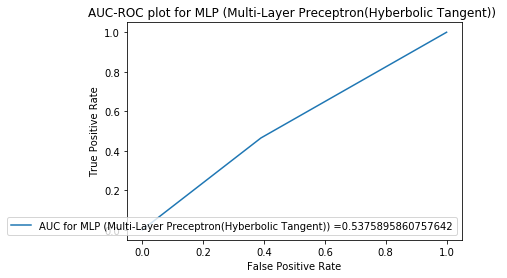



----------------Confusion Matrix for Perceptron Classifier--------------------


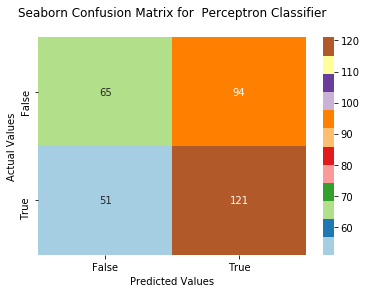



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.560     0.409     0.473       159
           1      0.563     0.703     0.625       172

    accuracy                          0.562       331
   macro avg      0.562     0.556     0.549       331
weighted avg      0.562     0.562     0.552       331




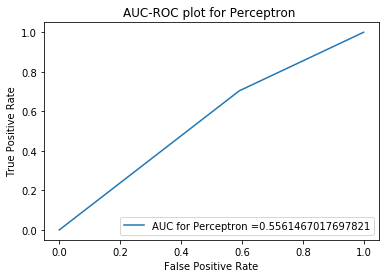

In [186]:
stackExchangeTFIDF()

# 8. Future Works for WIKI- TALK Pages Corpus

Using the above Linguistic Marker models for Wikipedia we can annotate our Wiki Talk Corpus for being polite or not. As Wiki Talk Corpus contains 400,0000 utterances annotating each and every utterance is not possible .As mentioned in ('research paper') we can use Linguistic marker model  built on 2718 utterances to annotate the data. We can then combine 2718 utterances obtained from wiki with 3002 utterances and build a better model. However for this experiment Wiki Politeness Linguistic Marker Model will be used

## 8a. Semi Supervised Learning 

As we dont have gold standard labels available for our dataset Techniques such semi supervised learning in such scenrios. First predict the labels using Wikipedia Politeness Corpus. The use those labels as gold standard labels to built models on Wiki-Talk Corpus and evaluate performance. For this short demo only Naive Bayes classifier will be used to predict labels for utterance level information in Wiki - Talk Corpus

In [187]:
def load_wiki_corpus_full():
    
    from convokit import TextParser, PolitenessStrategies
    
    parser = TextParser(verbosity = 10000)
    ps = PolitenessStrategies()
    
    # As Corpus is huge use only first 50,000 utterances
    wiki_corpus = Corpus(download('wiki-corpus'), utterance_end_index = 50000)

    wiki_corpus= parser.transform(wiki_corpus)
    wiki_corpus = ps.transform(wiki_corpus, markers = True)

    df_wiki_ = wiki_corpus.get_utterances_dataframe()
    
    return wiki_corpus, df_wiki_

In [188]:
wiki_full , df_wiki_utt = load_wiki_corpus_full()

10000/50001 utterances processed
20000/50001 utterances processed
30000/50001 utterances processed
40000/50001 utterances processed
50000/50001 utterances processed
50001/50001 utterances processed


In [189]:
df_wiki_utt[0:3]

timestamp                                               text  \
id                                                                          
524288  1.189190940E09  You should look at all of the point on the tem...   
524289  1.189204860E09  Yes I agree. The law permits usage of document...   
1       1.310744280E09  Yes, that's good. Revathy's page looked very r...   

            speaker reply_to conversation_id meta.is-admin  \
id                                                           
524288    Frightner     None          524288         False   
524289  Revizionist     None          524288         False   
1       Johannes003     None               1         False   

                                              meta.parsed  \
id                                                          
524288  [{'rt': 20, 'toks': [{'tok': 'you', 'tag': 'PR...   
524289  [{'rt': 2, 'toks': [{'tok': 'yes', 'tag': 'UH'...   
1       [{'rt': 3, 'toks': [{'tok': 'yes', 'tag': 'UH'...   

                               meta.politeness_strategies  \
id                                                          
524288  {'feature_politeness_==Please==': 0, 'feature_...   
524289  {'feature_politeness_==Please==': 0, 'feature_...   
1       {'feature_politeness_==Please==': 0, 'feature_...   

                                  meta.politeness_markers vectors  
id                                                                 
524288  {'politeness_markers_==Please==': [], 'politen...      []  
524289  {'politeness_markers_==Please==': [], 'politen...      []  
1       {'politeness_markers_==Please==': [], 'politen...      []

### Speaker level Information Wiki Talk Corpus ###

In [235]:
wiki_full.get_speakers_dataframe()

vectors meta.is-admin meta.edit-count  \
id                                                     
Frightner           []         False            1322   
Revizionist         []         False            1716   
Johannes003         []         False            8283   
Michael-Billa       []         False             396   
AnonEMouse          []          True           13150   
...                ...           ...             ...   
{unknown-1133}      []         False         unknown   
Kelly Martin        []          True           17726   
Cretanpride         []         False             192   
CaveatLector        []         False            2196   
Huntster            []          True           27608   

                                                       meta.coord  
id                                                                 
Frightner                                                     NaN  
Revizionist                                                   NaN  
Johannes003                                                   NaN  
Michael-Billa                                                 NaN  
AnonEMouse      {'Kwork': {'article': 0.0, 'auxverb': 0.0, 'co...  
...                                                           ...  
{unknown-1133}                                                NaN  
Kelly Martin                                                  NaN  
Cretanpride                                                   NaN  
CaveatLector                                                  NaN  
Huntster                                                      NaN  

[9331 rows x 4 columns]

### Build Linguistic Marker model with 21 features

In [190]:
utterance_ids = wiki_full.get_utterance_ids()

rows = list()

for ids in utterance_ids:
    rows.append(wiki_full.get_utterance(ids).meta['politeness_strategies'])
    
_wiki_features = pd.DataFrame(rows, index = utterance_ids) 

In [191]:
_wiki_features

feature_politeness_==Please==  feature_politeness_==Please_start==  \
524288                              0                                    0   
524289                              0                                    0   
1                                   0                                    0   
2                                   0                                    0   
3                                   0                                    0   
...                               ...                                  ...   
266783                              0                                    0   
552089                              0                                    0   
552090                              0                                    0   
289946                              0                                    0   
289947                              0                                    0   

        feature_politeness_==HASHEDGE==  \
524288                                1   
524289                                0   
1                                     0   
2                                     1   
3                                     1   
...                                 ...   
266783                                1   
552089                                1   
552090                                0   
289946                                1   
289947                                0   

        feature_politeness_==Indirect_(btw)==  feature_politeness_==Hedges==  \
524288                                      0                              0   
524289                                      0                              0   
1                                           0                              0   
2                                           0                              1   
3                                           0                              1   
...                                       ...                            ...   
266783                                      0                              1   
552089                                      0                              1   
552090                                      0                              0   
289946                                      0                              1   
289947                                      0                              0   

        feature_politeness_==Factuality==  feature_politeness_==Deference==  \
524288                                  1                                 0   
524289                                  0                                 0   
1                                       0                                 0   
2                                       0                                 0   
3                                       1                                 0   
...                                   ...                               ...   
266783                                  0                                 0   
552089                                  0                                 0   
552090                                  0                                 0   
289946                                  0                                 0   
289947                                  0                                 0   

        feature_politeness_==Gratitude==  feature_politeness_==Apologizing==  \
524288                                 0                                   0   
524289                                 0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
...                                  ...                                 ...   
266783                                 0                                   0   
5520

Predict the gold standard labels

In [192]:
gold_labels = mb_clf.predict(_wiki_features)

In [193]:
gold_labl_series = pd.Series(gold_labels , index = utterance_ids, name = 'meta.Binary')

In [194]:
# get value counts for each class labels

gold_labl_series.value_counts()

1    40137
0     9864
Name: meta.Binary, dtype: int64

In [196]:
df_  = pd.concat([_wiki_features, gold_labl_series] , axis = 1)

In [197]:
df_

feature_politeness_==Please==  feature_politeness_==Please_start==  \
524288                              0                                    0   
524289                              0                                    0   
1                                   0                                    0   
2                                   0                                    0   
3                                   0                                    0   
...                               ...                                  ...   
266783                              0                                    0   
552089                              0                                    0   
552090                              0                                    0   
289946                              0                                    0   
289947                              0                                    0   

        feature_politeness_==HASHEDGE==  \
524288                                1   
524289                                0   
1                                     0   
2                                     1   
3                                     1   
...                                 ...   
266783                                1   
552089                                1   
552090                                0   
289946                                1   
289947                                0   

        feature_politeness_==Indirect_(btw)==  feature_politeness_==Hedges==  \
524288                                      0                              0   
524289                                      0                              0   
1                                           0                              0   
2                                           0                              1   
3                                           0                              1   
...                                       ...                            ...   
266783                                      0                              1   
552089                                      0                              1   
552090                                      0                              0   
289946                                      0                              1   
289947                                      0                              0   

        feature_politeness_==Factuality==  feature_politeness_==Deference==  \
524288                                  1                                 0   
524289                                  0                                 0   
1                                       0                                 0   
2                                       0                                 0   
3                                       1                                 0   
...                                   ...                               ...   
266783                                  0                                 0   
552089                                  0                                 0   
552090                                  0                                 0   
289946                                  0                                 0   
289947                                  0                                 0   

        feature_politeness_==Gratitude==  feature_politeness_==Apologizing==  \
524288                                 0                                   0   
524289                                 0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
...                                  ...                                 ...   
266783                                 0                                   0   
5520

The information above shows that the for Polite class label we have 40137 and for Impolite class label we have 9864 observations. As the classed are not balanced with observations associated to Impolite Class account only for 20% the model will be a weak classifier. We will try to address this issue using SMOTE analysis . Refer [3]

In [236]:
(9864/(40137+9864))*100

19.72760544789104

In [238]:
(40137/(40137+9864))*100

80.27239455210896

In [239]:
9864/40137

0.24575827789819868

## 8b. Build Supervised Learning Models

Now use these to build a model and train various classifiers on it 

In [249]:
X_train_w, X_test_w, y_train_w, y_test_w = split_data(df_, 0.80, df_.shape)

In [250]:
models_ = generateModels(X_train_w, y_train_w)

In [251]:
def getClassifiStats(models , X_test, y_test):
    
    model_names = ["Logistic Regression ", "Naive Bayes", "Support Vector Machine (Kernel= (RBF))",
               "Support Vector Machine (Kernel = Polynomial)","K-Nearest Neighbour",
               "Decision Tree", "MLP(Multi-Layer Preceptron(Relu))", "MLP (Multi-Layer Preceptron(Hyberbolic Tangent))",
                "Perceptron"
              ]

    count = 0
    for i in models:
        performPrediction(i , X_test, y_test, "Paired", model_names[count])
        count += 1



----------------Confusion Matrix for Logistic Regression  Classifier--------------------


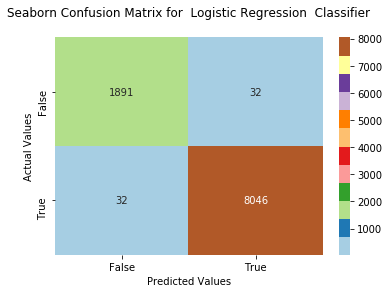



	Classification Report for Logistic Regression  Classifier

              precision    recall  f1-score   support

           0      0.983     0.983     0.983      1923
           1      0.996     0.996     0.996      8078

    accuracy                          0.994     10001
   macro avg      0.990     0.990     0.990     10001
weighted avg      0.994     0.994     0.994     10001




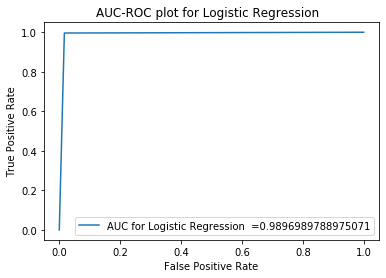



----------------Confusion Matrix for Naive Bayes Classifier--------------------


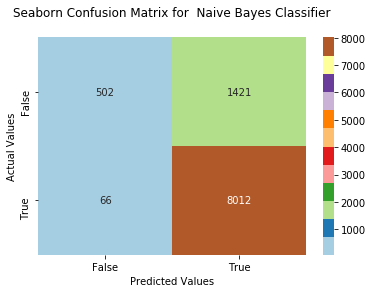



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.884     0.261     0.403      1923
           1      0.849     0.992     0.915      8078

    accuracy                          0.851     10001
   macro avg      0.867     0.626     0.659     10001
weighted avg      0.856     0.851     0.817     10001




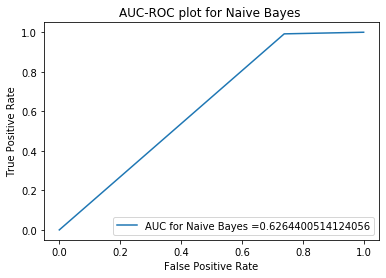



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


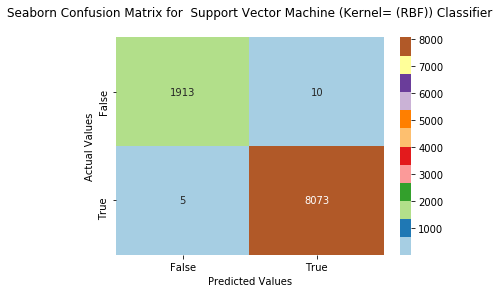



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.997     0.995     0.996      1923
           1      0.999     0.999     0.999      8078

    accuracy                          0.999     10001
   macro avg      0.998     0.997     0.998     10001
weighted avg      0.998     0.999     0.998     10001




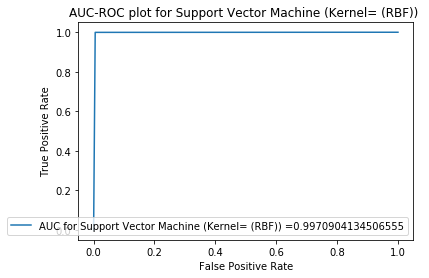



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


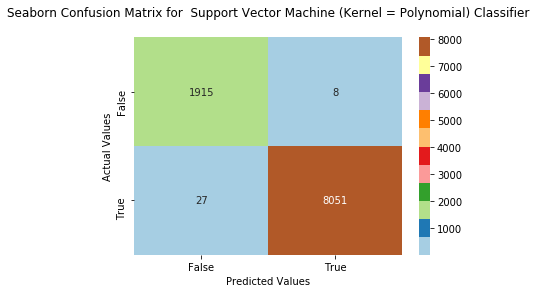



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.986     0.996     0.991      1923
           1      0.999     0.997     0.998      8078

    accuracy                          0.997     10001
   macro avg      0.993     0.996     0.994     10001
weighted avg      0.997     0.997     0.997     10001




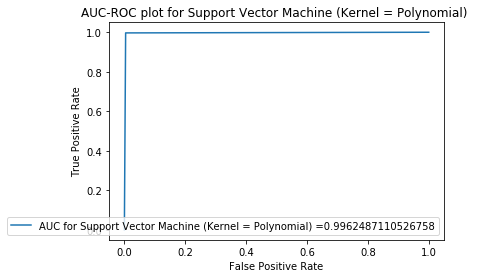



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


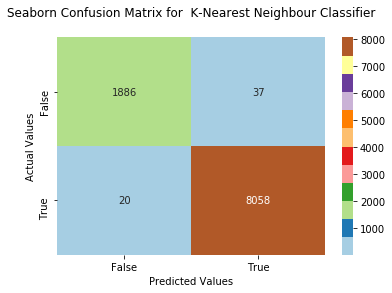



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      0.990     0.981     0.985      1923
           1      0.995     0.998     0.996      8078

    accuracy                          0.994     10001
   macro avg      0.992     0.989     0.991     10001
weighted avg      0.994     0.994     0.994     10001




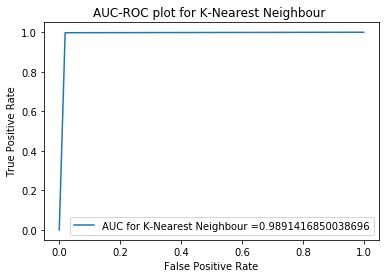



----------------Confusion Matrix for Decision Tree Classifier--------------------


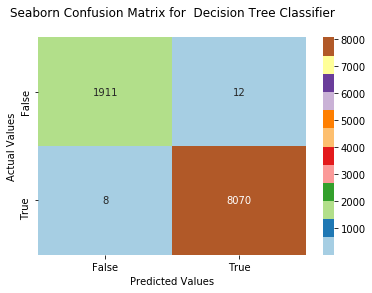



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.996     0.994     0.995      1923
           1      0.999     0.999     0.999      8078

    accuracy                          0.998     10001
   macro avg      0.997     0.996     0.997     10001
weighted avg      0.998     0.998     0.998     10001




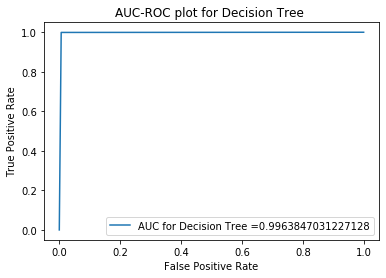



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


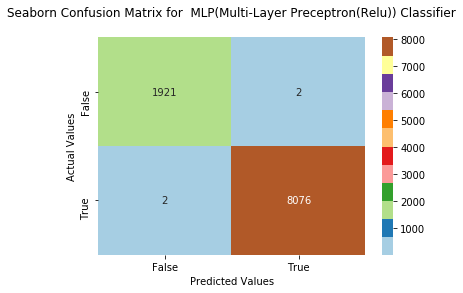



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      1923
           1      1.000     1.000     1.000      8078

    accuracy                          1.000     10001
   macro avg      0.999     0.999     0.999     10001
weighted avg      1.000     1.000     1.000     10001




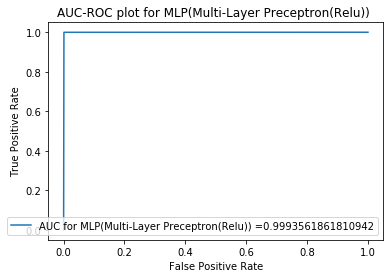



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


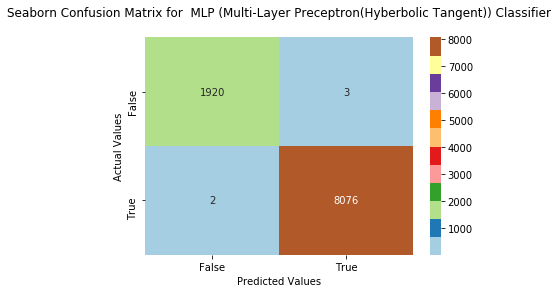



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.999     0.998     0.999      1923
           1      1.000     1.000     1.000      8078

    accuracy                          1.000     10001
   macro avg      0.999     0.999     0.999     10001
weighted avg      0.999     1.000     1.000     10001




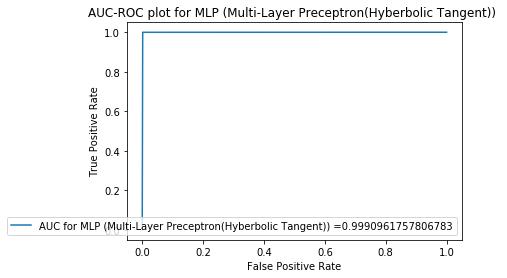



----------------Confusion Matrix for Perceptron Classifier--------------------


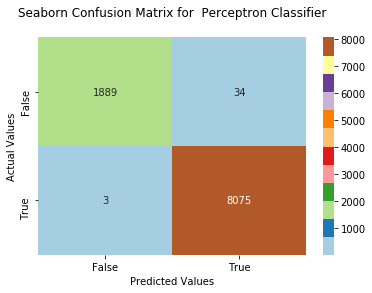



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.998     0.982     0.990      1923
           1      0.996     1.000     0.998      8078

    accuracy                          0.996     10001
   macro avg      0.997     0.991     0.994     10001
weighted avg      0.996     0.996     0.996     10001




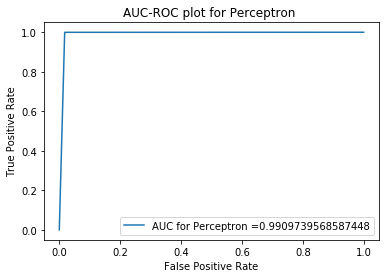

In [252]:
getClassifiStats(models_ , X_test_w, y_test_w)

### SMOTE Analysis

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. There are various variations of this technique. We however used the most basic version of it . For More information refer([3]) and 
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [202]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [253]:
print("Before OverSampling, counts of labels : {}".format(y_train_w.value_counts()))

Before OverSampling, counts of labels : meta.Binary
1              32059
0               7941
dtype: int64


In [254]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train_w, y_train_w)

print('Before OverSampling, the shape of train_X: {}'.format(X_train_w.shape))
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before OverSampling, the shape of train_X: (40000, 21)
After OverSampling, the shape of train_X: (64118, 21)
After OverSampling, the shape of train_y: (64118, 1) 



In [255]:
print("After OverSampling, counts of labels : {}".format(y_train_res.value_counts()))

After OverSampling, counts of labels : meta.Binary
0              32059
1              32059
dtype: int64


In [256]:
models_SMOTE = generateModels(X_train_res , y_train_res)



----------------Confusion Matrix for Logistic Regression  Classifier--------------------


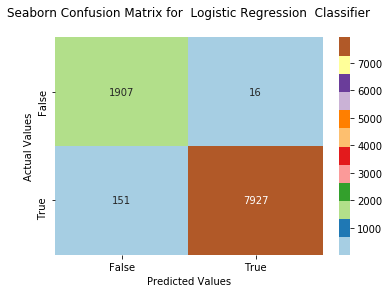



	Classification Report for Logistic Regression  Classifier

              precision    recall  f1-score   support

           0      0.927     0.992     0.958      1923
           1      0.998     0.981     0.990      8078

    accuracy                          0.983     10001
   macro avg      0.962     0.986     0.974     10001
weighted avg      0.984     0.983     0.984     10001




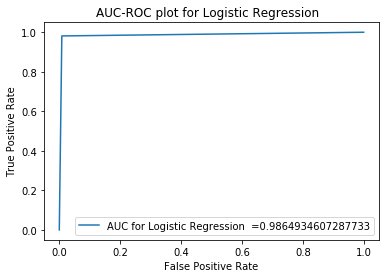



----------------Confusion Matrix for Naive Bayes Classifier--------------------


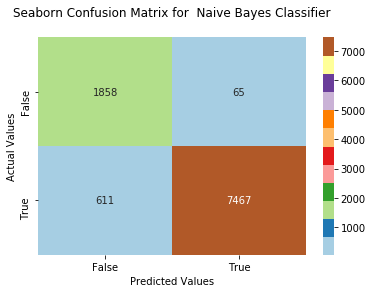



	Classification Report for Naive Bayes Classifier

              precision    recall  f1-score   support

           0      0.753     0.966     0.846      1923
           1      0.991     0.924     0.957      8078

    accuracy                          0.932     10001
   macro avg      0.872     0.945     0.901     10001
weighted avg      0.945     0.932     0.935     10001




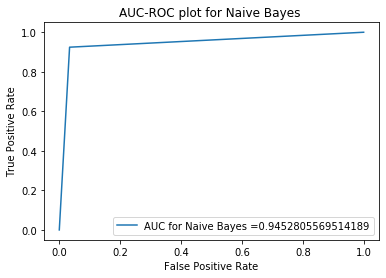



----------------Confusion Matrix for Support Vector Machine (Kernel= (RBF)) Classifier--------------------


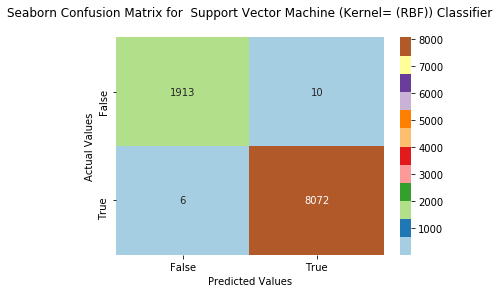



	Classification Report for Support Vector Machine (Kernel= (RBF)) Classifier

              precision    recall  f1-score   support

           0      0.997     0.995     0.996      1923
           1      0.999     0.999     0.999      8078

    accuracy                          0.998     10001
   macro avg      0.998     0.997     0.997     10001
weighted avg      0.998     0.998     0.998     10001




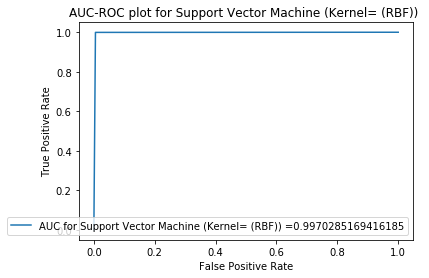



----------------Confusion Matrix for Support Vector Machine (Kernel = Polynomial) Classifier--------------------


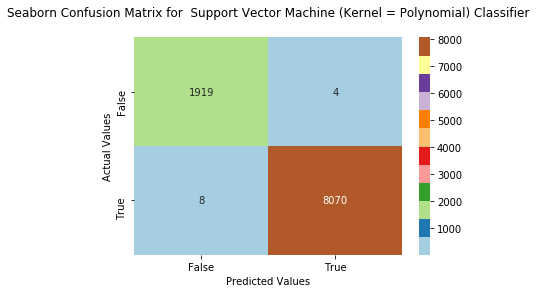



	Classification Report for Support Vector Machine (Kernel = Polynomial) Classifier

              precision    recall  f1-score   support

           0      0.996     0.998     0.997      1923
           1      1.000     0.999     0.999      8078

    accuracy                          0.999     10001
   macro avg      0.998     0.998     0.998     10001
weighted avg      0.999     0.999     0.999     10001




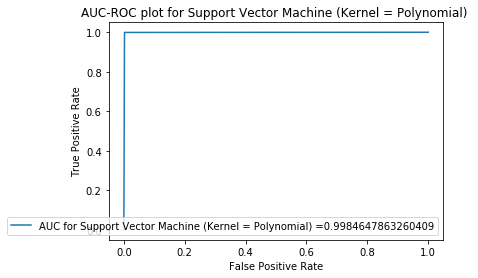



----------------Confusion Matrix for K-Nearest Neighbour Classifier--------------------


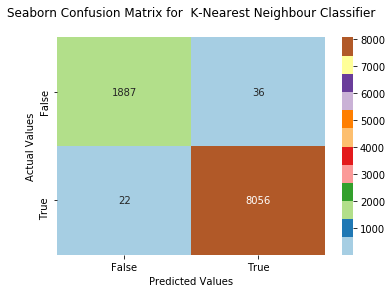



	Classification Report for K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0      0.988     0.981     0.985      1923
           1      0.996     0.997     0.996      8078

    accuracy                          0.994     10001
   macro avg      0.992     0.989     0.991     10001
weighted avg      0.994     0.994     0.994     10001




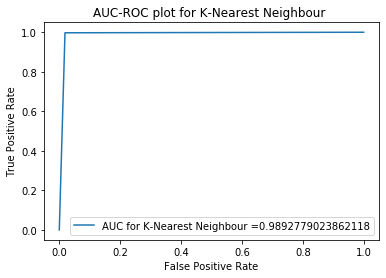



----------------Confusion Matrix for Decision Tree Classifier--------------------


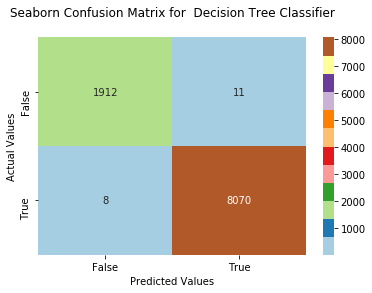



	Classification Report for Decision Tree Classifier

              precision    recall  f1-score   support

           0      0.996     0.994     0.995      1923
           1      0.999     0.999     0.999      8078

    accuracy                          0.998     10001
   macro avg      0.997     0.997     0.997     10001
weighted avg      0.998     0.998     0.998     10001




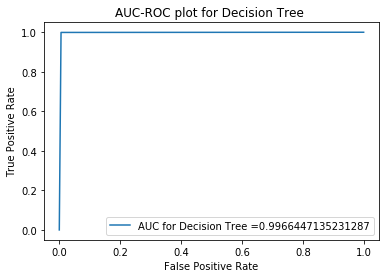



----------------Confusion Matrix for MLP(Multi-Layer Preceptron(Relu)) Classifier--------------------


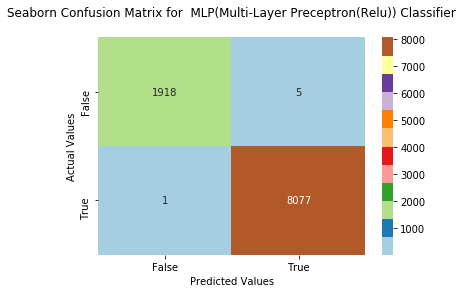



	Classification Report for MLP(Multi-Layer Preceptron(Relu)) Classifier

              precision    recall  f1-score   support

           0      0.999     0.997     0.998      1923
           1      0.999     1.000     1.000      8078

    accuracy                          0.999     10001
   macro avg      0.999     0.999     0.999     10001
weighted avg      0.999     0.999     0.999     10001




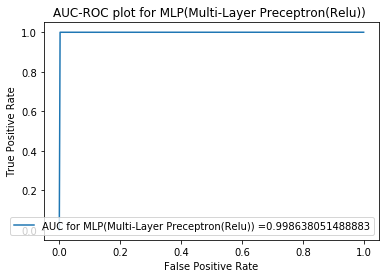



----------------Confusion Matrix for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier--------------------


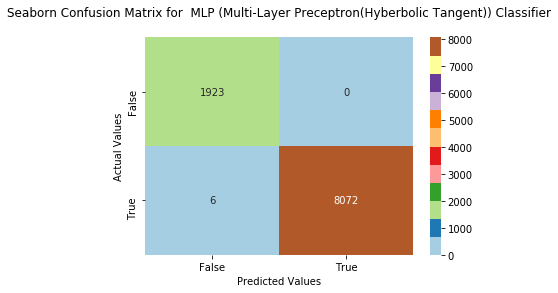



	Classification Report for MLP (Multi-Layer Preceptron(Hyberbolic Tangent)) Classifier

              precision    recall  f1-score   support

           0      0.997     1.000     0.998      1923
           1      1.000     0.999     1.000      8078

    accuracy                          0.999     10001
   macro avg      0.998     1.000     0.999     10001
weighted avg      0.999     0.999     0.999     10001




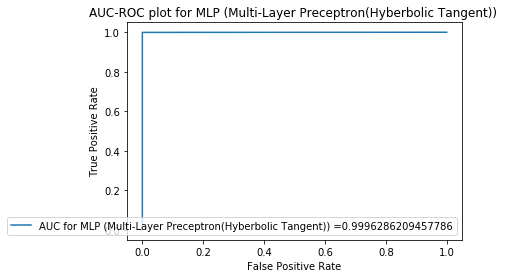



----------------Confusion Matrix for Perceptron Classifier--------------------


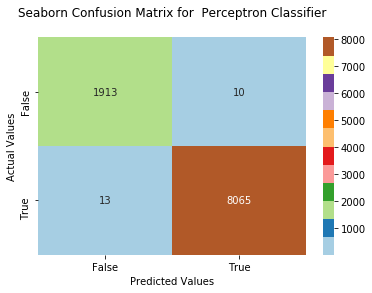



	Classification Report for Perceptron Classifier

              precision    recall  f1-score   support

           0      0.993     0.995     0.994      1923
           1      0.999     0.998     0.999      8078

    accuracy                          0.998     10001
   macro avg      0.996     0.997     0.996     10001
weighted avg      0.998     0.998     0.998     10001




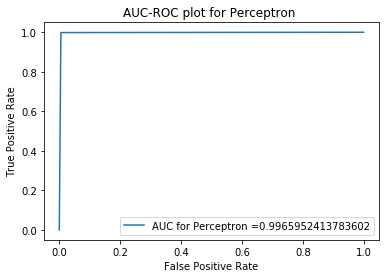

In [257]:
getClassifiStats(models_SMOTE , X_test_w, y_test_w)

# 8c. Wiki Corpus Coordination Analysis

The Conversational Data Collected cannot only be used to predict politeness outcome. It can be used to answer question such as "DO admins communicate with users  more than non admins ?" or DO users communicate more to non admin or admin. This can be answered using Coordination scores provided by Coordination Transformer, a Transformer provided by ConvoKit.

In [258]:
# Load arc dependencies as it will include information such as dependency structure  
wiki_full.load_info('utterance',['arcs_censored'])

In [209]:
# change arcs to list of arc_censored as the Coordination doesnt accept list as input. Input has to be string

from convokit.text_processing import TextProcessor

join_arcs = TextProcessor(input_field='arcs_censored', output_field='arcs',
                     proc_fn=lambda sents: '\n'.join(sents))

wiki_full = join_arcs.transform(wiki_full)

### FIT Corpus to learn coordination pattern

In [210]:
coord = convokit.Coordination()
coord.fit(wiki_full)


### Notice how Linguistic features have been added to the dataset

Coordination scores  get calculated using liwc-categories. For instance an utterance has  auxverb, conjuction, preposition etc which is associated to a particular speaker. Suppose this speaker uses a lot of these morphological features. These features can be characaterstic of a speaker. These morphological features aggregated and key characteristic features specific to particular users can be identified. For example,  speaker 'A' ,uses of auxverb , pronouns or other linguistic markers, which happens to be an admin. Speaker b,c and d also have this in common. By using aggregated scores we can conclude that admins use a lot of auxverb, pronouns etc in there replies or text

In [211]:
wiki_full.get_utterances_dataframe()

timestamp                                               text  \
id                                                                          
524288  1.189190940E09  You should look at all of the point on the tem...   
524289  1.189204860E09  Yes I agree. The law permits usage of document...   
1       1.310744280E09  Yes, that's good. Revathy's page looked very r...   
2       1.310746500E09  Nagma'a site, at least that filmography page, ...   
3       1.310751180E09  I don't think there are many such official rel...   
...                ...                                                ...   
266783  1.176454500E09  I felt one line on language of administration\...   
552089  1.143592380E09  It looks like the [[William Shakespeare]] expe...   
552090  1.143603840E09  It's not an experiment. This is a wiki. People...   
289946  1.156854120E09  That's odd.  Somehow, I came across one of tha...   
289947  1.156854600E09  That could be the case.  I've seen a few of th...   

                 speaker reply_to conversation_id meta.is-admin  \
id                                                                
524288         Frightner     None          524288         False   
524289       Revizionist     None          524288         False   
1            Johannes003     None               1         False   
2            Johannes003        1               1         False   
3            Johannes003        2               1         False   
...                  ...      ...             ...           ...   
266783  Dineshkannambadi     None          266777         False   
552089          Rklawton     None          552089         False   
552090            Splash   552089          552089          True   
289946            Mike 7     None          289946         False   
289947            Mike 7   289946          289946         False   

                                              meta.parsed  \
id                                                          
524288  [{'rt': 20, 'toks': [{'tok': 'you', 'tag': 'PR...   
524289  [{'rt': 2, 'toks': [{'tok': 'yes', 'tag': 'UH'...   
1       [{'rt': 3, 'toks': [{'tok': 'yes', 'tag': 'UH'...   
2       [{'rt': 9, 'toks': [{'tok': "nagma'a", 'tag': ...   
3       [{'rt': 3, 'toks': [{'tok': 'i', 'tag': 'PRP',...   
...                                                   ...   
266783  [{'rt': 1, 'toks': [{'tok': 'i', 'tag': 'PRP',...   
552089  [{'rt': 1, 'toks': [{'tok': 'it', 'tag': 'PRP'...   
552090  [{'rt': 1, 'toks': [{'tok': 'it', 'tag': 'PRP'...   
289946  [{'rt': 1, 'toks': [{'tok': 'that', 'tag': 'DT...   
289947  [{'rt': 2, 'toks': [{'tok': 'that', 'tag': 'DT...   

                               meta.politeness_strategies  \
id                                                          
524288  {'feature_politeness_==Please==': 0, 'feature_...   
524289  {'feature_politeness_==Please==': 0, 'feature_...   
1       {'feature_politeness_==Please==': 0, 'feature_...   
2       {'feature_politeness_==Please==': 0, 'feature_...   
3       {'feature_politeness_==Please==': 0, 'feature_...   
...                                                   ...   
266783  {'feature_politeness_==Please==': 0, 'feature_...   
552089  {'feature_politeness_==Please==': 0, 'feature_...   
552090  {'feature_politeness_==Please==': 0, 'feature_...   
289946  {'feature_politeness_==Please==': 0, 'feature_...   
289947  {'feature_politeness_==Please==': 0, 'feature_...   

                                  meta.politeness_markers  \
id                                                          
524288  {'politeness_markers_==Please==': [], 'politen...   
524289  {'politeness_markers_==Please==': [], 'politen...   
1       {'politeness_markers_==Please==': [], 'politen...   
2       {'politeness_markers_==Please==': [], 'politen...   
3       {'politeness_markers_==Please==': [], 'politen...   
...                                                   ...   
266783  {'politeness_markers_==Please==': [], 'politen...   
55

In [212]:
c = coord.summarize(wiki_full)
c

{Speaker({'obj_type': 'speaker', 'meta': {'is-admin': False, 'edit-count': '7098'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x00000185F14B09C8>, 'id': 'CycloneGU'}): {'article': 0.0,
  'auxverb': 0.0,
  'conj': 0.1428571428571429,
  'adverb': 0.0,
  'ppron': 0.11904761904761907,
  'ipron': 0.0,
  'preps': 0.0,
  'quant': 0.09523809523809523},
 Speaker({'obj_type': 'speaker', 'meta': {'is-admin': False, 'edit-count': '0'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x00000185F14B09C8>, 'id': 'EA210269'}): {'article': 0.0,
  'auxverb': -0.015238095238095273,
  'conj': -0.03809523809523818,
  'adverb': -0.01090909090909098,
  'ppron': 0.023636363636363678,
  'ipron': -0.025263157894736876,
  'preps': 0.0,
  'quant': -0.06222222222222218},
 Speaker({'obj_type': 'speaker', 'meta': {'is-admin': False, 'edit-count': '6601'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x00000185F14B09C8>, 'id': 'Marcbela'}): {'article': 0.081818

In [213]:
wiki_full.get_speakers_dataframe()

vectors meta.is-admin meta.edit-count
id                                                  
Frightner           []         False            1322
Revizionist         []         False            1716
Johannes003         []         False            8283
Michael-Billa       []         False             396
AnonEMouse          []          True           13150
...                ...           ...             ...
{unknown-1133}      []         False         unknown
Kelly Martin        []          True           17726
Cretanpride         []         False             192
CaveatLector        []         False            2196
Huntster            []          True           27608

[9331 rows x 3 columns]

### Transfor Corpus to show coordination scores

Aggregated corresponding to each of the speakers will be displayed

In [214]:
coord.transform(wiki_full)

Note: Some Scores might be missing 

In [260]:
speaker_df  = wiki_full.get_speakers_dataframe()
speaker_df 

vectors meta.is-admin meta.edit-count  \
id                                                     
Frightner           []         False            1322   
Revizionist         []         False            1716   
Johannes003         []         False            8283   
Michael-Billa       []         False             396   
AnonEMouse          []          True           13150   
...                ...           ...             ...   
{unknown-1133}      []         False         unknown   
Kelly Martin        []          True           17726   
Cretanpride         []         False             192   
CaveatLector        []         False            2196   
Huntster            []          True           27608   

                                                       meta.coord  
id                                                                 
Frightner                                                     NaN  
Revizionist                                                   NaN  
Johannes003                                                   NaN  
Michael-Billa                                                 NaN  
AnonEMouse      {'Kwork': {'article': 0.0, 'auxverb': 0.0, 'co...  
...                                                           ...  
{unknown-1133}                                                NaN  
Kelly Martin                                                  NaN  
Cretanpride                                                   NaN  
CaveatLector                                                  NaN  
Huntster                                                      NaN  

[9331 rows x 4 columns]

#### Filter out missing scores

In [262]:
speaker_df[speaker_df['meta.coord'].notna()]

vectors meta.is-admin meta.edit-count  \
id                                                     
AnonEMouse          []          True           13150   
FayssalF            []          True           42028   
Dana boomer         []          True           33852   
Capricornis         []         False             918   
Good Olfactory      []          True          363837   
...                ...           ...             ...   
Szipucsu            []         False              95   
Mathwiz2020         []          True               0   
Neustradamus        []         False            2211   
91.187.66.243       []         False         unknown   
RJII                []         False           25810   

                                                       meta.coord  
id                                                                 
AnonEMouse      {'Kwork': {'article': 0.0, 'auxverb': 0.0, 'co...  
FayssalF        {'Mattisse': {'article': 0.0, 'auxverb': 0.0, ...  
Dana boomer     {'Montanabw': {'article': 0.05555555555555558,...  
Capricornis     {'Mr. Neutron': {'auxverb': 0.0, 'ppron': 0.0,...  
Good Olfactory  {'Redheylin': {'auxverb': 0.0, 'adverb': 0.0, ...  
...                                                           ...  
Szipucsu        {'Psychonaut': {'auxverb': 0.0, 'adverb': 0.0,...  
Mathwiz2020     {'Splash': {'article': 0.0, 'auxverb': 0.0, 'c...  
Neustradamus    {'91.187.66.243': {'auxverb': 0.0, 'adverb': 0...  
91.187.66.243   {'Michael Hardy': {'auxverb': 0.0, 'conj': 0.0...  
RJII            {'Splash': {'article': 0.0, 'auxverb': 0.0, 'c...  

[673 rows x 4 columns]

### Find Coordination between Speaker to Admin and Non admin

In [216]:
# get set of speakers
everyone = lambda speaker: True
admins = lambda speaker: speaker.meta["is-admin"]
nonadmins = lambda speaker: not speaker.meta["is-admin"]
split = ["is-admin"]

# compute coordination scores from each admin to everyone
print("Admins, ranked by how much they coordinate to others:")

speaker_to_admin = coord.summarize(wiki_full, everyone, admins, focus="targets")

dicti_counts_admin, dicti_counts_nonadmin = {}, {}

for spkr, score in sorted(speaker_to_admin.averages_by_speaker().items(),key=lambda x: x[1], reverse=True):
    dicti_counts_admin[spkr.id] = round(score, 5)

speaker_to_nonadmin = coord.summarize(wiki_full,everyone, nonadmins, focus="targets")

for spkr, score in sorted(speaker_to_nonadmin.averages_by_speaker().items(),key=lambda x: x[1], reverse=True):
    dicti_counts_nonadmin [spkr.id] = round(score, 5)


Admins, ranked by how much they coordinate to others:


### TOP 10 Speaker who coordinate with admins 

In [217]:
pd.DataFrame(data = dicti_counts_admin.items(), columns = ['Speaker name', 'Average Pair Wise Score']).head(10)

Speaker name  Average Pair Wise Score
0              Leyo                  0.27500
1      Dlohcierekim                  0.25000
2           Raul654                  0.21000
3  Stevenfruitsmaak                  0.20833
4            Tznkai                  0.18571
5      Magioladitis                  0.17202
6          Casliber                  0.15774
7              Hu12                  0.15625
8           Bhadani                  0.15238
9         Guettarda                  0.15000

### TOP 10 Speaker who coordinate with non- admins 

In [218]:
pd.DataFrame(data = dicti_counts_nonadmin.items(), columns = ['Speaker name', 'Average Pair Wise Score']).head(10)

Speaker name  Average Pair Wise Score
0         Ocaasi                  0.33333
1         Ekki01                  0.27083
2       PANONIAN                  0.26667
3  Leaky_caldron                  0.25333
4       Penyulap                  0.25000
5      KrebMarkt                  0.25000
6      VKokielov                  0.25000
7            Mjb                  0.25000
8       Armbrust                  0.23810
9  Mdcollins1984                  0.20089

### Find Coordination between Admin and Non admin to Speakers

In [219]:
admin_to_spkr = coord.summarize(wiki_full, admins, everyone)

dicti_counts_admin, dicti_counts_nonadmin = {}, {}

for spkr, score in sorted(admin_to_spkr.averages_by_speaker().items(),key=lambda x: x[1], reverse=True):
    dicti_counts_admin[spkr.id] = round(score, 5)

nonadmin_to_spkr  = coord.summarize(wiki_full, nonadmins, everyone)

for spkr, score in sorted(nonadmin_to_spkr.averages_by_speaker().items(),key=lambda x: x[1], reverse=True):
    dicti_counts_nonadmin[spkr.id] = round(score, 5)

In [220]:
pd.DataFrame(data = dicti_counts_admin.items(), columns = ['Speaker name', 'Average Pair Wise Score']).head(10)

Speaker name  Average Pair Wise Score
0          Gatoclass                  0.20278
1          DarkFalls                  0.16667
2            DO11.10                  0.15476
3  AnemoneProjectors                  0.15238
4             Amalas                  0.14796
5             Rogerd                  0.11944
6        Josiah Rowe                  0.11490
7    KillerChihuahua                  0.11151
8          Guettarda                  0.11042
9       Black Falcon                  0.10417

### Speaker to non-admin coordination

In [221]:
pd.DataFrame(data = dicti_counts_nonadmin.items(), columns = ['Speaker name', 'Average Pair Wise Score']).head(10)

Speaker name  Average Pair Wise Score
0    Howard the Duck                  0.19792
1            Lugnuts                  0.17708
2                WLU                  0.17542
3        Wikidudeman                  0.16667
4        Tagishsimon                  0.16667
5           Wwheaton                  0.16667
6        JJ Harrison                  0.16429
7           PANONIAN                  0.15833
8  Fowler&amp;fowler                  0.15714
9                 Ed                  0.15000

### Basice aggregated Summary statistics

In [222]:
coord.summarize(wiki_full, everyone, admins, focus="targets", summary_report=True)

{'marker_agg1': {'article': 0.015555598585512167,
  'auxverb': 0.009663516499465384,
  'conj': 0.013230937289510317,
  'adverb': 0.017329249355186323,
  'ppron': 0.0029675891397264974,
  'ipron': 0.030634938792294442,
  'preps': 0.010898938538928087,
  'quant': 0.020082725608428467},
 'marker_agg2': {'article': 0.010666995155267435,
  'auxverb': 0.00965974179597438,
  'conj': 0.011246236532095569,
  'adverb': 0.010822727131472845,
  'ppron': 0.0006280728061660206,
  'ipron': 0.02307661110412696,
  'preps': 0.007853887946881395,
  'quant': 0.016956733937946604},
 'marker_agg3': {'article': 0.010666995155267435,
  'auxverb': 0.00965974179597438,
  'conj': 0.011246236532095569,
  'adverb': 0.010822727131472845,
  'ppron': 0.0006280728061660206,
  'ipron': 0.02307661110412696,
  'preps': 0.007853887946881395,
  'quant': 0.016956733937946604},
 'agg1': 0.01504543672613146,
 'agg2': 0.011363875801241392,
 'agg3': 0.008886420812259174,
 'count_agg1': 301,
 'count_agg2': 511,
 'count_agg3': 51

In [223]:
coord.summarize(wiki_full, everyone, nonadmins, focus="targets", summary_report=True)

{'marker_agg1': {'article': 0.008340013138658358,
  'auxverb': 0.007401284196896749,
  'conj': 0.010106910427519265,
  'adverb': 0.007511210484479474,
  'ppron': 0.007713000391147967,
  'ipron': 0.018540313759033426,
  'preps': 0.00677588710100073,
  'quant': 0.027115418874108555},
 'marker_agg2': {'auxverb': 0.008130217413767777,
  'adverb': 0.005881239202070832,
  'ppron': 0.0068253670153056575,
  'ipron': 0.013442437503031372,
  'preps': 0.0018353311750622472,
  'quant': 0.01996582337592379,
  'conj': 0.013765255982772225,
  'article': 0.006747629121977491},
 'marker_agg3': {'auxverb': 0.008130217413767777,
  'adverb': 0.005881239202070832,
  'ppron': 0.0068253670153056575,
  'ipron': 0.013442437503031372,
  'preps': 0.0018353311750622472,
  'quant': 0.01996582337592379,
  'conj': 0.013765255982772225,
  'article': 0.006747629121977491},
 'agg1': 0.011688004796605563,
 'agg2': 0.009574162598738967,
 'agg3': 0.007599102233410238,
 'count_agg1': 647,
 'count_agg2': 1297,
 'count_agg3'

# References

[1] Brownlee, J. (2017, September 29). How to Encode Text Data for Machine Learning with scikit-learn [Web log post]. Retrieved April 02, 2022, from https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

[2] Chang, J. P., Chiam, C., Fu, L., Wang, A. Z., Zhang, J., & Danescu-Niculescu-Mizil, C. (2020). ConvoKit: A Toolkit for the Analysis of Conversations. doi:10.48550/ARXIV.2005.04246

[3] Chawla, N. V., Bowyer, K. W., Hall, L. O., &amp; Kegelmeyer, W. P. (2002). Smote: Synthetic minority over-sampling technique. Journal of Artificial Intelligence Research, 16, 321–357. https://doi.org/10.1613/jair.953 

[4] Danescu-Niculescu-Mizil, C., Lee, L., Pang, B., &amp; Kleinberg, J. (2012). Echoes of power. Proceedings of the 21st International Conference on World Wide Web - WWW '12. https://doi.org/10.1145/2187836.2187931 

[5] Danescu-Niculescu-Mizil, C., Sudhof, M., Jurafsky, D., Leskovec, J., &amp; Potts, C. (2013). A computational approach to politeness with application to social factors. The Association for Computer Linguistics, 250-259. https://doi.org/10.48550/arXiv.1306.6078

[6] James, G., Witten, D., Hastie, T., &amp; Tibshirani, R. (2013). An introduction to statistical learning: With applications in R. New York, NY: R. Springer Publishing Company, Incorporated.

[7] Jurafsky, D., &amp; Martin, J. H. (2022). Speech and Language Processing (3rd ed.) [3rd edition draft]. Retrieved March 25, 2022, from https://web.stanford.edu/~jurafsky/slp3/

[8] https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/vectors/bag-of-words-demo.ipynb

[9] https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/coordination/examples.ipynb

[10] https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/